In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The dataset is from [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

# 1 Read the data

In [28]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv', header=0)

# 2 Observation

In [29]:
data.head(5)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

**Attributes:**
- hypertension/heart_disease: Binary data, presence of hypertension/heart disease
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Urban", "Rural"
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

**Intuition:**
- id has no related information and can be discarded.
- The object data such as gender can be converted to numeric data by one-hot encoding.

In [30]:
data.drop(['id'], axis=1, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Intuition:**
- bmi has null data and needs to be processed.

In [32]:
data.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

# 3 Data cleaning

## 3.1 Missing value process

In [33]:
data.loc[data['bmi'].isnull(),'bmi']=data['bmi'].mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [34]:
data[data.duplicated()]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

## 3.2 Data conversion

In [35]:
print('gender:', data['gender'].unique(), '\n',
     'ever_married:', data['ever_married'].unique(),'\n',
     'work_type:', data['work_type'].unique(),'\n',
     'Residence_type:', data['Residence_type'].unique(),'\n',
     'smoking_status:', data['smoking_status'].unique(),'\n')

gender: ['Male' 'Female' 'Other'] 
 ever_married: ['Yes' 'No'] 
 work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 
 Residence_type: ['Urban' 'Rural'] 
 smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 



In [36]:
gender = {'Male':0, 'Female':1,'Other':-1}
ever_married = {'Yes':1, 'No':0}
work_type = {'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
residence_type = {'Urban':0, 'Rural':1}
smoking = {'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}

In [37]:
data['gender'] = data['gender'].replace(gender).astype(np.uint8)
data['ever_married'] = data['ever_married'].replace(ever_married).astype(np.uint8)
data['work_type'] = data['work_type'].replace(work_type).astype(np.uint8)
data['Residence_type'] = data['Residence_type'].replace(residence_type).astype(np.uint8)
data['smoking_status'] = data['smoking_status'].replace(smoking).astype(np.uint8)

In [38]:
data.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       1  61.0             0              0             1          1   
2       0  80.0             0              1             1          0   
3       1  49.0             0              0             1          0   
4       1  79.0             1              0             1          1   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               0             228.69  36.600000               0       1  
1               1             202.21  28.893237               1       1  
2               1             105.92  32.500000               1       1  
3               0             171.23  34.400000               2       1  
4               1             174.12  24.000000               1       1

# 4 Data visualization

Text(0, 0.5, 'count')

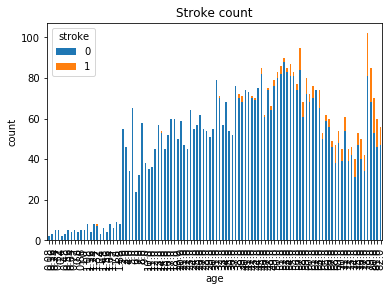

In [39]:
data.groupby(['age','stroke'])['stroke'].count().unstack().plot(kind='bar',stacked='True')
plt.title('Stroke count')
plt.ylabel('count')

In [40]:
data[data['stroke']==0].count()

gender               4861
age                  4861
hypertension         4861
heart_disease        4861
ever_married         4861
work_type            4861
Residence_type       4861
avg_glucose_level    4861
bmi                  4861
smoking_status       4861
stroke               4861
dtype: int64

In [41]:
# discretize Age
#data_age=data
#data_age['age']=pd.cut(data_age['age'],[0,5,15,30,50,70,82], labels=['0','1','2','3','4','5'])

In [42]:
#data_age.groupby(['gender','age','stroke'])['stroke'].count().unstack().plot(kind='bar',stacked='True')
#plt.title('Stroke count')
#plt.ylabel('count')

**Intuitions:**
- It is easy to see that the probability of stroke is strongly correlated with age.

Text(0, 0.5, 'count')

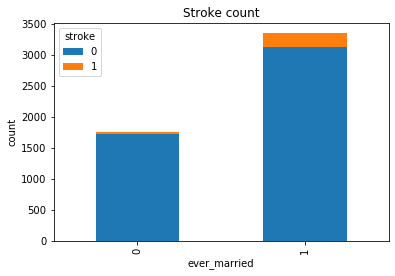

In [43]:
data.groupby(['ever_married','stroke'])['stroke'].count().unstack().plot(kind='bar',stacked='True')
plt.title('Stroke count')
plt.ylabel('count')

Text(0, 0.5, 'count')

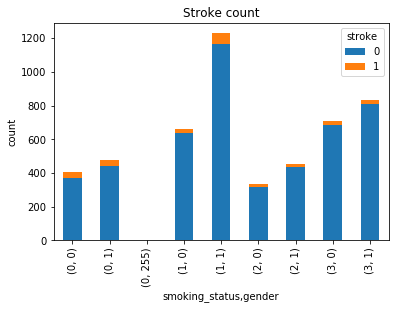

In [44]:
data.groupby(['smoking_status','gender','stroke'])['stroke'].count().unstack().plot(kind='bar',stacked='True')
plt.title('Stroke count')
plt.ylabel('count')

Text(0, 0.5, 'count')

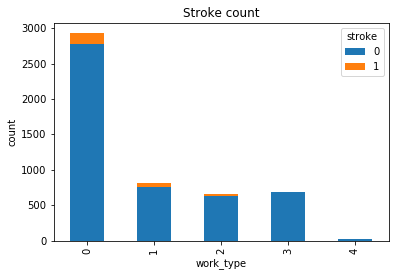

In [45]:
data.groupby(['work_type','stroke'])['stroke'].count().unstack().plot(kind='bar',stacked='True')
plt.title('Stroke count')
plt.ylabel('count')

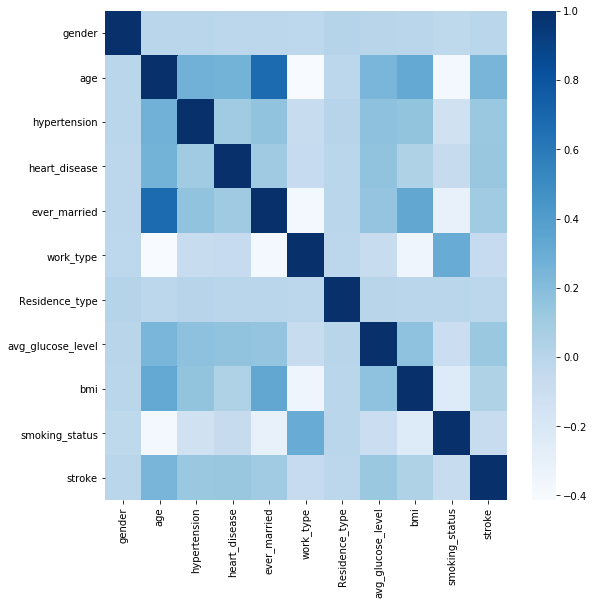

In [46]:
# Analyze the correlation between each attribute using Pearson correlation matrix
data_cor = data.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(data_cor, cmap="Blues")
plt.show()

**Notes:**
- The stroke probability and bmi index were positively correlated with age.

# 5 Prepare the dataset

## 5.1 Get training and test set

In [47]:
X = data.drop(['stroke'],axis=1)
y = data['stroke']
print(X.shape, y.shape)

(5110, 10) (5110,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=0)
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(X_train,y_train,stratify=y_train, random_state=0)
print(X_train.shape, X_test.shape, X_train_tune.shape, X_test_tune.shape)

(3832, 10) (1278, 10) (2874, 10) (958, 10)


**Note:**
- The data set is split using the `train_test_split` function. The dataset is first divided into a training set and a test set, and then the training set is again divided into a training set and a test set for tuning the parameters.

## 5.2 Data normalization

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
X_train_sc

array([[ 0.84394495, -0.72320819, -0.32935628, ...,  0.12173255,
        -0.00366904, -0.53177364],
       [ 0.84394495,  0.02625276, -0.32935628, ..., -0.3470755 ,
         0.53772484, -1.44392969],
       [-1.18491141,  1.56926061, -0.32935628, ...,  0.14753034,
        -0.05523036, -1.44392969],
       ...,
       [-1.18491141,  0.46711215, -0.32935628, ...,  0.1913421 ,
         1.44004796, -1.44392969],
       [ 0.84394495, -0.54686444, -0.32935628, ..., -0.08042424,
        -0.77708886,  0.3803824 ],
       [-1.18491141, -0.41460662, -0.32935628, ..., -0.45449215,
        -0.27436597,  1.29253844]])

# 6 Building the model

Note：
- Decision tree algorithm and support vector machine are considered for the classification task.
- adopt F1 score and Accuracy score as evaluation metrics.

In [50]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [51]:
dt_st = DecisionTreeClassifier(max_depth=15)
dt_st.fit(X_train_sc, y_train)
dt_st_prediction = dt_st.predict(X_test_sc)
dt_st_train = dt_st.predict(X_train_sc)
cm_test = confusion_matrix(y_test,dt_st_prediction)
cm_train = confusion_matrix(y_train,dt_st_train)
dt_st_acscore_test = accuracy_score(y_test, dt_st_prediction)
dt_st_acscore_train = accuracy_score(y_train, dt_st_train)
dt_st_fscore_test = f1_score(y_test, dt_st_prediction)
dt_st_fscore_train = f1_score(y_train, dt_st_train)
print("confusion matrix of test data:\n",cm_test,"\n",
      "confusion matrix of training data:\n",cm_train,"\n",
      "accuracy score of the first Decision Tree Classifier on Test Data:", dt_st_acscore_test,"\n",
      "accuracy score of the first Decision Tree Classifier on Train Data:",dt_st_acscore_train,"\n",
      "F1 score of the first Decision Tree Classifier on Test Data:", dt_st_fscore_test,"\n",
      "F1 score of the first Decision Tree Classifier on Train Data:", dt_st_fscore_train)

confusion matrix of test data:
 [[1174   42]
 [  54    8]] 
 confusion matrix of training data:
 [[3644    1]
 [   5  182]] 
 accuracy score of the first Decision Tree Classifier on Test Data: 0.9248826291079812 
 accuracy score of the first Decision Tree Classifier on Train Data: 0.9984342379958246 
 F1 score of the first Decision Tree Classifier on Test Data: 0.14285714285714285 
 F1 score of the first Decision Tree Classifier on Train Data: 0.9837837837837837


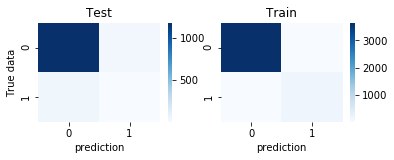

In [52]:
plt.figure(1)
plt.subplot(221)
sns.heatmap(cm_test, cmap="Blues")
plt.xlabel('prediction')
plt.ylabel('True data')
plt.title('Test')
plt.subplot(222)
sns.heatmap(cm_train, cmap="Blues")
plt.xlabel('prediction')
plt.title('Train')
plt.show()

**Note:**
- The limitations of the accuracy score as an evaluation metric can be seen in this example: for this dataset, the goal is to predict stroke, i.e., the most important thing is to predict people who will have a stroke. Since the vast majority of people in the dataset have not had a stroke, the classifier may have a preference for predicting patients as healthy, which is naturally more accurate. The actual issue of interest to us is the population that is misclassified as healthy, i.e., the recall rate. In this case, F1 score is more suitable than accuracy rate as a classifier performance evaluation metric.

In [53]:
dt_st = DecisionTreeClassifier(max_depth=15)
dt_st.fit(X_train, y_train)
dt_st_prediction = dt_st.predict(X_test)
dt_st_train = dt_st.predict(X_train)
dt_st_score_test = f1_score(y_test, dt_st_prediction)
dt_st_score_train = f1_score(y_train, dt_st_train)
print("F1 score of the first Decision Tree Classifier on Test Data:", dt_st_score_test,
     "F1 score of the first Decision Tree Classifier on Train Data:", dt_st_score_train)

F1 score of the first Decision Tree Classifier on Test Data: 0.1692307692307692 F1 score of the first Decision Tree Classifier on Train Data: 0.9837837837837837


**Comment**
- This is a disaster.
- Consider finding the best tree depth.
- For decision trees, data normalization does not seem to take effect.

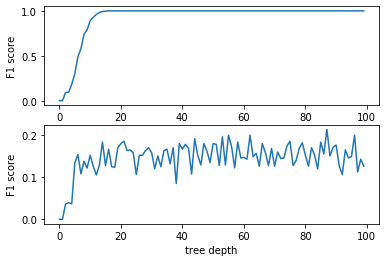

In [54]:
fscore_test = []
fscore_train = []
for i in range(100):
    dt_st = DecisionTreeClassifier(max_depth= (i+1))
    dt_st.fit(X_train_tune, y_train_tune)
    dt_st_prediction = dt_st.predict(X_test_tune)
    dt_st_train = dt_st.predict(X_train_tune)
    dt_st_score_test = f1_score(y_test_tune, dt_st_prediction)
    dt_st_score_train = f1_score(y_train_tune, dt_st_train)
    fscore_test.append(dt_st_score_test)
    fscore_train.append(dt_st_score_train)
plt.figure(1)
plt.subplot(211)
plt.plot(range(100), fscore_train)
plt.xlabel('tree depth')
plt.ylabel('F1 score')
plt.subplot(212)
plt.plot(range(100), fscore_test)
plt.xlabel('tree depth')
plt.ylabel('F1 score')
plt.show()

**Comment**
- It is easily seen that the maximum value of F1 score is about 0.20 under the maximum tree depth limit of 100 layers. That is, the classification effect of this base classifier is not good. According to the folding graph, a tree depth of about 23 may be more appropriate.
- Try the KNN algorithm before using SVM.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_train = knn.predict(X_train)
knn_score_test = f1_score(y_test, knn_prediction)
knn_score_train = f1_score(y_train, knn_train)
print("F1 score of the first Decision Tree Classifier on Test Data:", knn_score_test,
     "F1 score of the first Decision Tree Classifier on Train Data:", knn_score_train)

F1 score of the first Decision Tree Classifier on Test Data: 0.0975609756097561 F1 score of the first Decision Tree Classifier on Train Data: 0.33870967741935487


In [56]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train_sc, y_train)
knn_prediction = knn.predict(X_test_sc)
knn_train = knn.predict(X_train_sc)
knn_score_test = f1_score(y_test, knn_prediction)
knn_score_train = f1_score(y_train, knn_train)
print("F1 score of the first Decision Tree Classifier on Test Data:", knn_score_test,
     "F1 score of the first Decision Tree Classifier on Train Data:", knn_score_train)

F1 score of the first Decision Tree Classifier on Test Data: 0.0 F1 score of the first Decision Tree Classifier on Train Data: 0.3275862068965517


**Comment:**
- Normalization does not work for dt and knn.

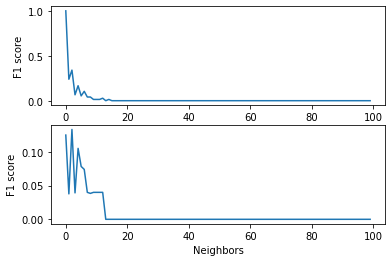

In [57]:
fscore_test = []
fscore_train = []
for i in range(100):
    knn = KNeighborsClassifier(n_neighbors=(i+1))
    knn.fit(X_train_tune, y_train_tune)
    knn_prediction = knn.predict(X_test_tune)
    knn_train = knn.predict(X_train_tune)
    knn_score_test = f1_score(y_test_tune, knn_prediction)
    knn_score_train = f1_score(y_train_tune, knn_train)
    fscore_test.append(knn_score_test)
    fscore_train.append(knn_score_train)
plt.figure(1)
plt.subplot(211)
plt.plot(range(100), fscore_train)
plt.xlabel('Neighbors')
plt.ylabel('F1 score')
plt.subplot(212)
plt.plot(range(100), fscore_test)
plt.xlabel('Neighbors')
plt.ylabel('F1 score')
plt.show()

**Comment:**
- As shown by the line graph, the classification performance of KNN algorithm on this dataset is still not very good.
- The classifier's performance is better when n_neighbors is 3.

confusion matrix of test data:
 [[1214    2]
 [  62    0]] 
 confusion matrix of training data:
 [[3645    0]
 [ 121   66]] 
 F1 score of the first SVM Classifier on Test Data: 0.0 
 F1 score of the first SVM Classifier on Train Data: 0.5217391304347826


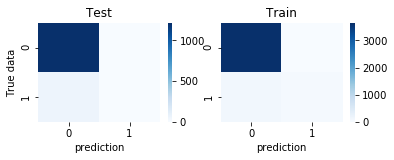

In [58]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_train = svm.predict(X_train)
cm_test = confusion_matrix(y_test,svm_prediction)
cm_train = confusion_matrix(y_train,svm_train)
svm_score_test = f1_score(y_test, svm_prediction)
svm_score_train = f1_score(y_train, svm_train)
print("confusion matrix of test data:\n",cm_test,"\n",
      "confusion matrix of training data:\n",cm_train,"\n",
      "F1 score of the first SVM Classifier on Test Data:", svm_score_test,"\n",
      "F1 score of the first SVM Classifier on Train Data:", svm_score_train)
plt.figure(1)
plt.subplot(221)
sns.heatmap(cm_test, cmap="Blues")
plt.xlabel('prediction')
plt.ylabel('True data')
plt.title('Test')
plt.subplot(222)
sns.heatmap(cm_train, cmap="Blues")
plt.xlabel('prediction')
plt.title('Train')
plt.show()

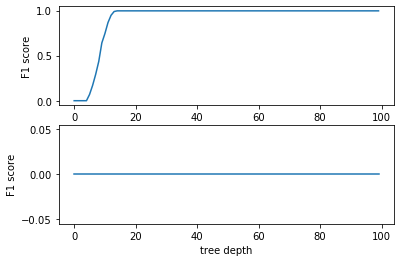

In [59]:
from sklearn.ensemble import RandomForestClassifier
fscore_test = []
fscore_train = []
for i in range(100):
    rf = RandomForestClassifier(max_depth=(i+1),random_state=42)
    rf.fit(X_train_tune,y_train_tune)
    rf_prediction = rf.predict(X_test_tune)
    rf_train = rf.predict(X_train_tune)
    rf_score_test = f1_score(y_test_tune, rf_prediction)
    rf_score_train = f1_score(y_train_tune, rf_train)
    fscore_test.append(rf_score_test)
    fscore_train.append(rf_score_train)
plt.figure(1)
plt.subplot(211)
plt.plot(range(100), fscore_train)
plt.xlabel('tree depth')
plt.ylabel('F1 score')
plt.subplot(212)
plt.plot(range(100), fscore_test)
plt.xlabel('tree depth')
plt.ylabel('F1 score')
plt.show()

**Comment:**
- From the line graph, it can be seen that the random forest algorithm has a poor performance on the test set for tuning the parameters, which is reflected in the F1 score always being 0.

confusion matrix of test data:
 [[1215    1]
 [  62    0]] 
 confusion matrix of training data:
 [[3645    0]
 [   2  185]] 
 F1 score of the first RF Classifier on Test Data: 0.0 
 F1 score of the first RF Classifier on Train Data: 0.9946236559139785


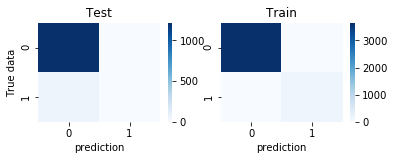

In [60]:
rf = RandomForestClassifier(max_depth=15,random_state=42)
rf.fit(X_train,y_train)
rf_prediction = rf.predict(X_test)
rf_train = rf.predict(X_train)
cm_test = confusion_matrix(y_test,rf_prediction)
cm_train = confusion_matrix(y_train,rf_train)
rf_score_test = f1_score(y_test, rf_prediction)
rf_score_train = f1_score(y_train, rf_train)
print("confusion matrix of test data:\n",cm_test,"\n",
      "confusion matrix of training data:\n",cm_train,"\n",
      "F1 score of the first RF Classifier on Test Data:", rf_score_test,"\n",
      "F1 score of the first RF Classifier on Train Data:", rf_score_train)
plt.figure(1)
plt.subplot(221)
sns.heatmap(cm_test, cmap="Blues")
plt.xlabel('prediction')
plt.ylabel('True data')
plt.title('Test')
plt.subplot(222)
sns.heatmap(cm_train, cmap="Blues")
plt.xlabel('prediction')
plt.title('Train')
plt.show()

**Notes:**
- It is conjectured from the confusion matrix that the poor performance of the classifier may be due to the imbalance of the dataset, which makes the classifier develop a preference to identify the samples as healthy during the training process. An attempt was made to balance the dataset using the smote algorithm.

In [62]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_smote, y_smote = sm.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=40)
X_train_smote_tune, X_test_smote_tune, y_train_smote_tune, y_test_smote_tune = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=40)

In [63]:
from sklearn.ensemble import RandomForestClassifier
fscore_test = []
fscore_train = []
for i in range(50):
    for j in range(50):
        rf = RandomForestClassifier(n_estimators=i+1,max_depth=j+1,random_state=42)
        rf.fit(X_train_smote_tune,y_train_smote_tune)
        rf_prediction = rf.predict(X_test_smote_tune)
        rf_train = rf.predict(X_train_smote_tune)
        rf_score_test = f1_score(y_test_smote_tune, rf_prediction)
        rf_score_train = f1_score(y_train_smote_tune, rf_train)
        fscore_test.append(rf_score_test)
        fscore_train.append(rf_score_train)
        # print(i,j,'\n')

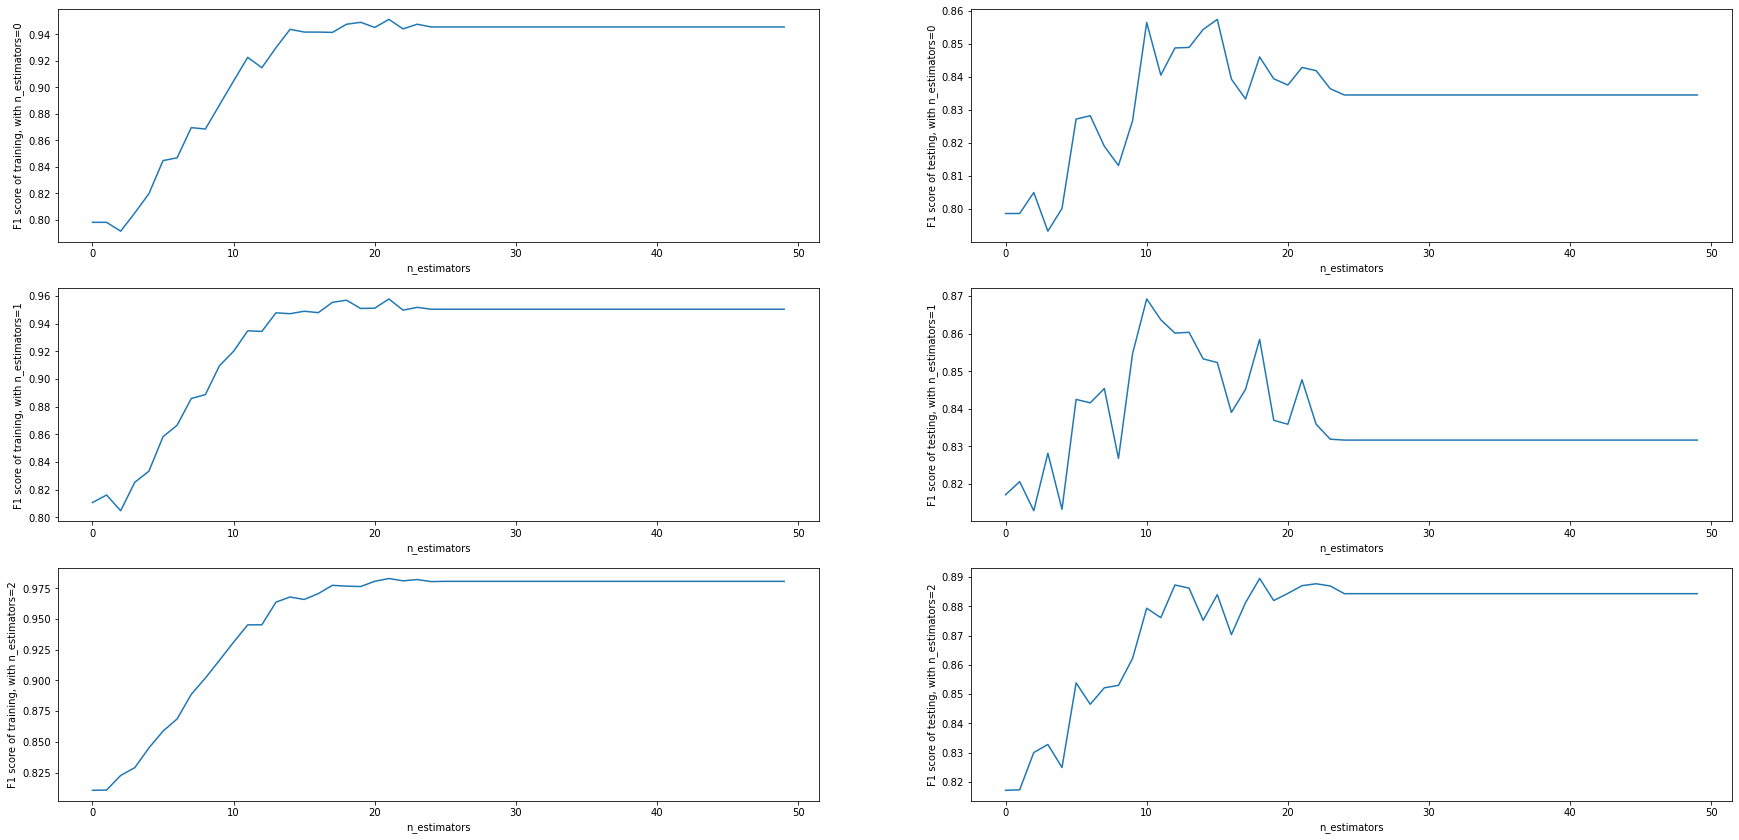

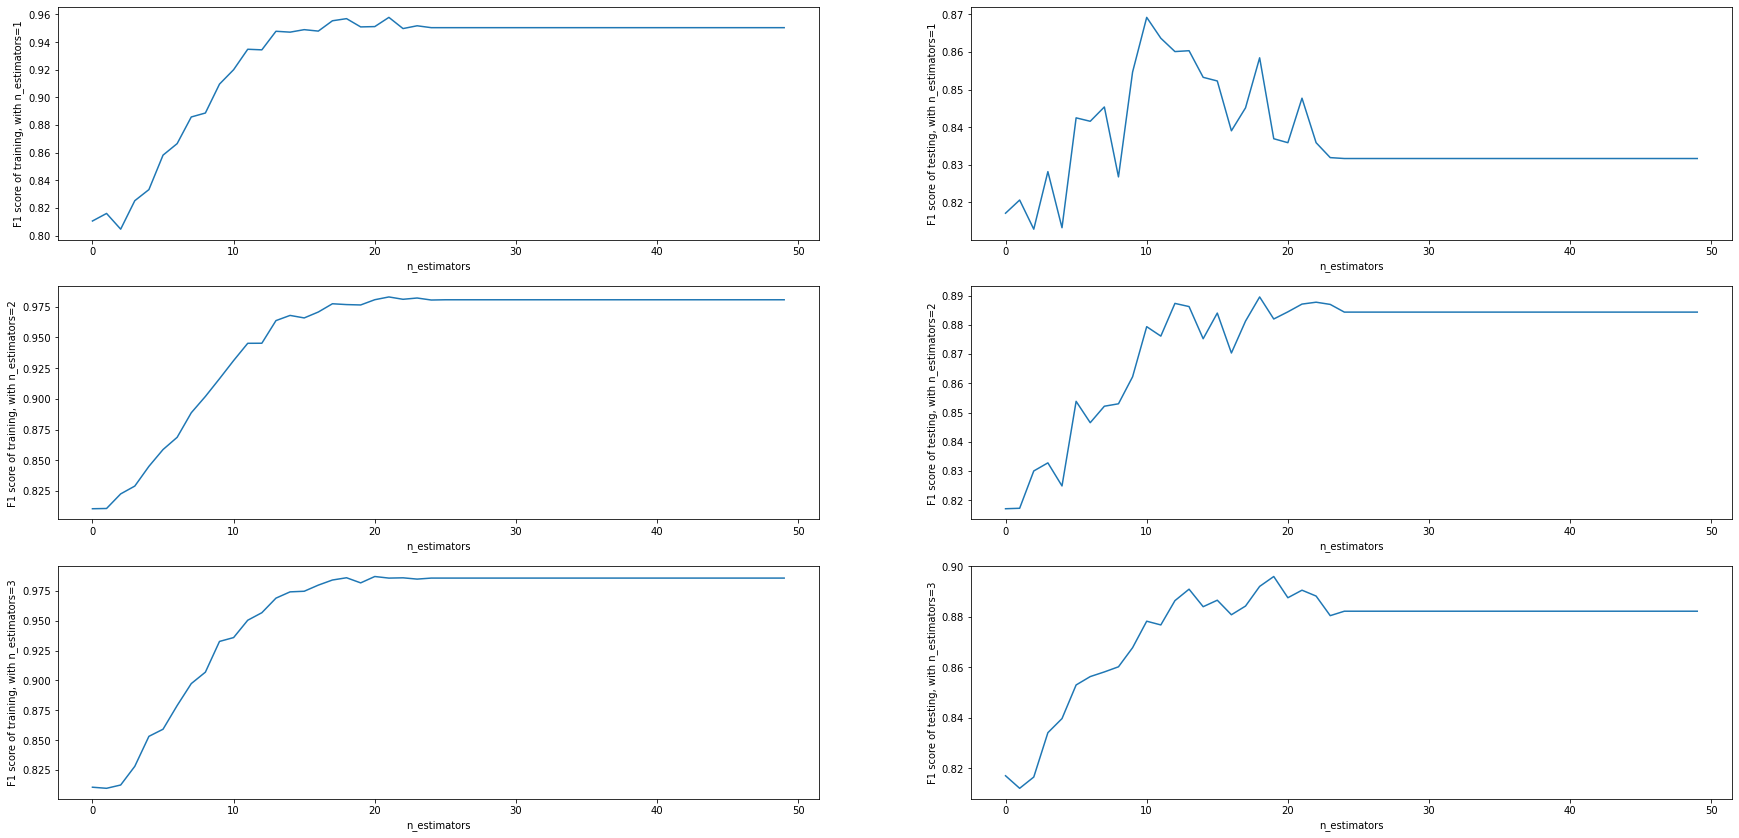

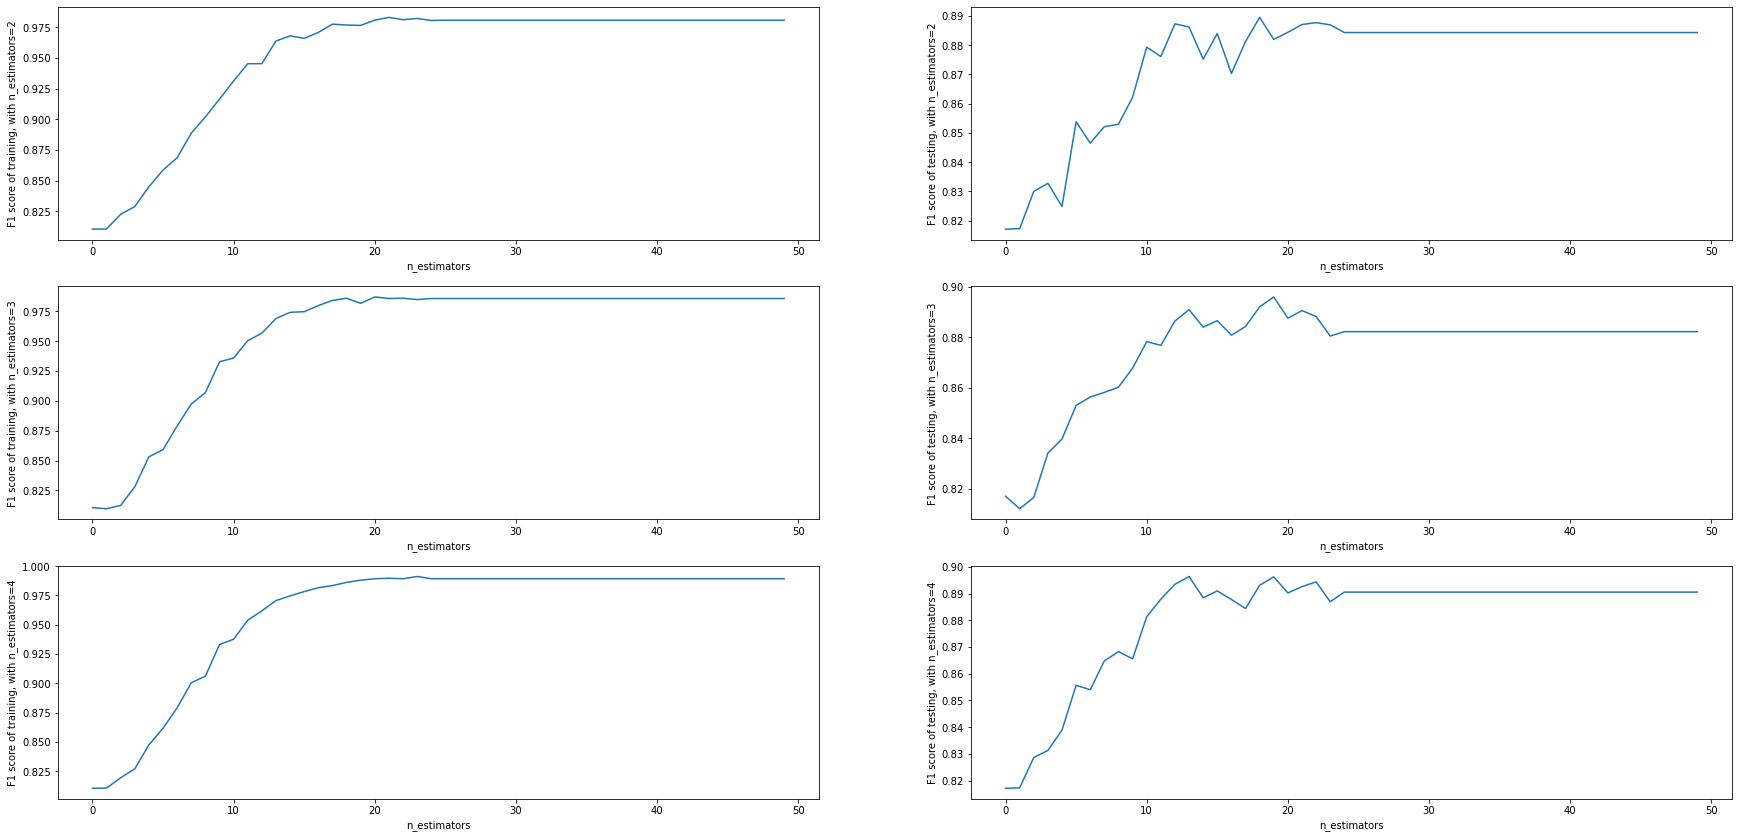

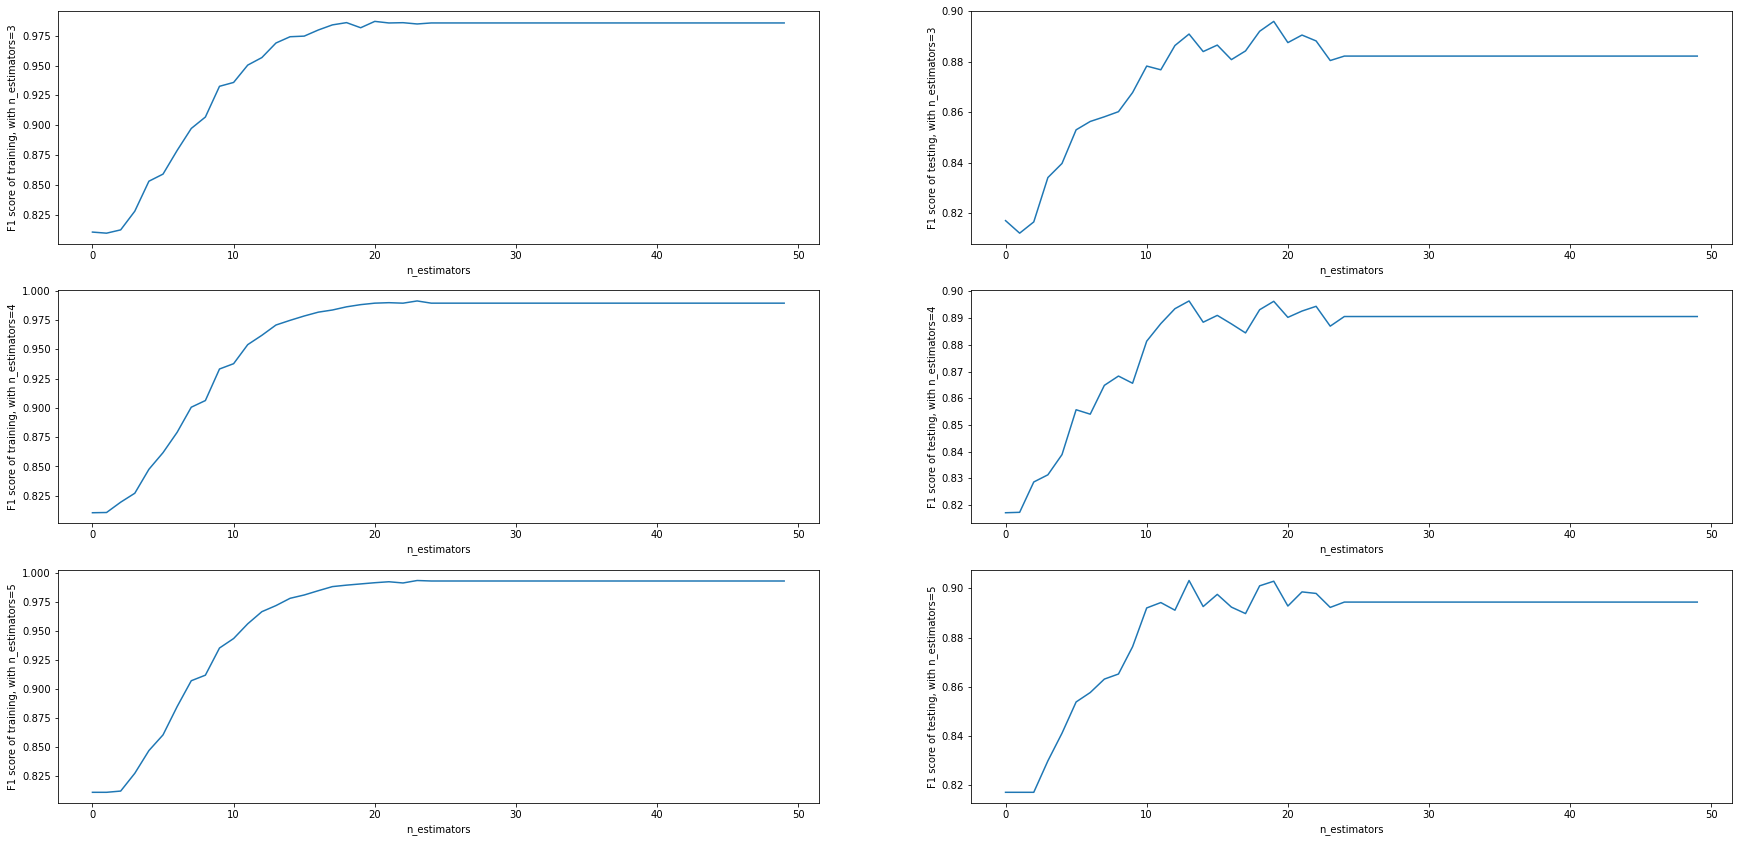

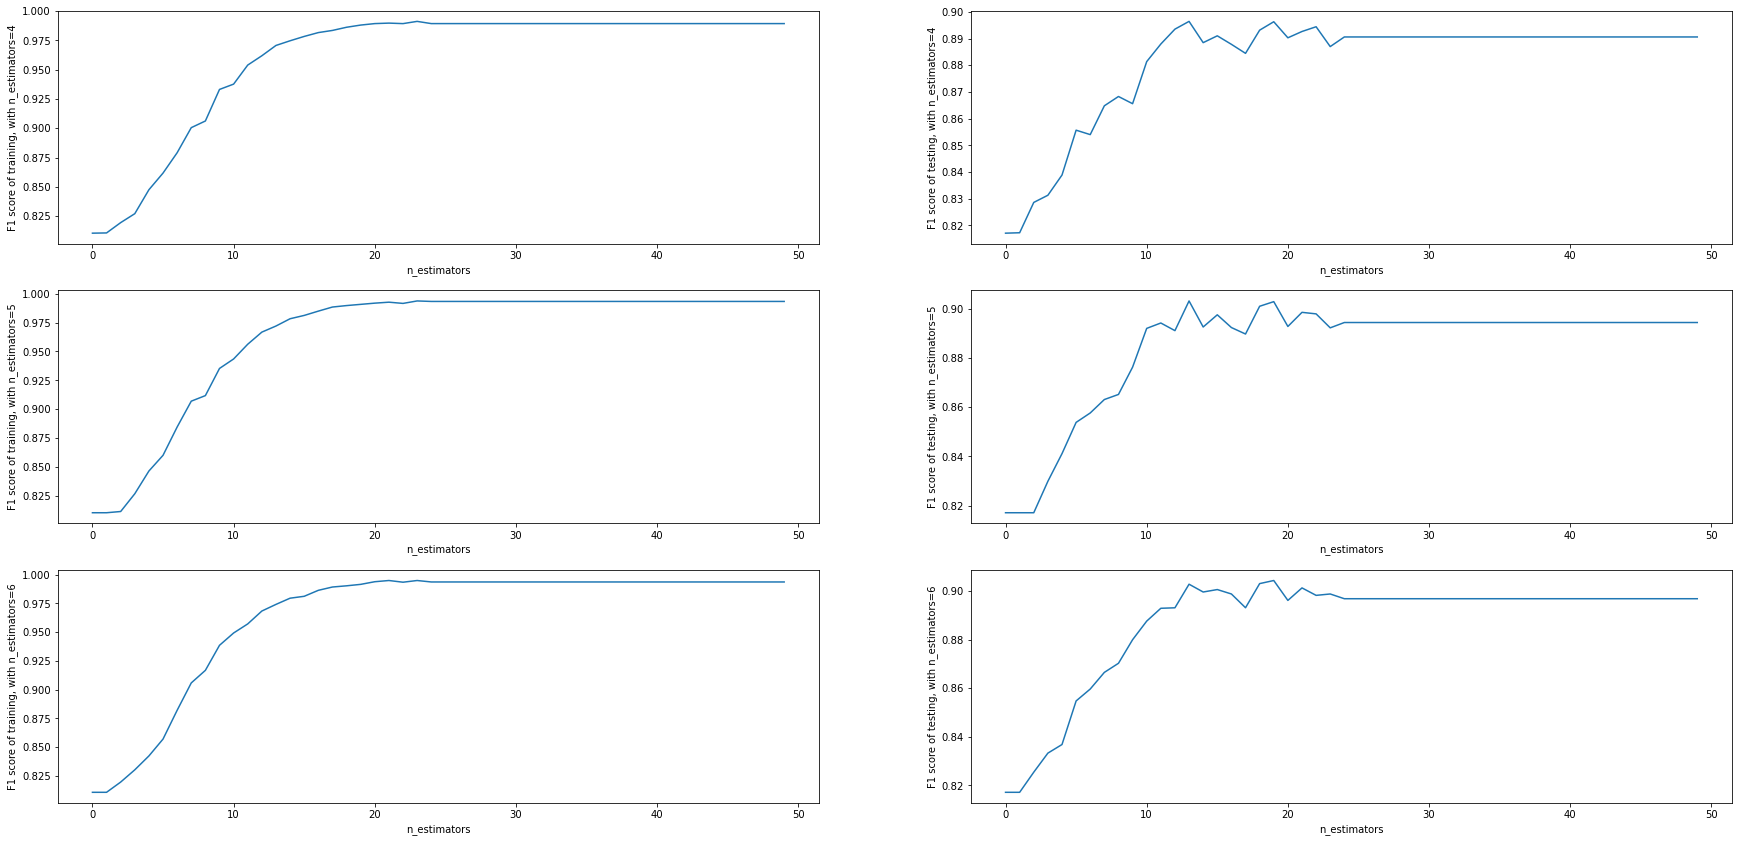

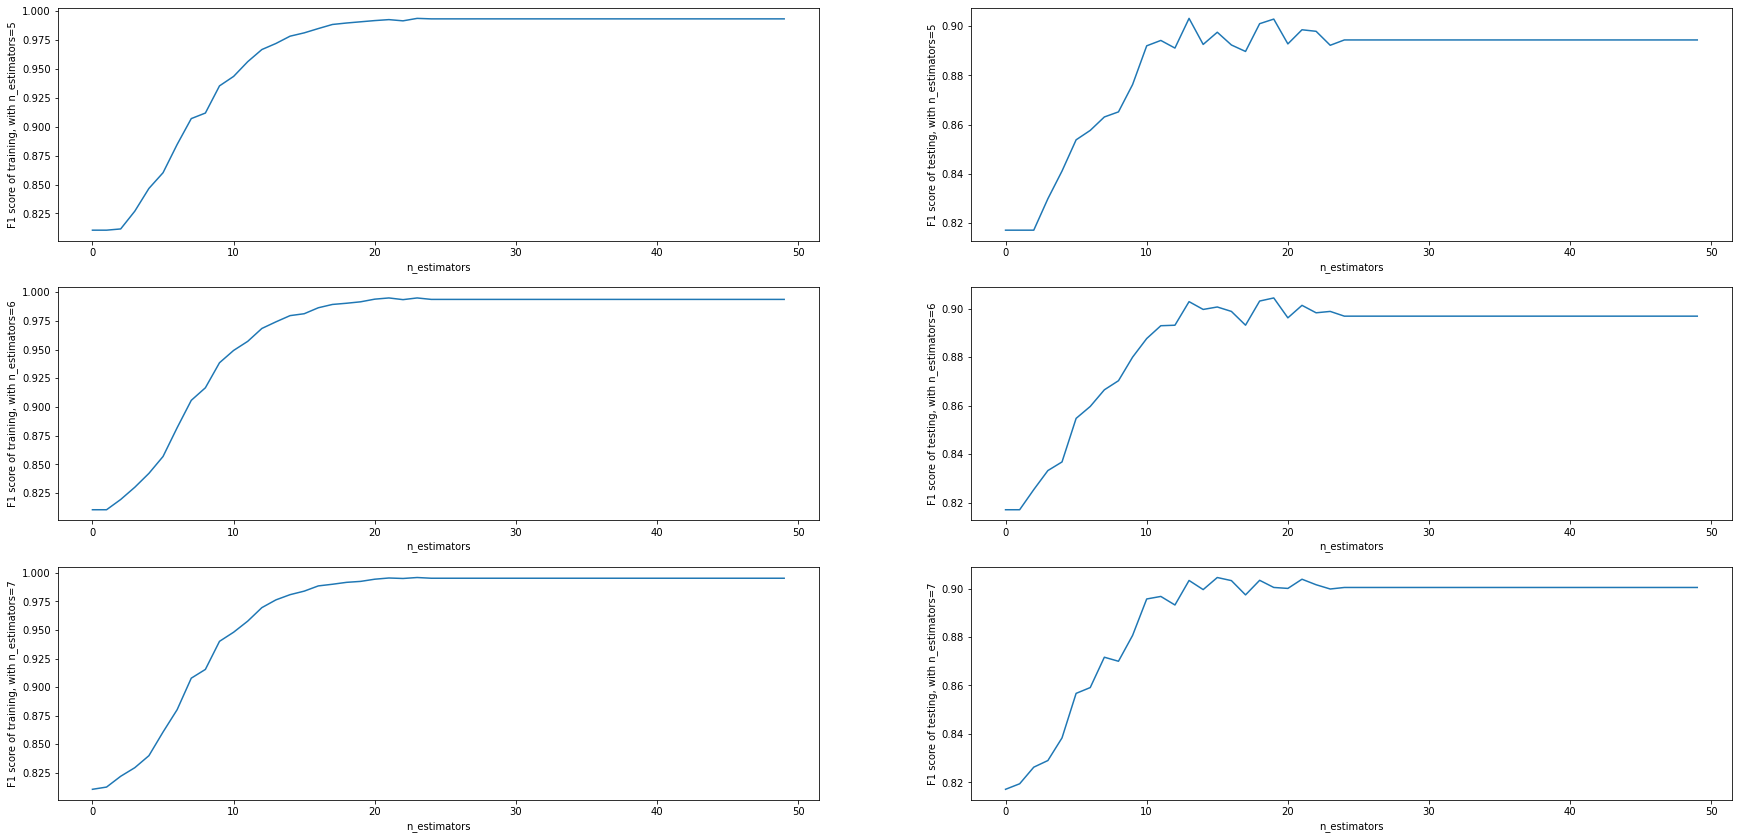

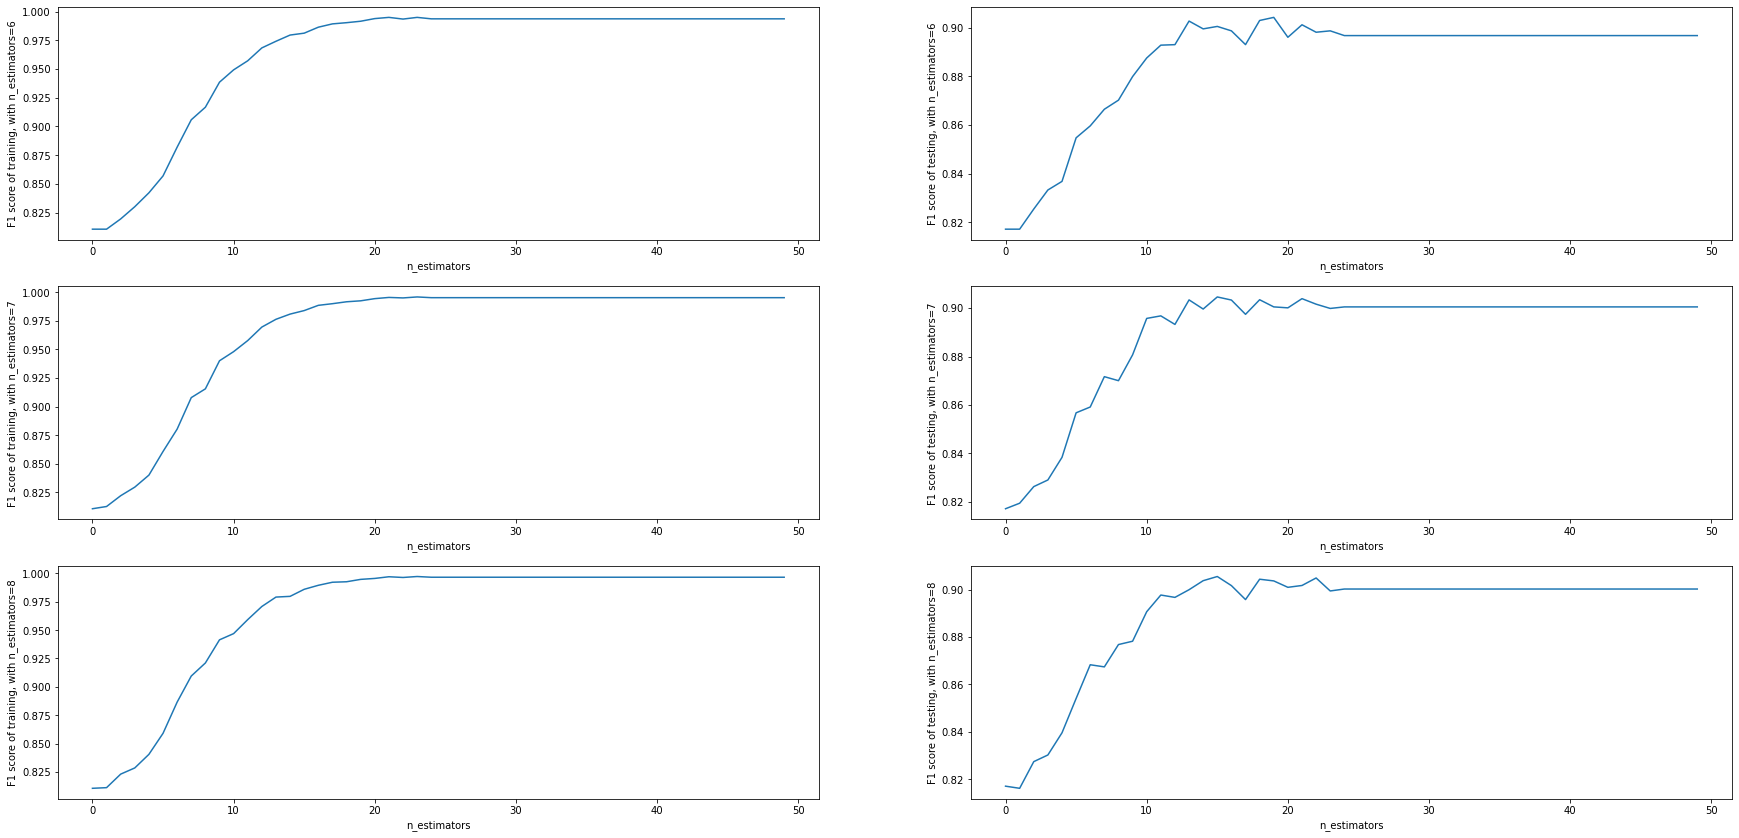

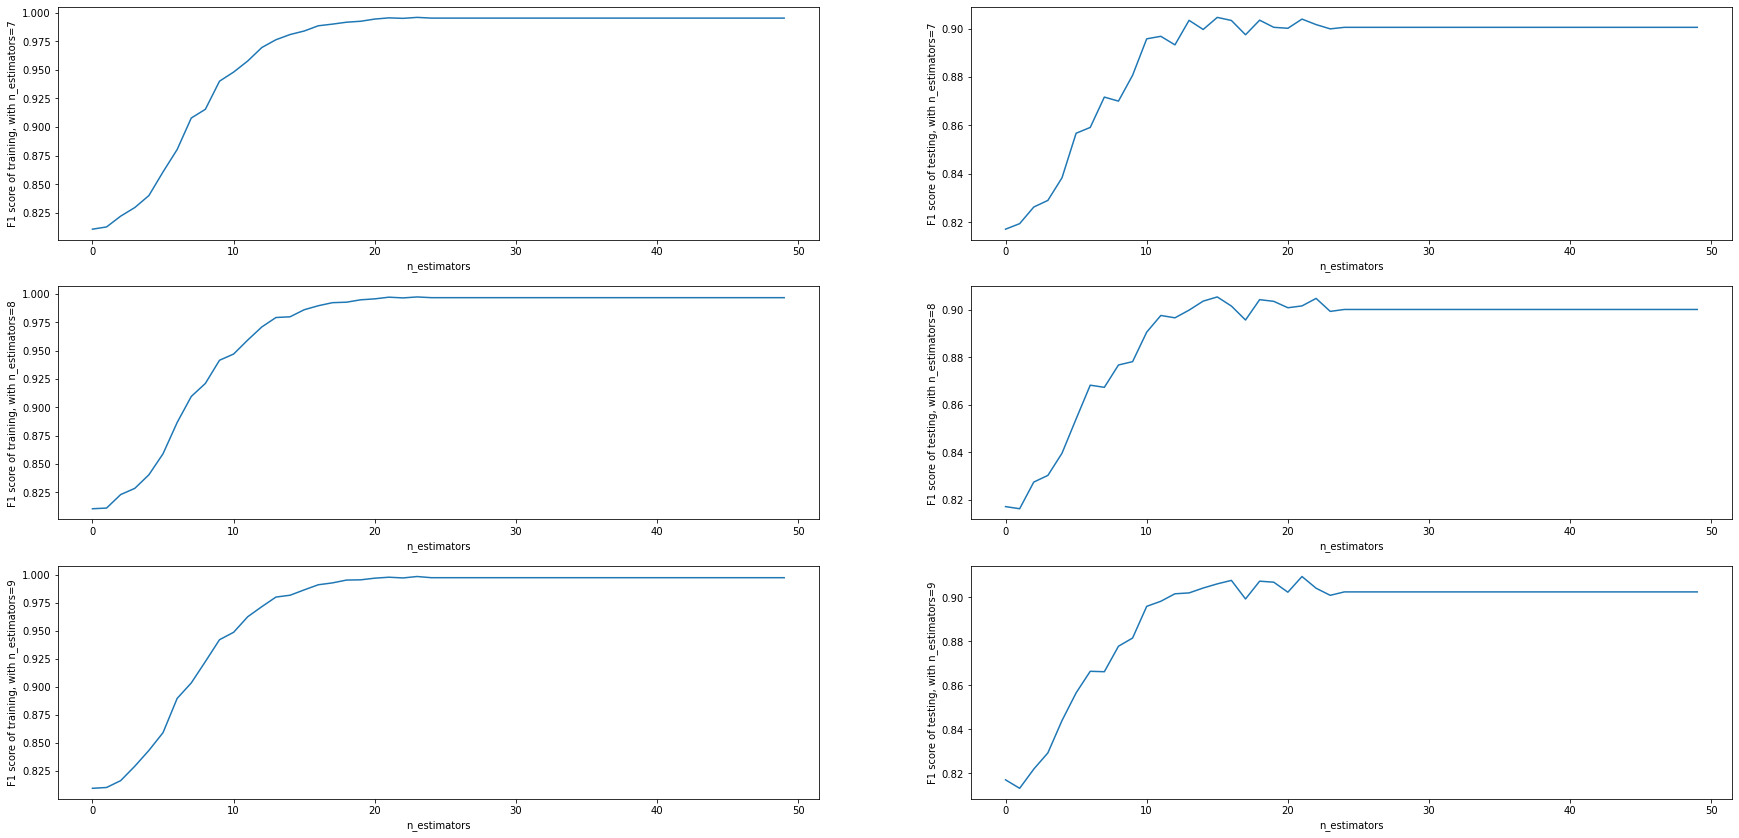

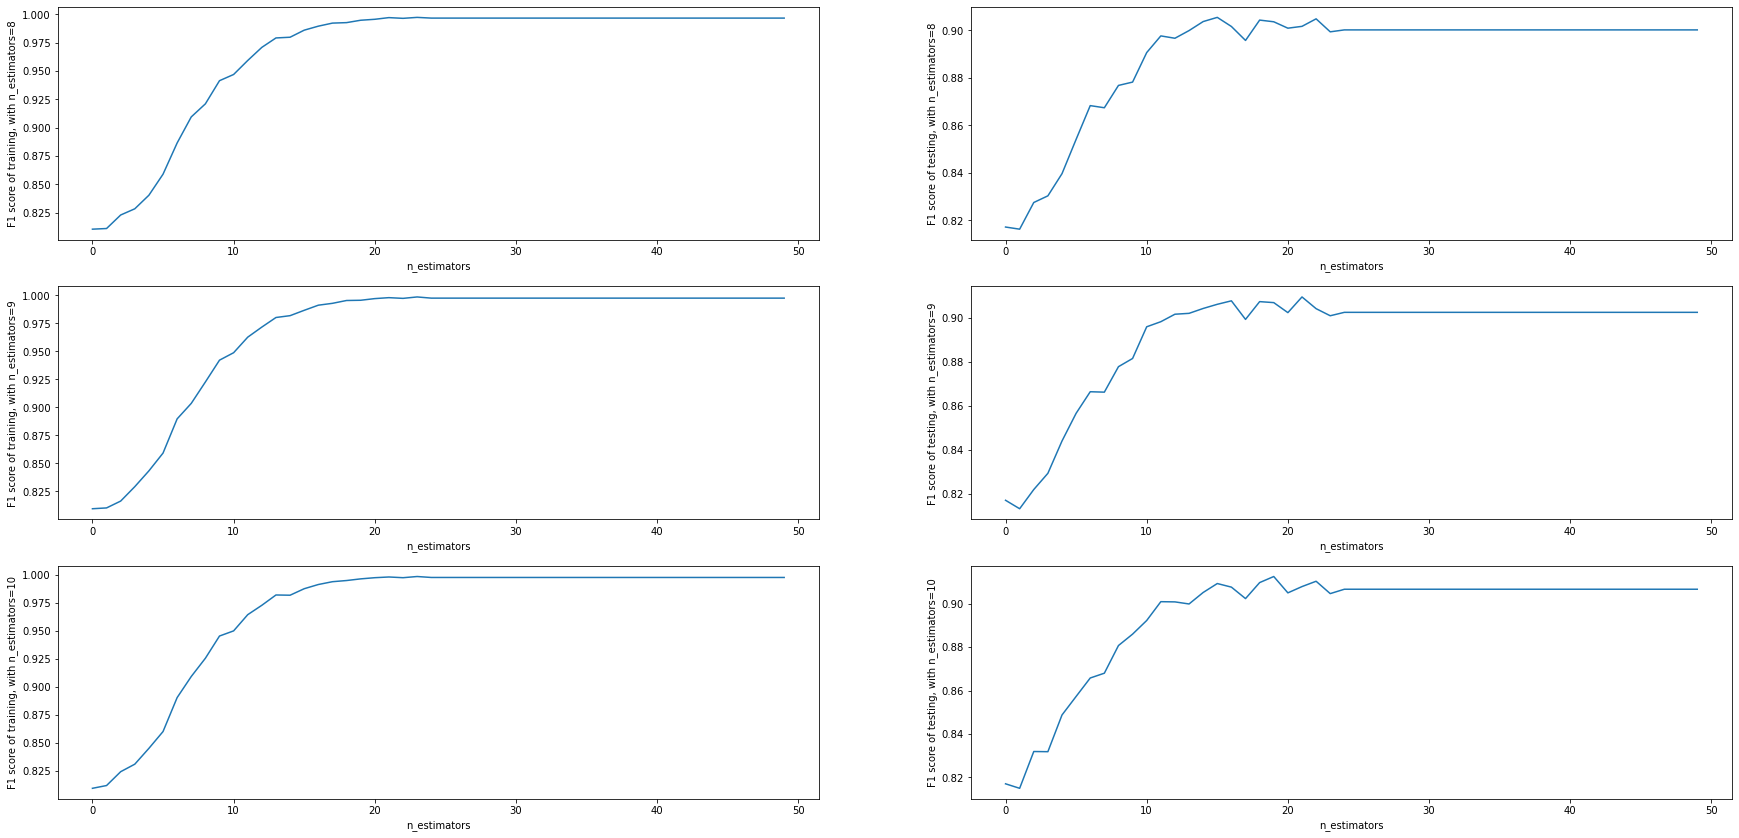

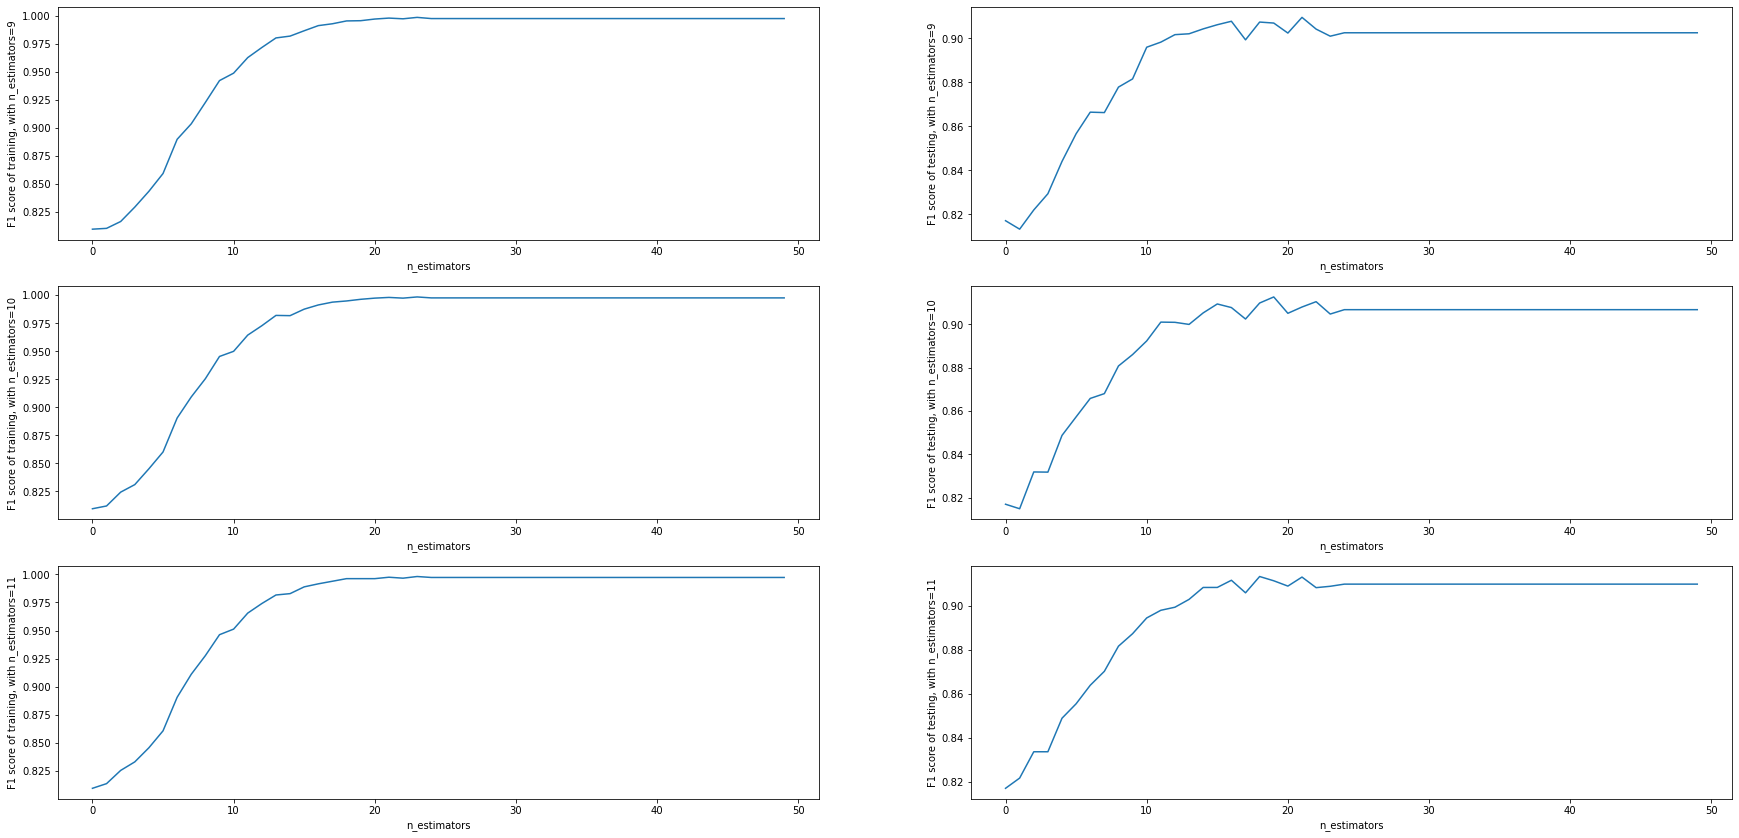

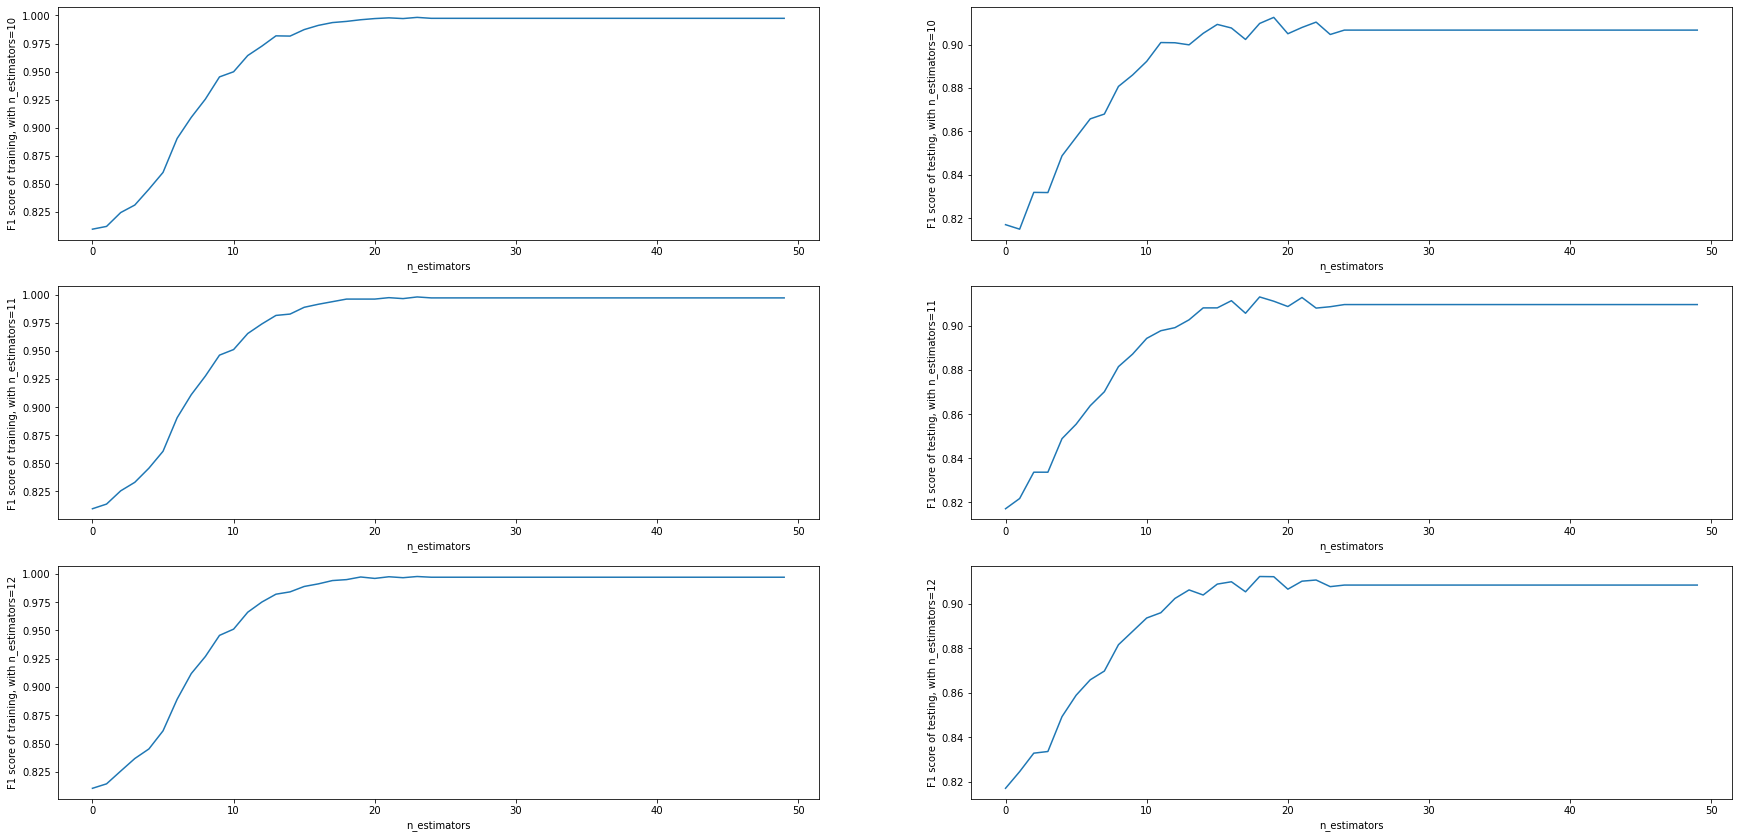

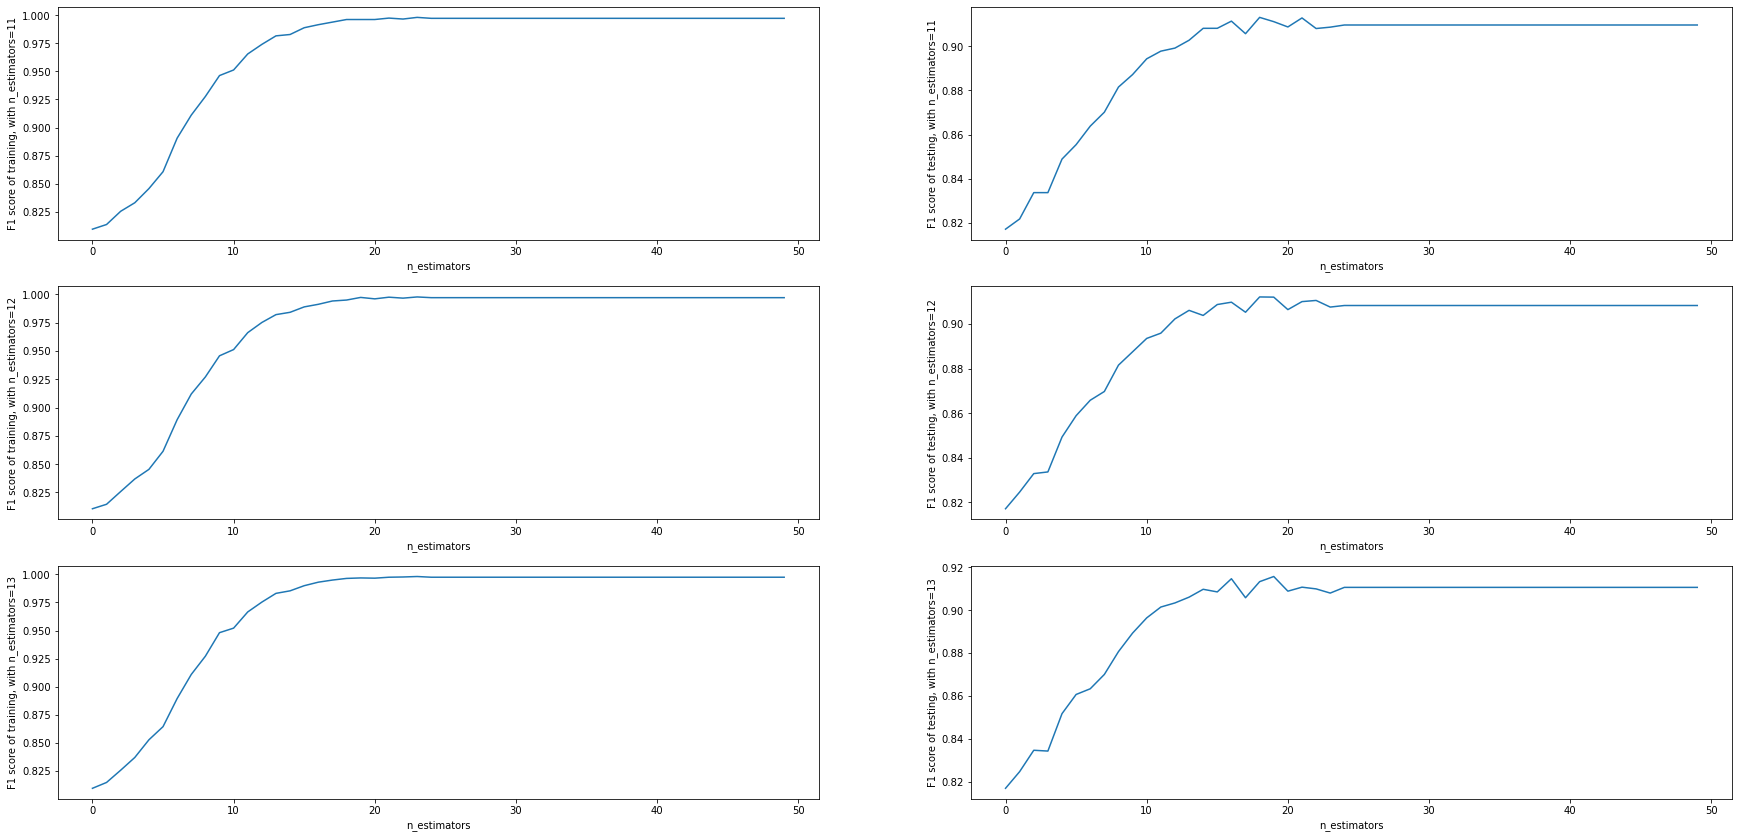

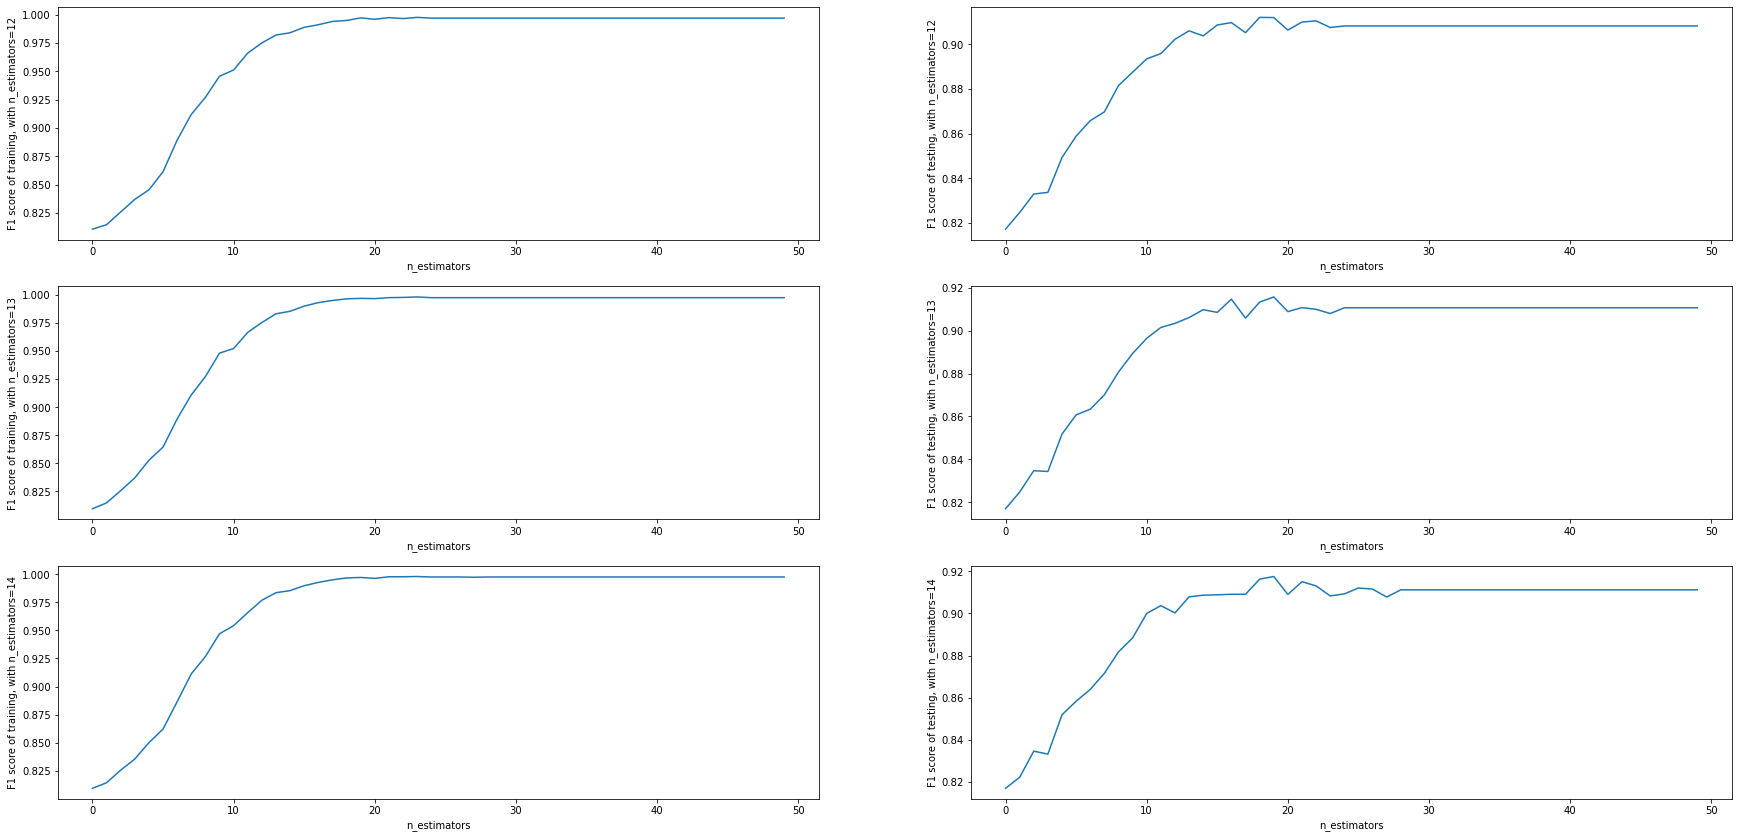

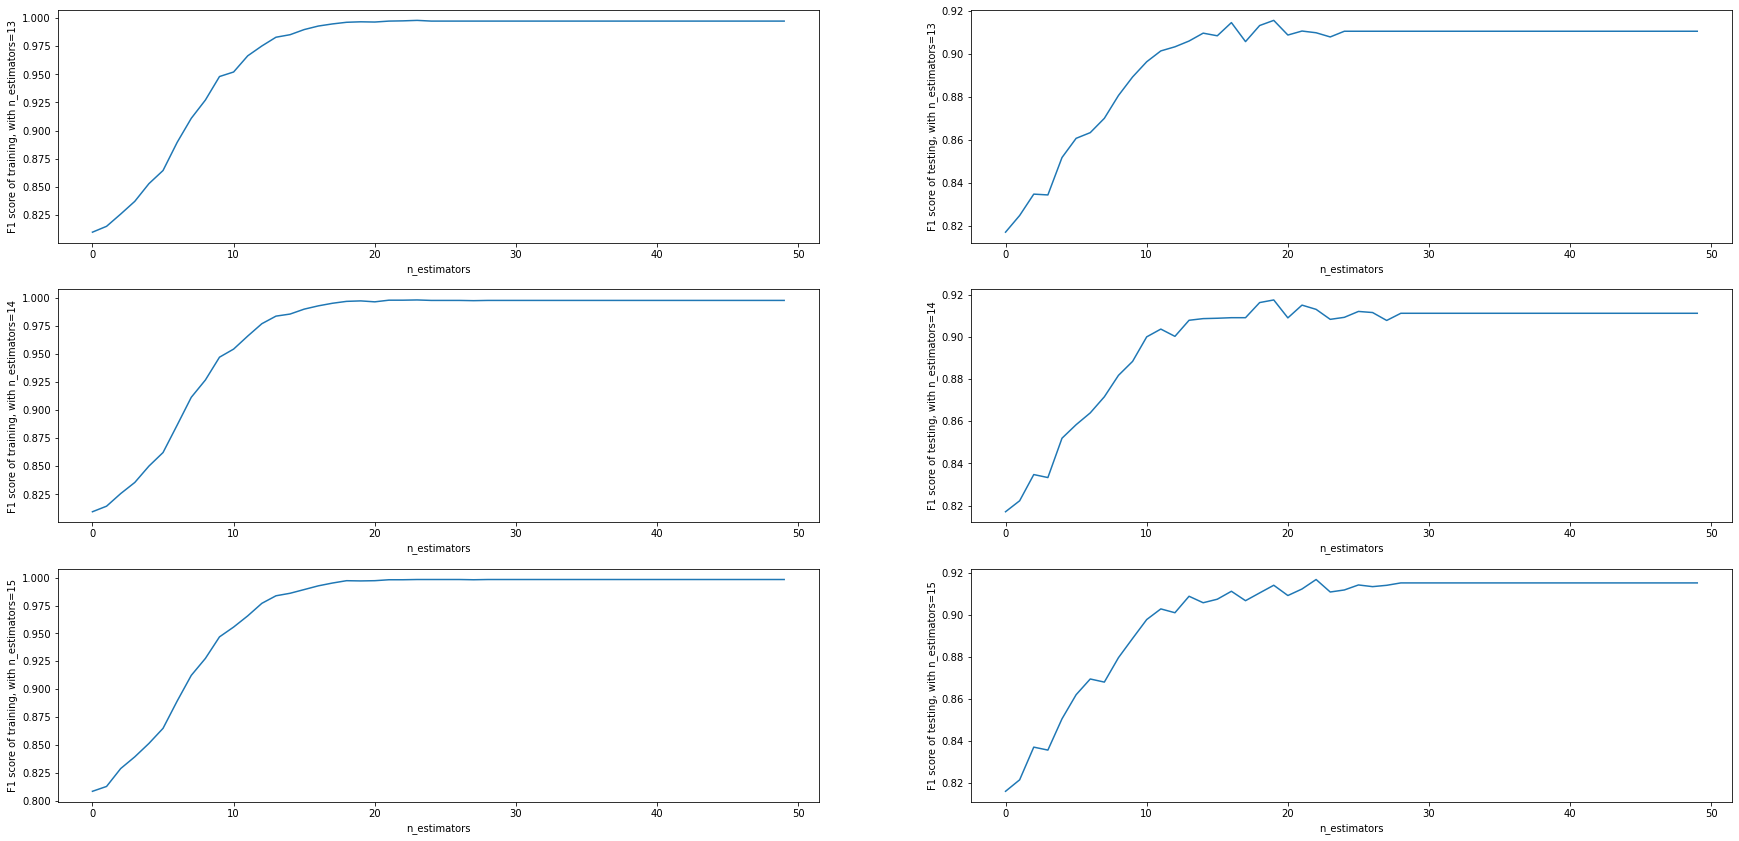

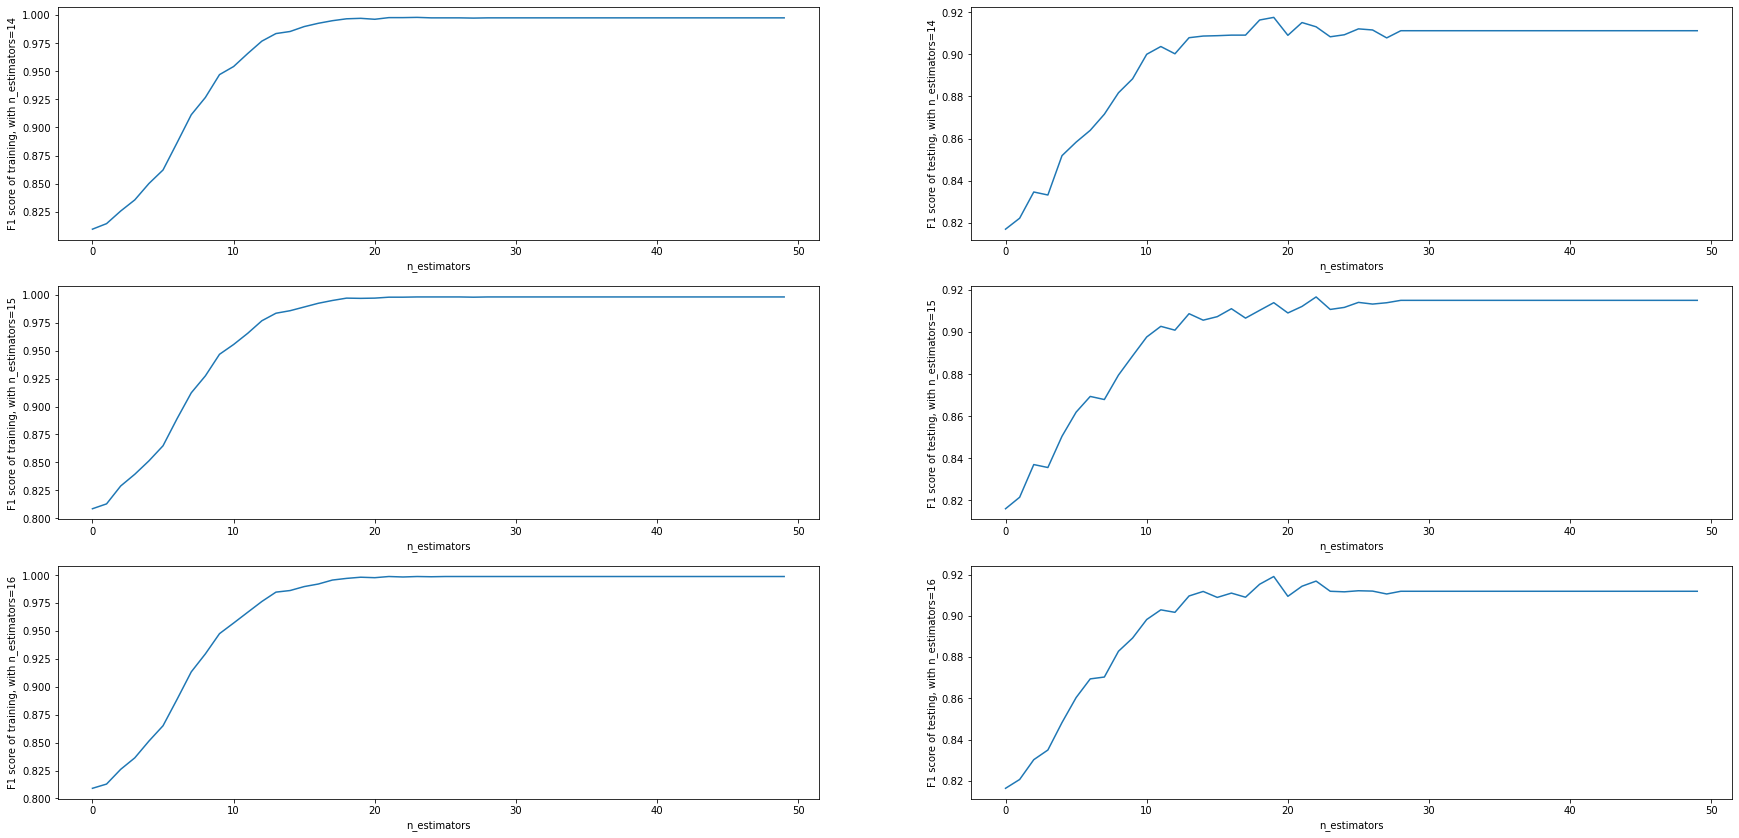

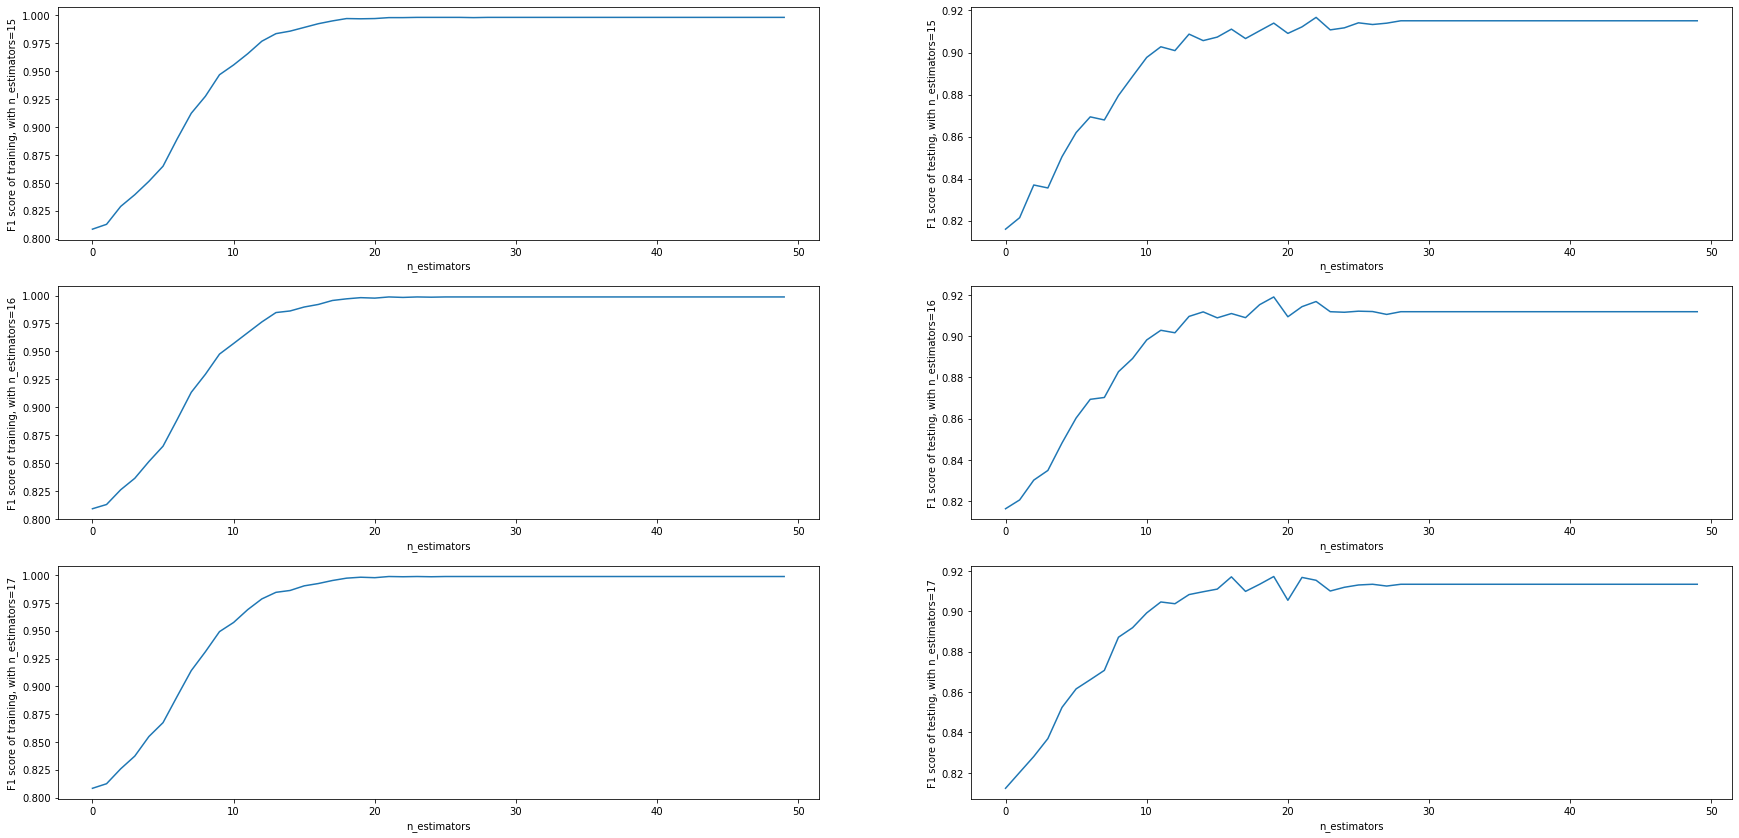

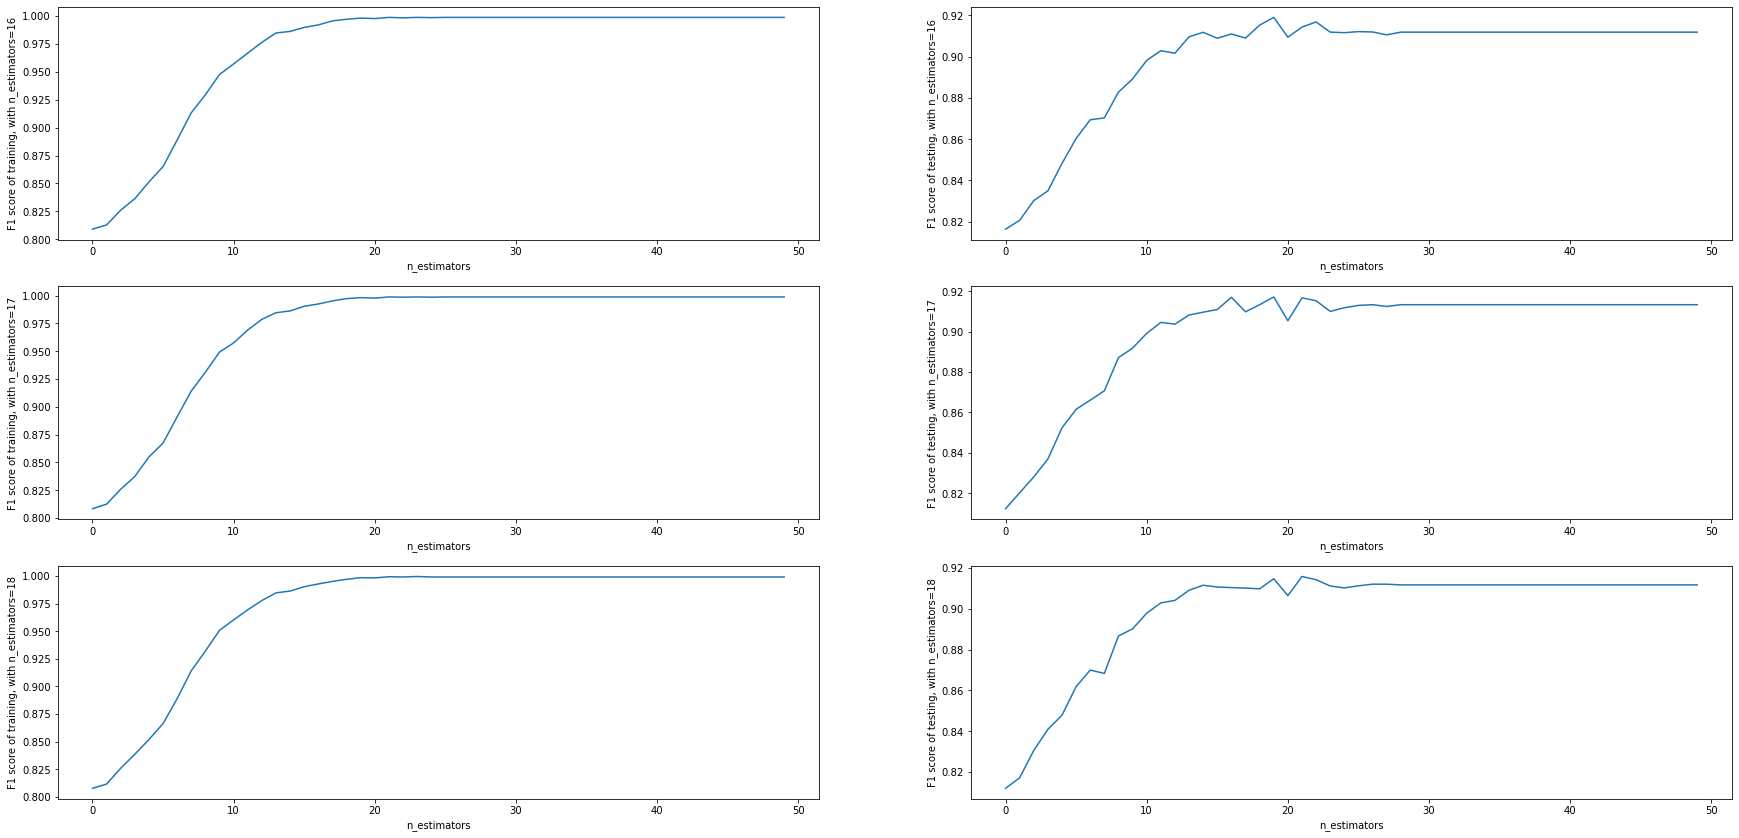

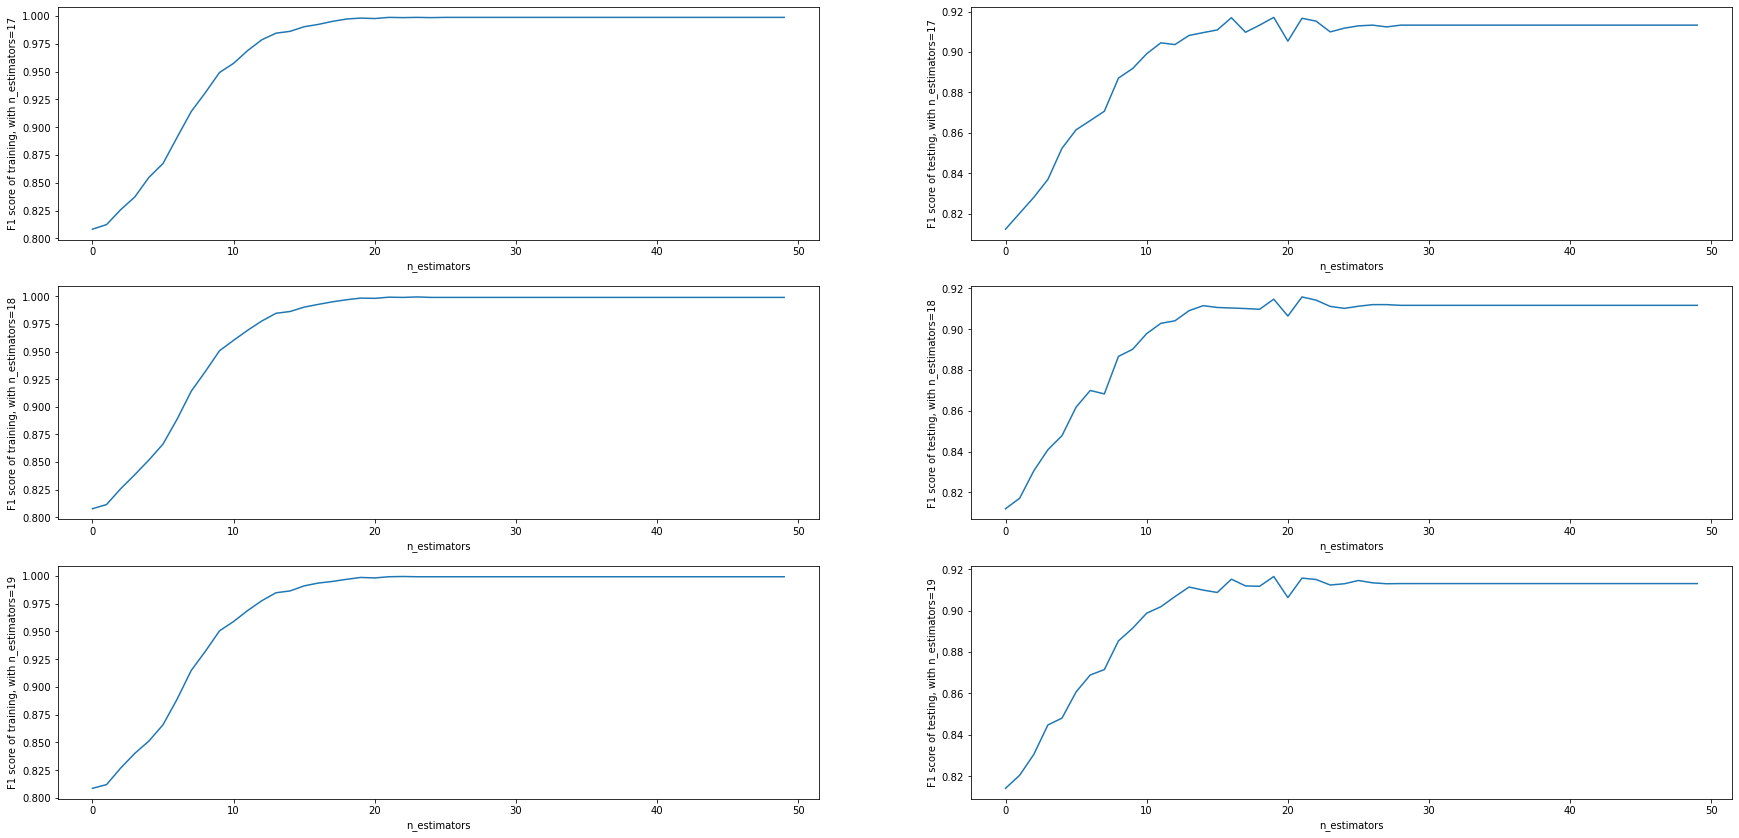

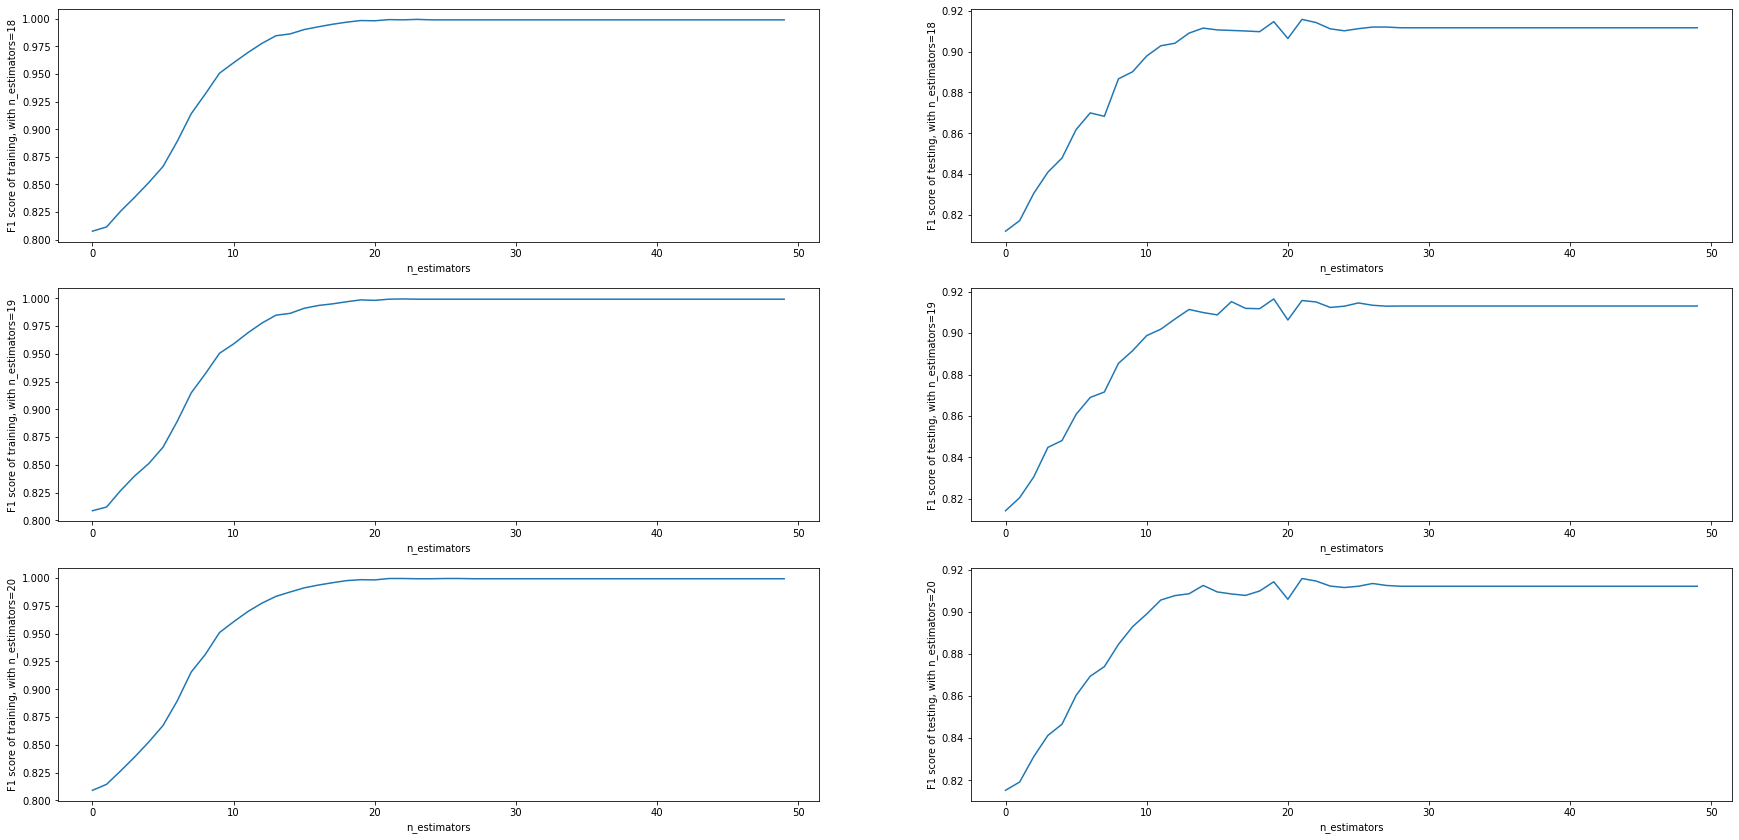

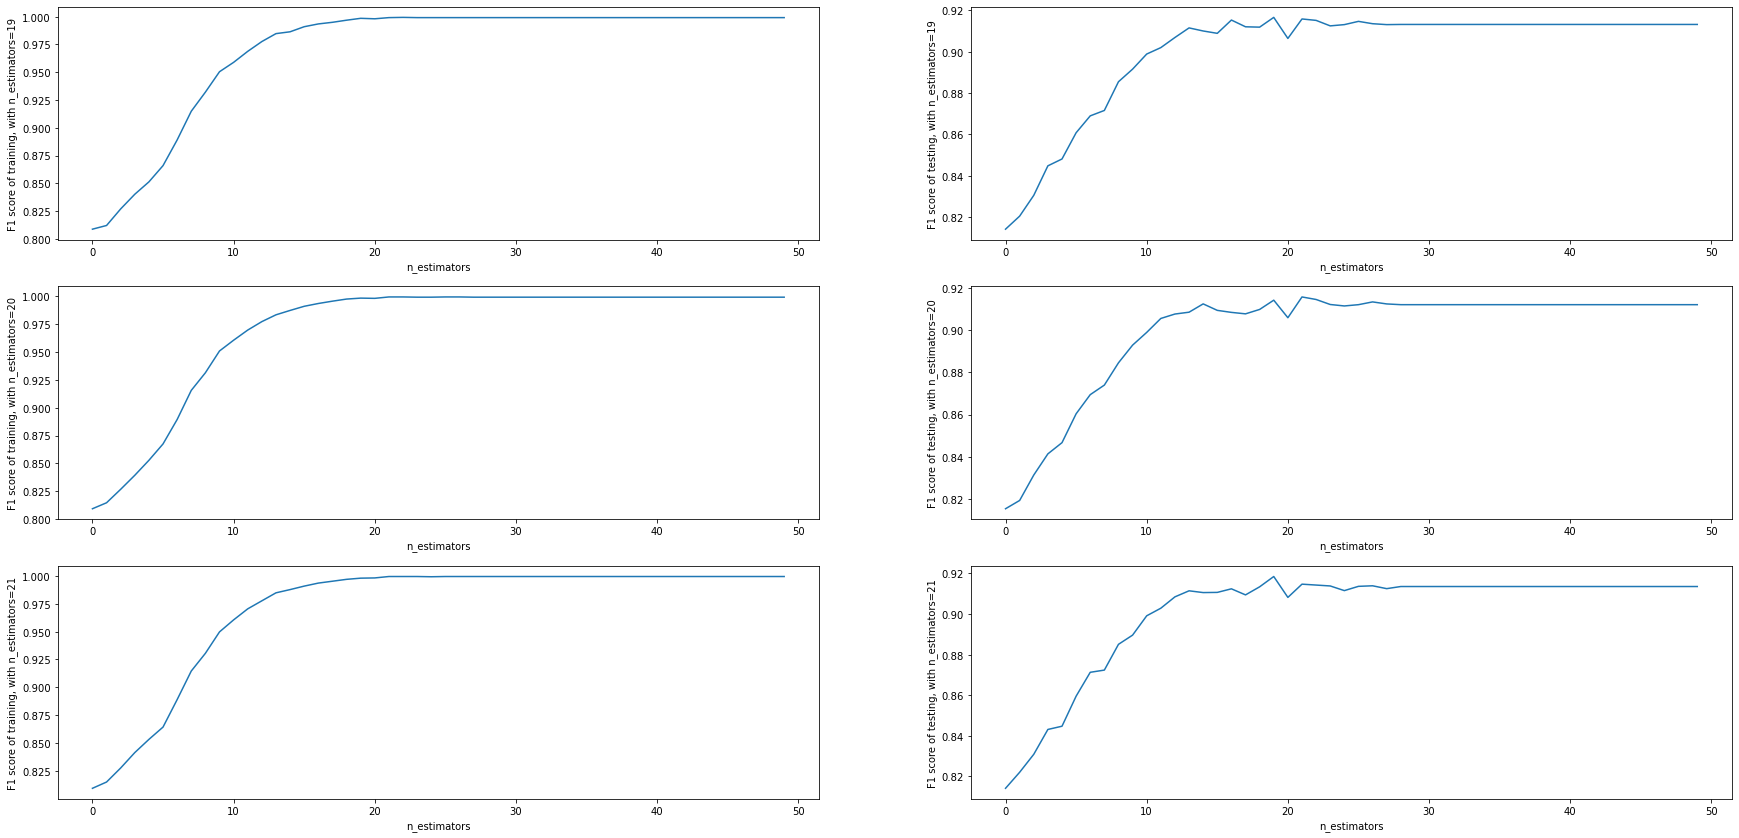

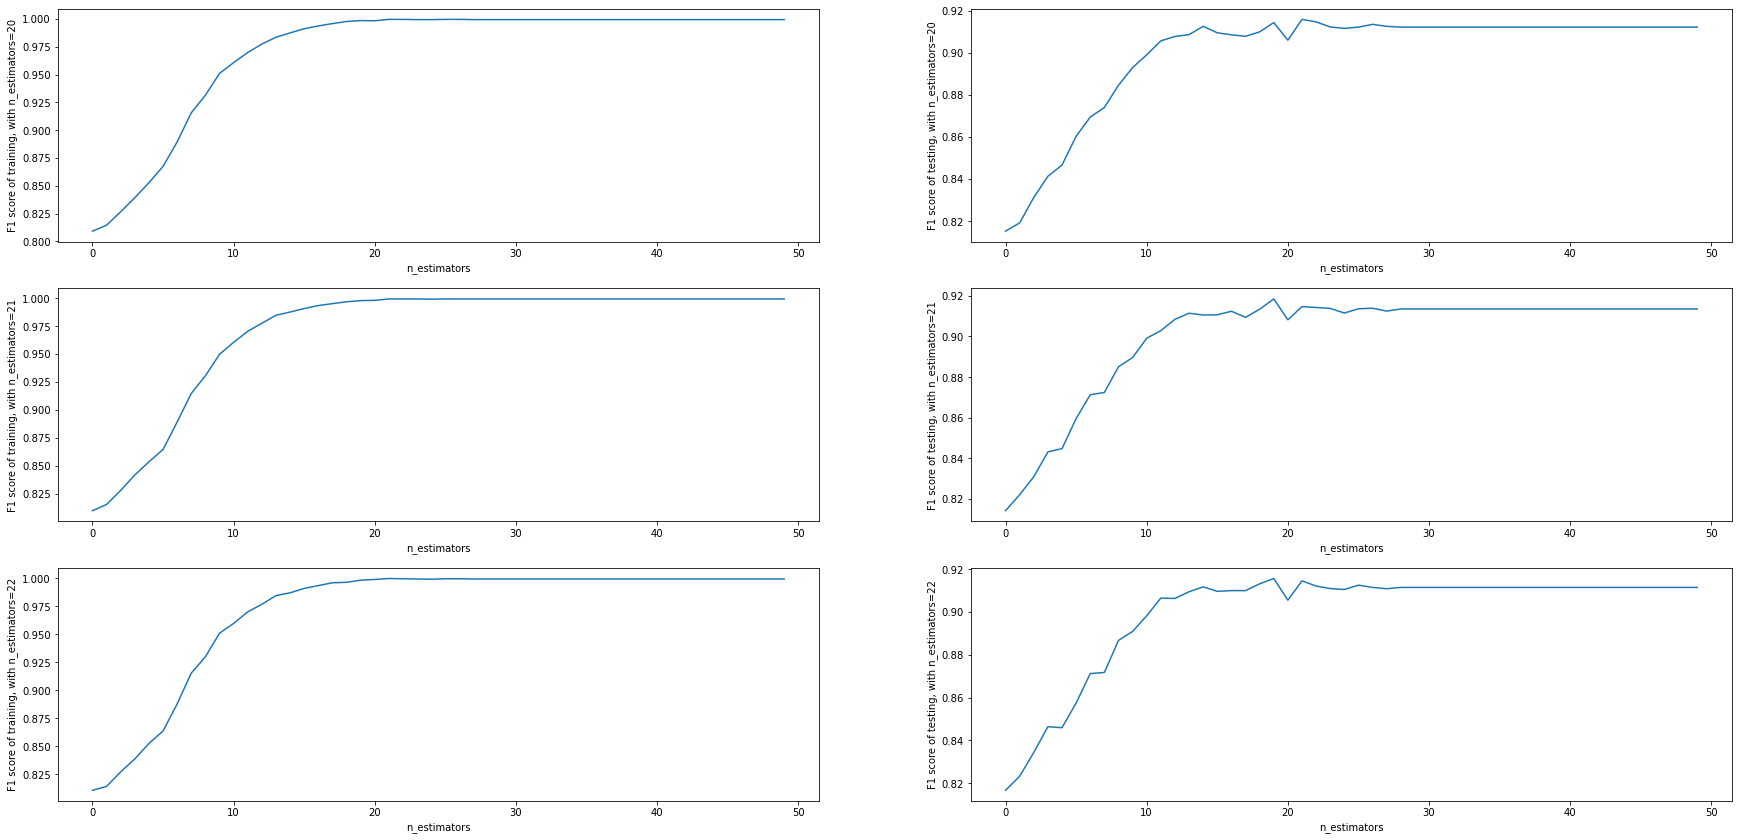

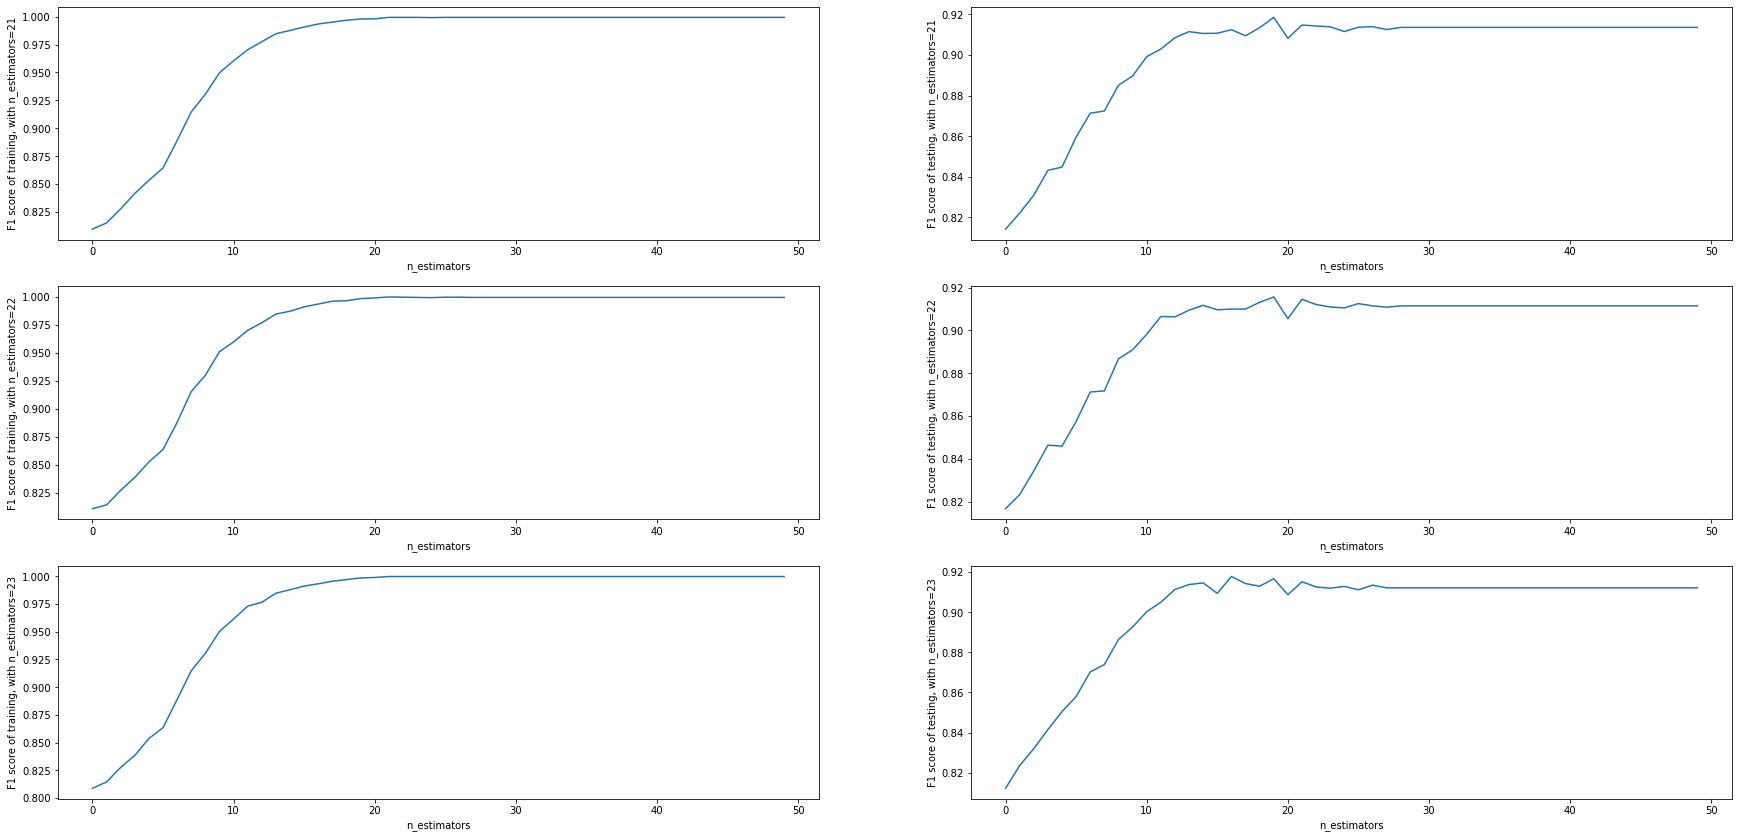

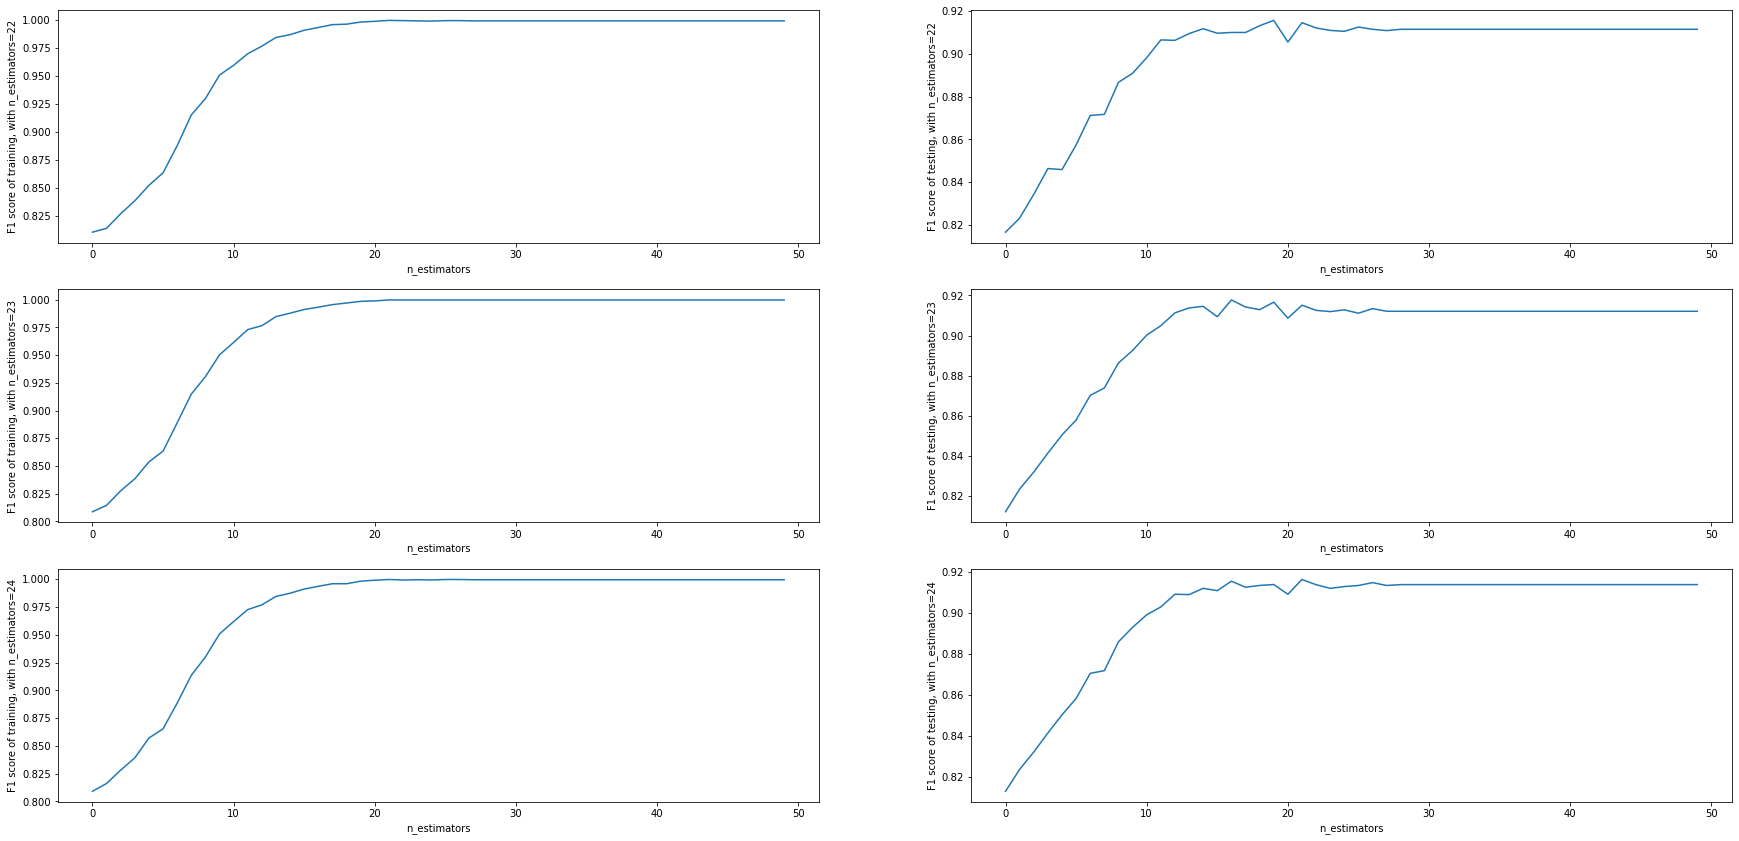

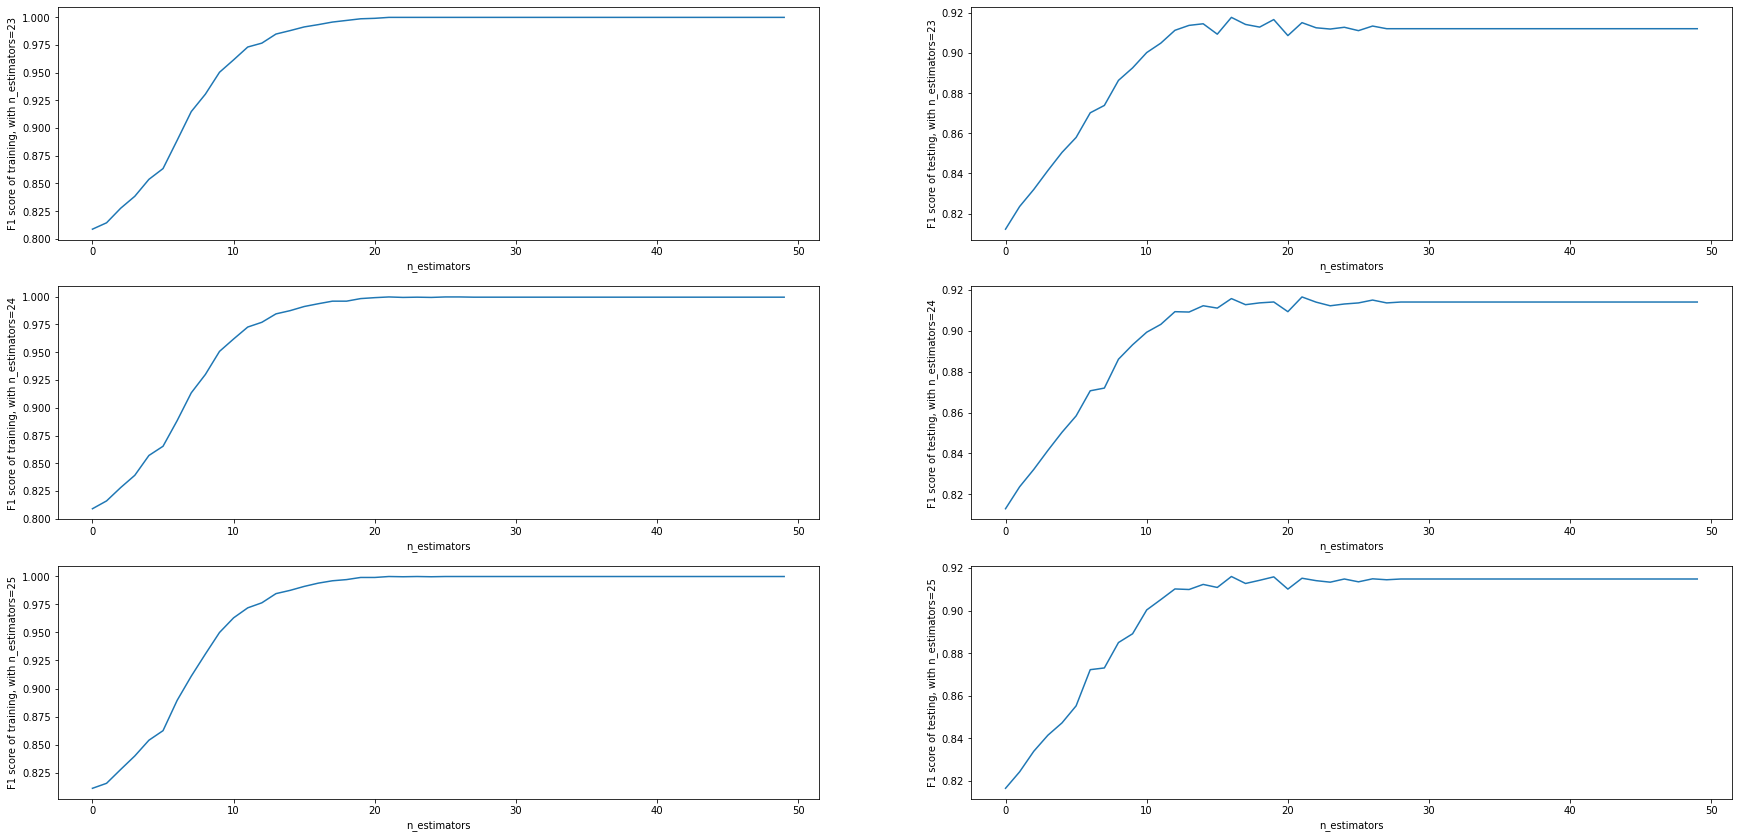

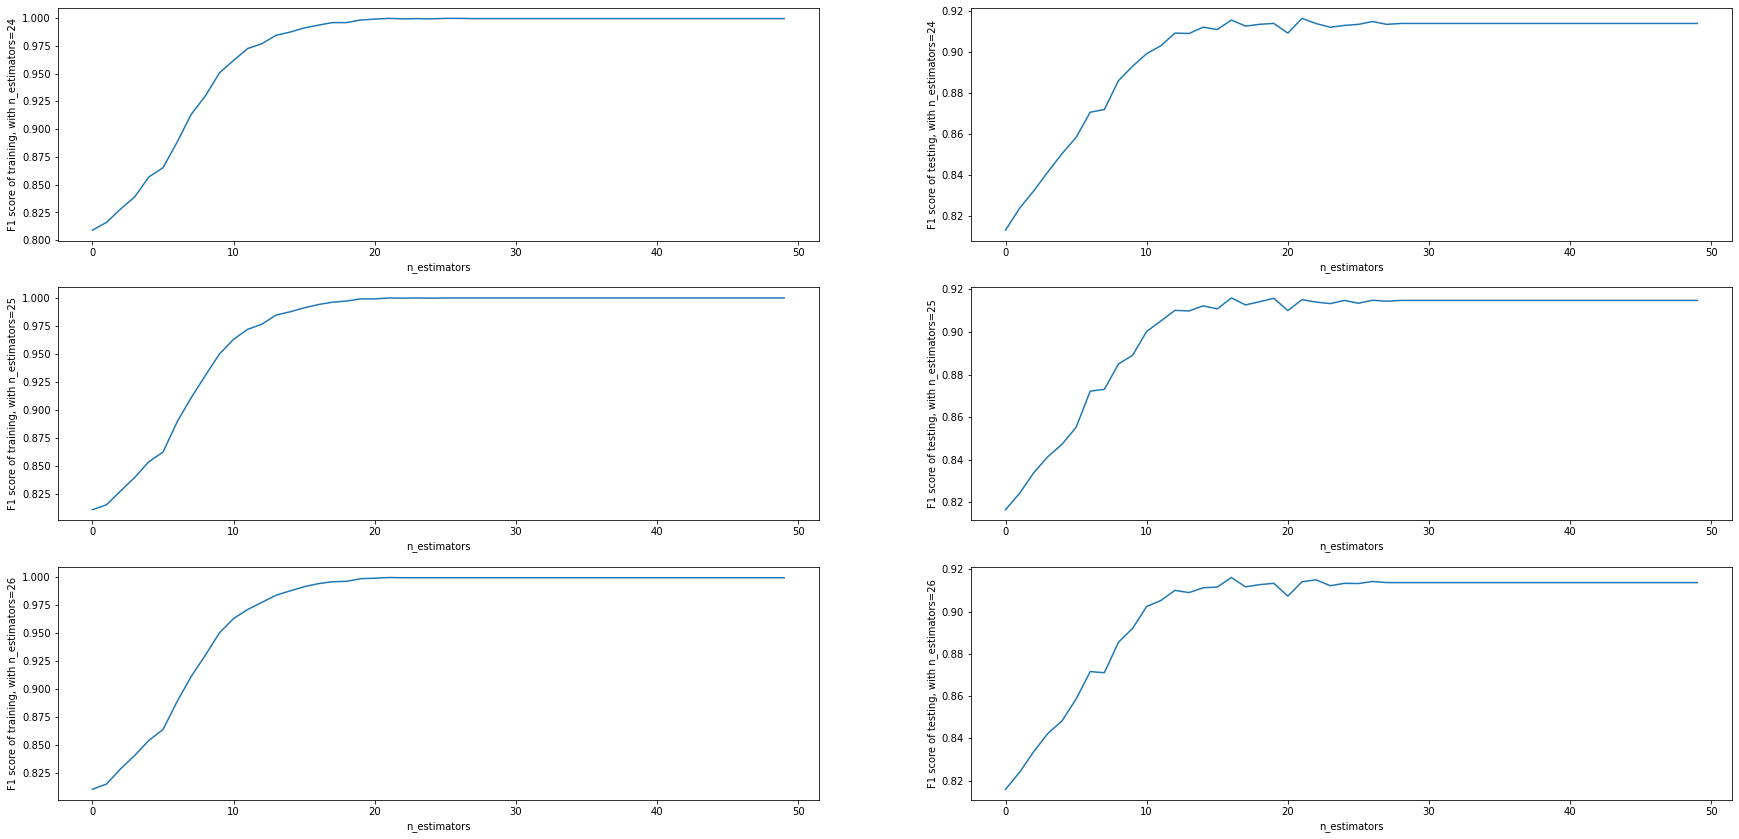

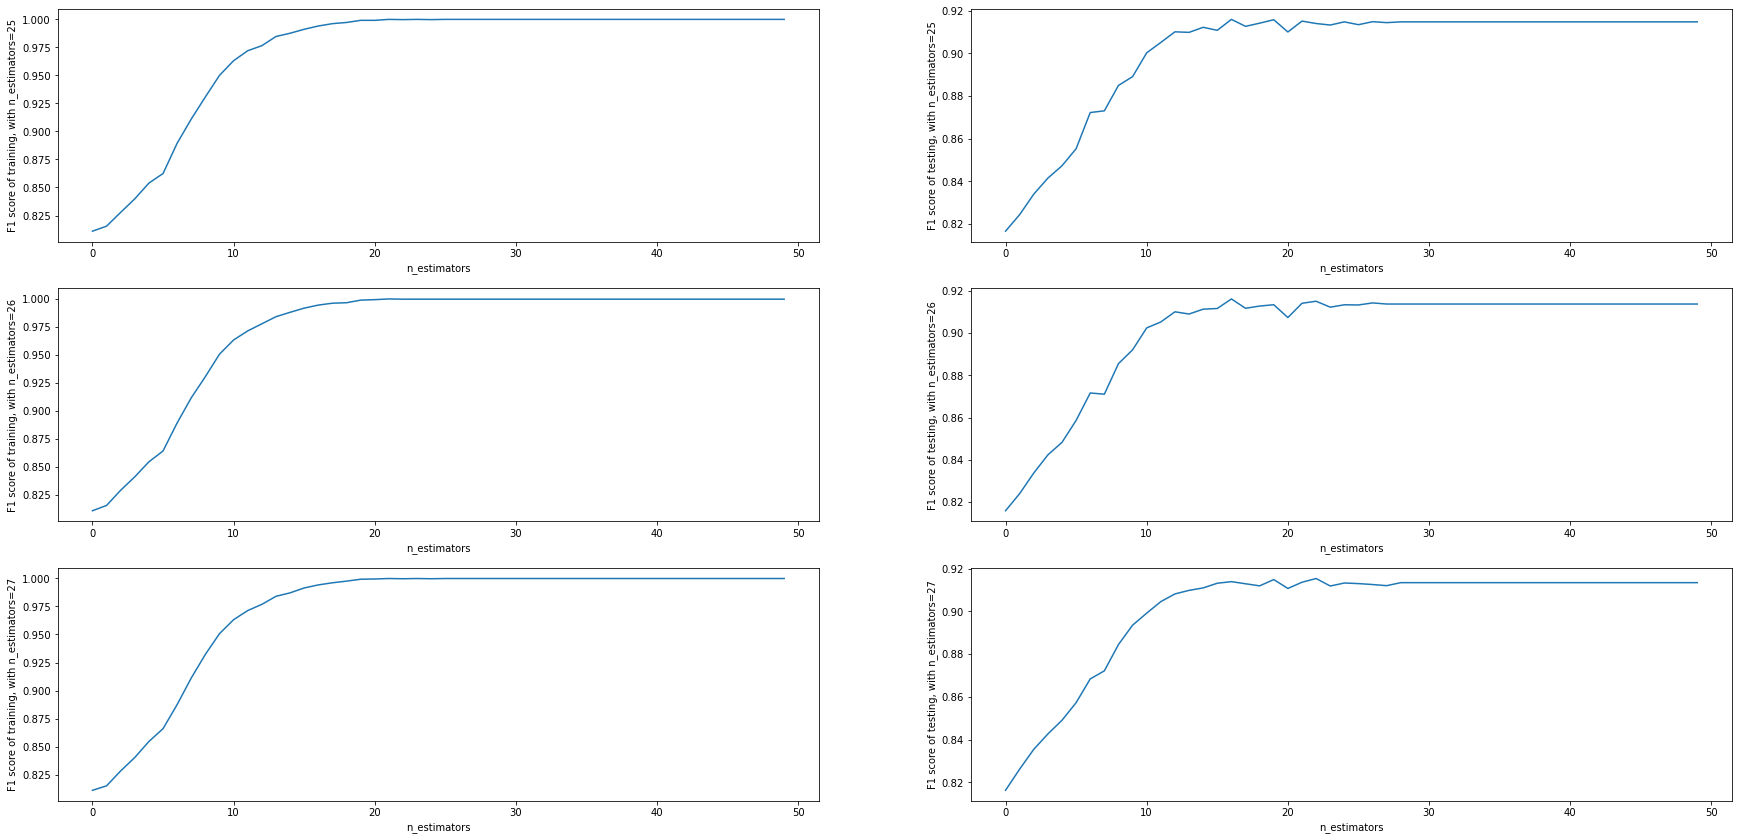

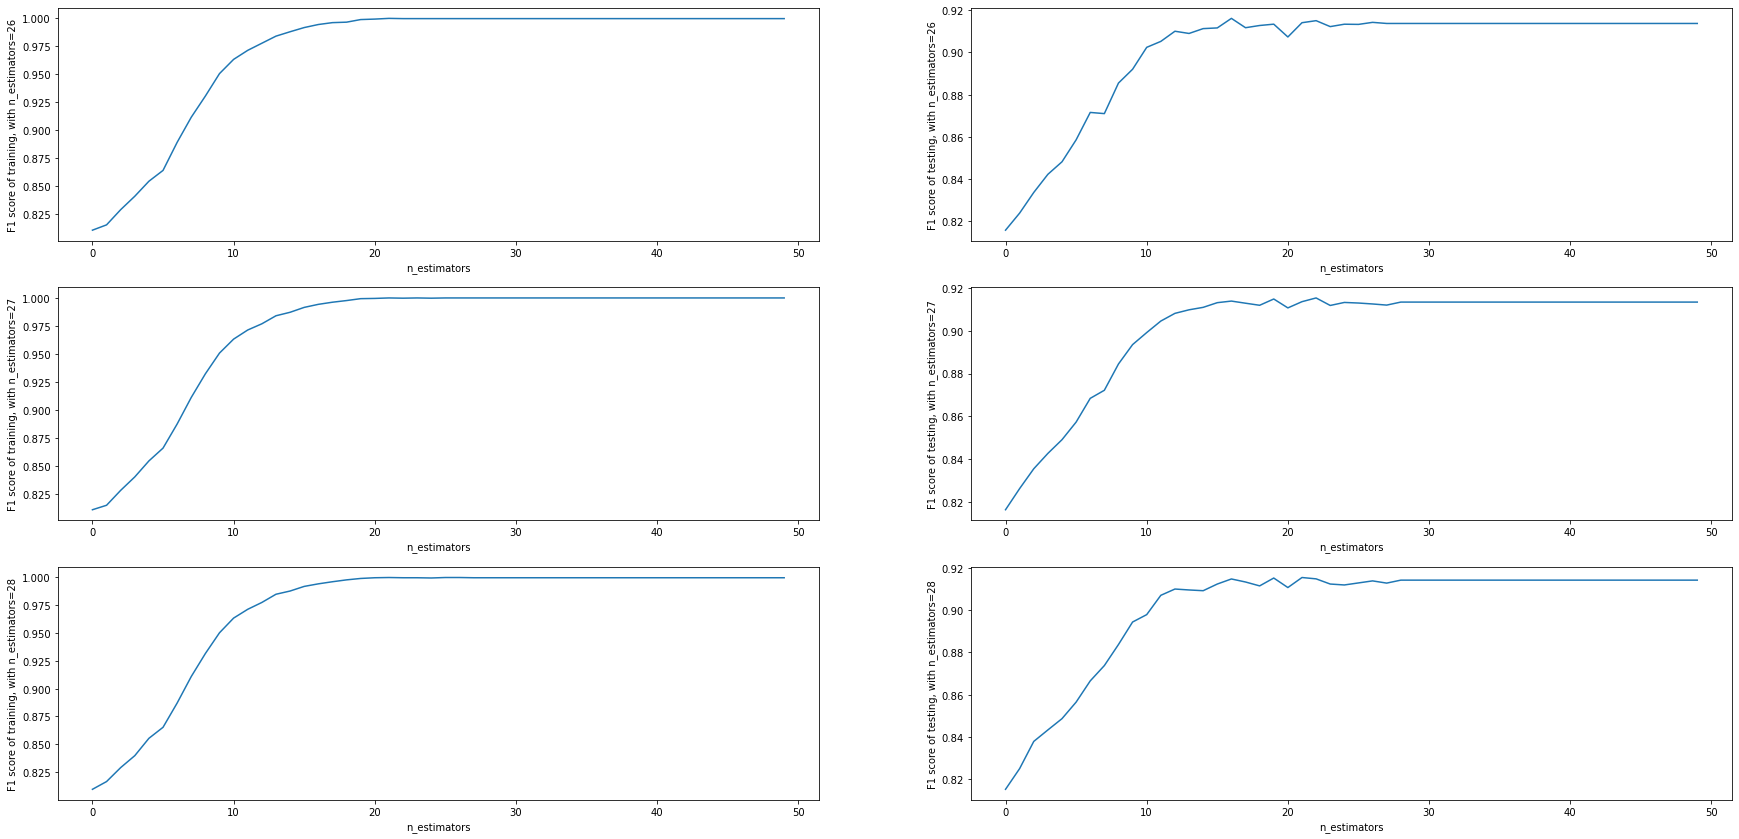

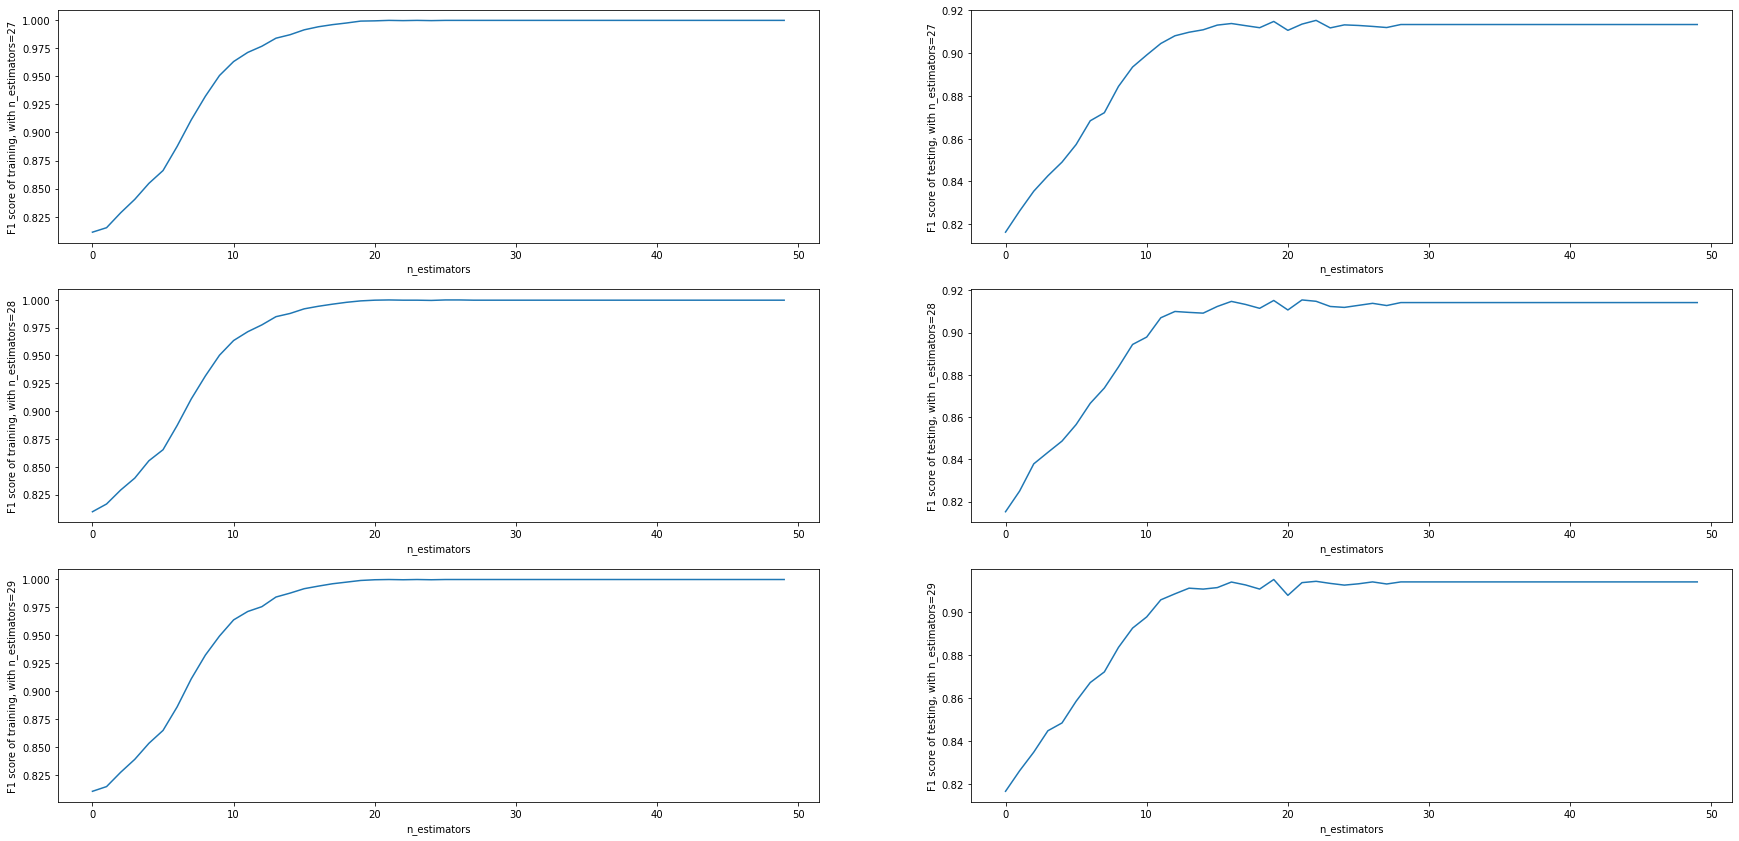

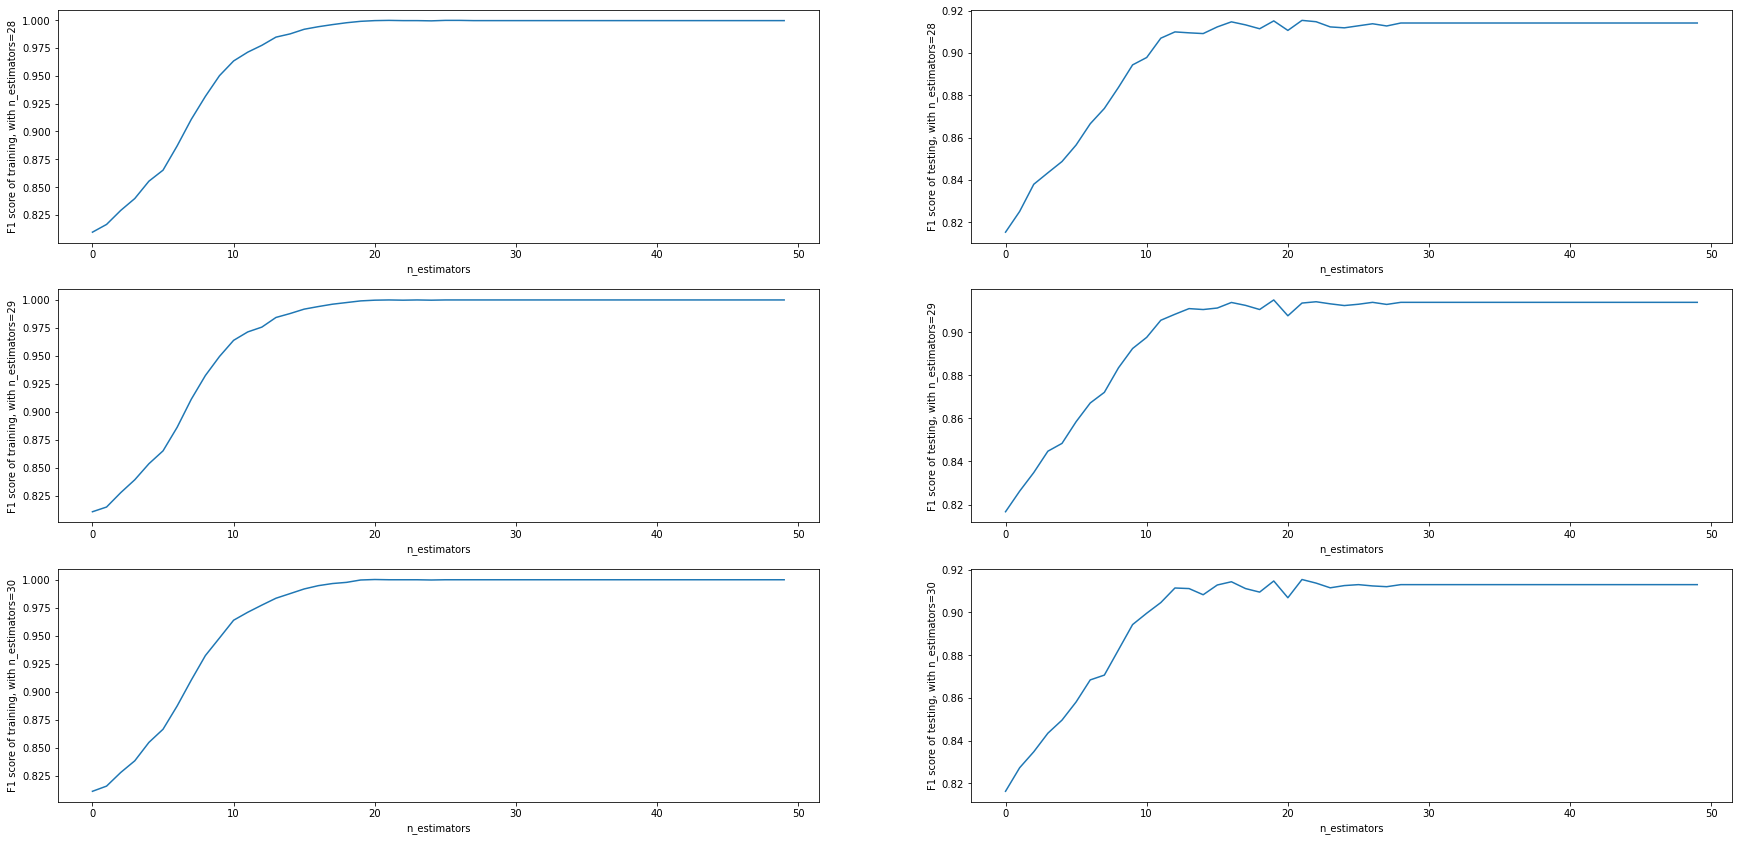

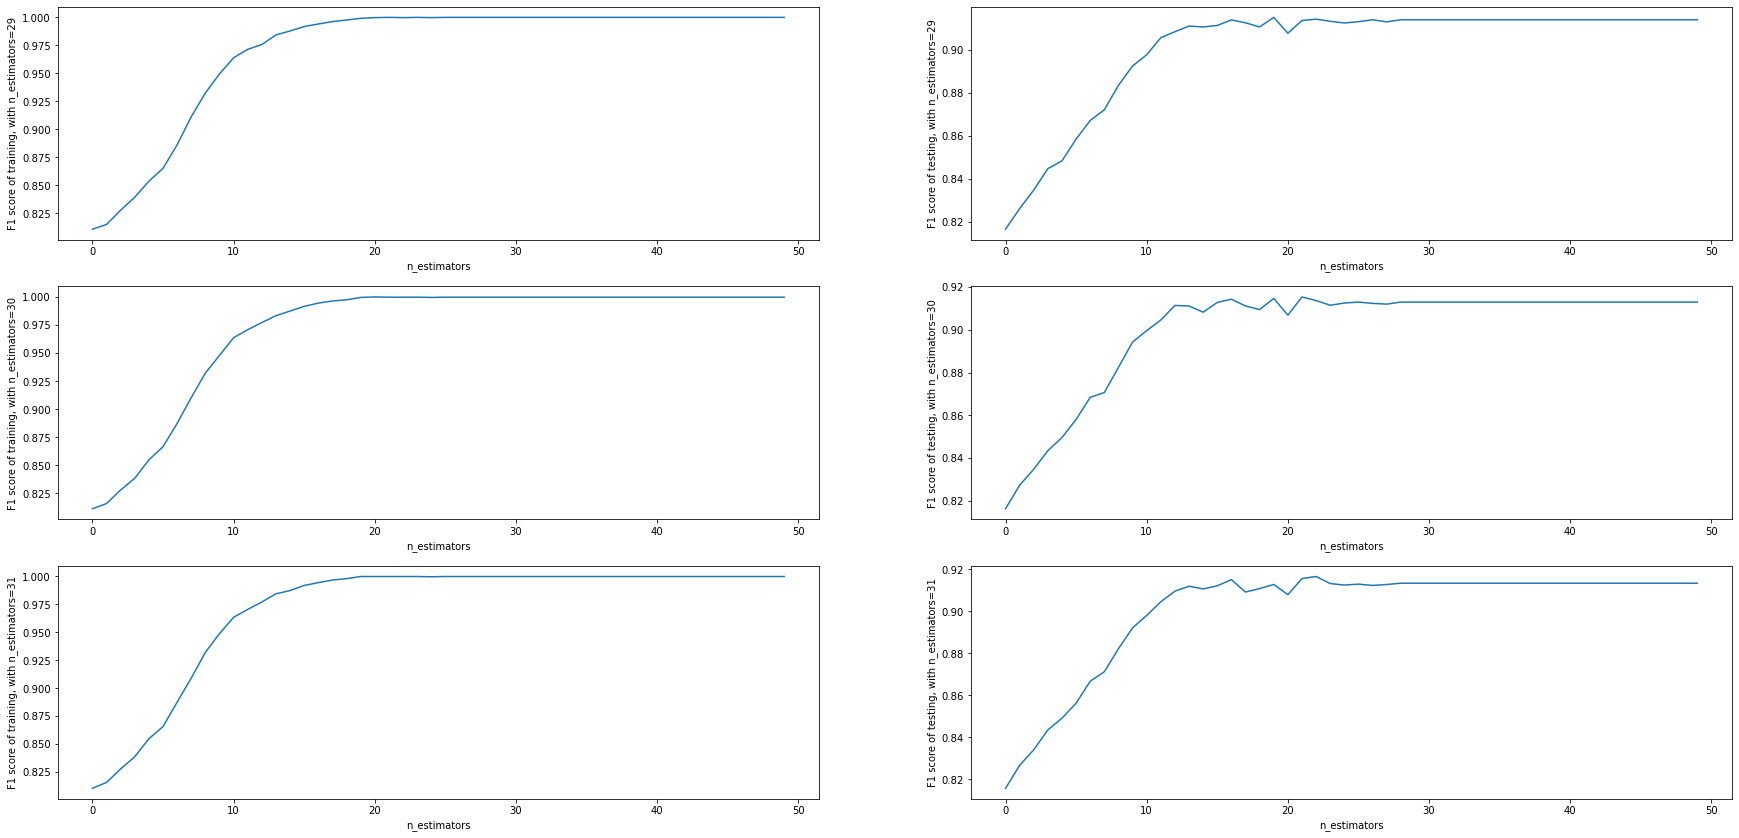

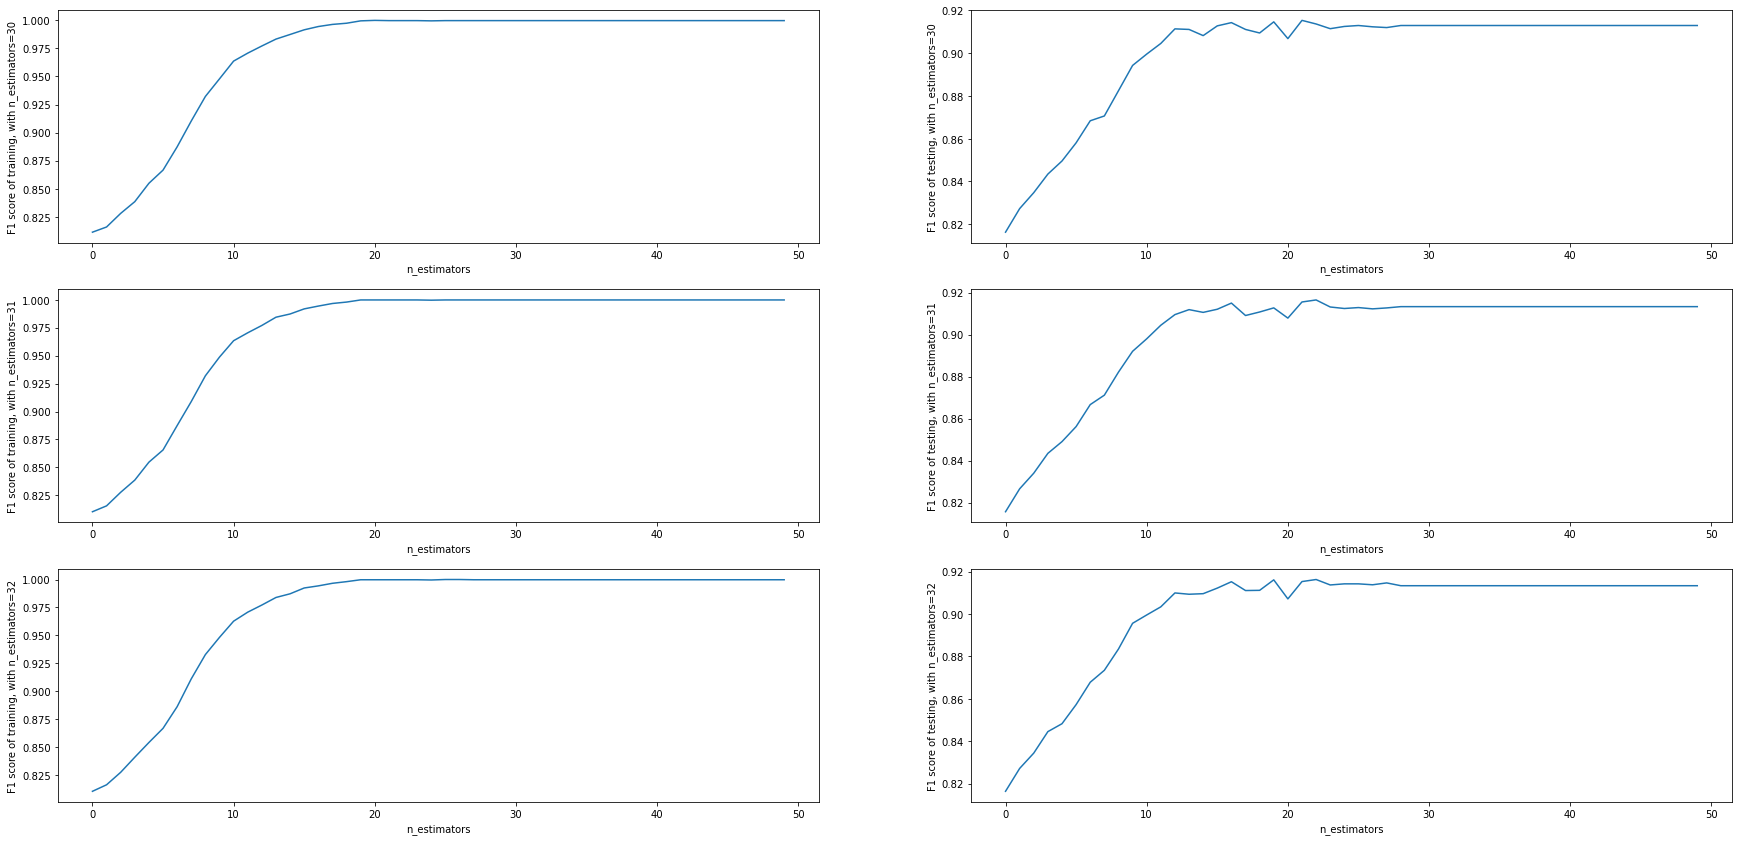

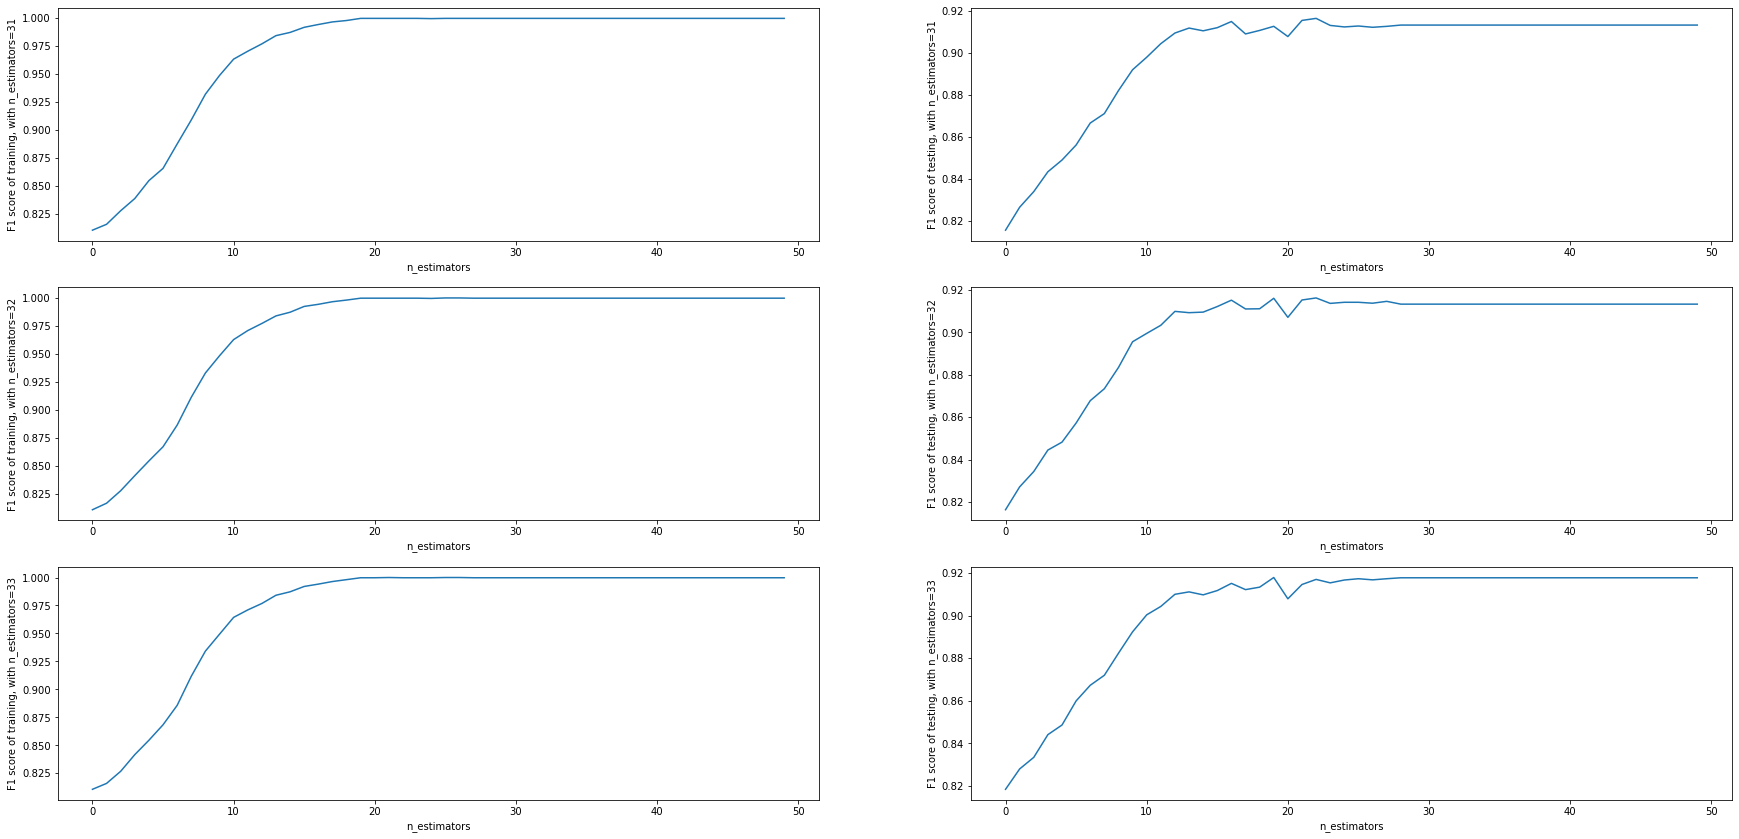

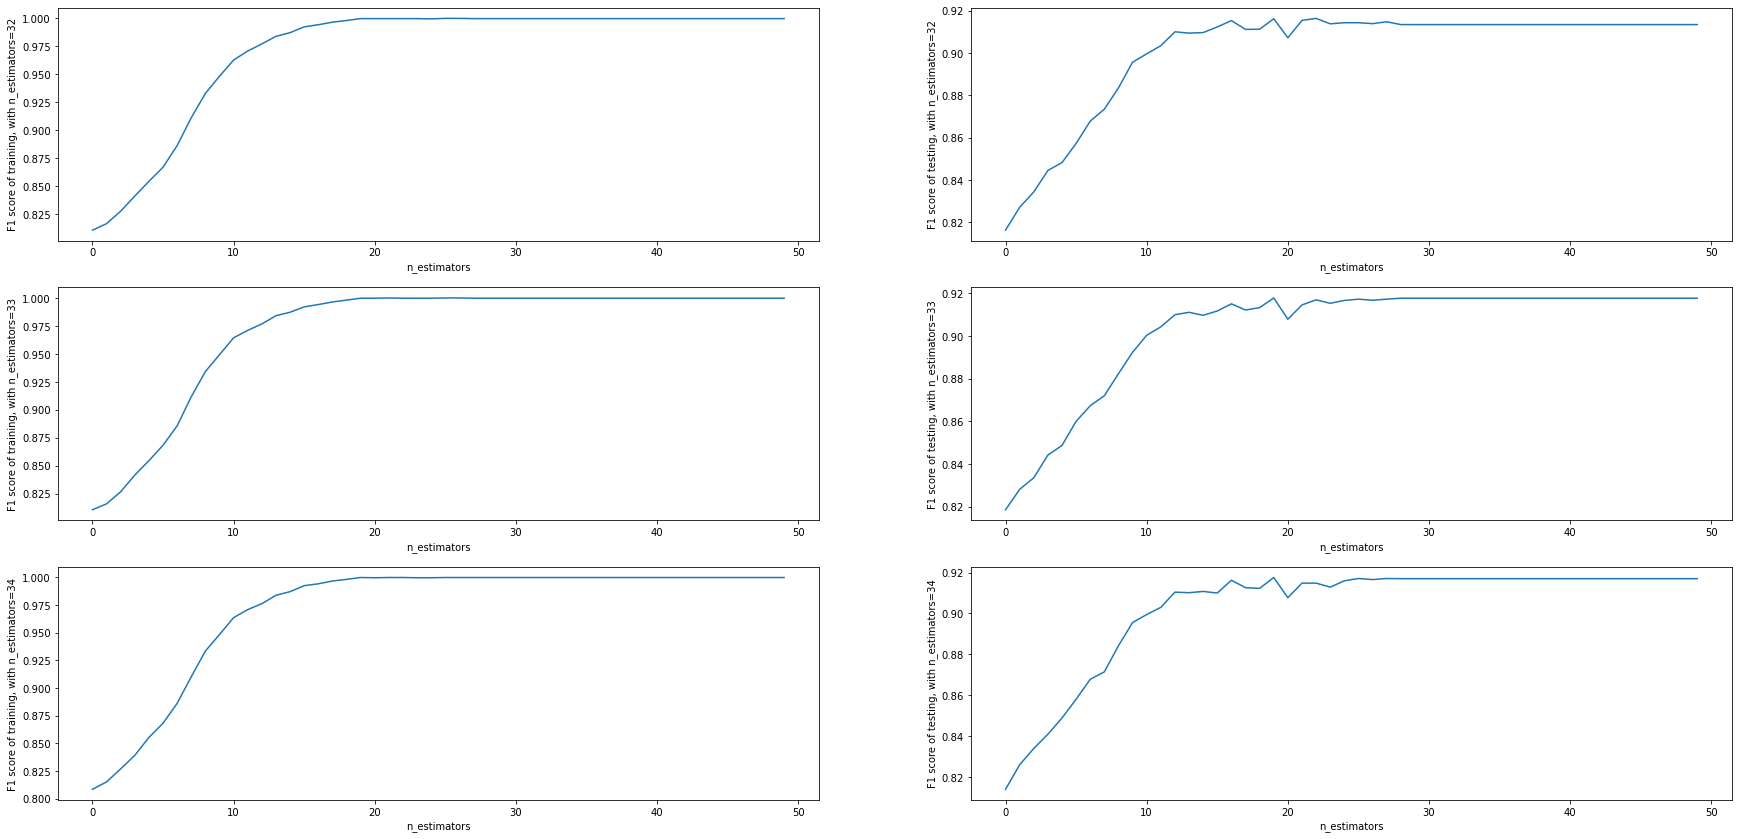

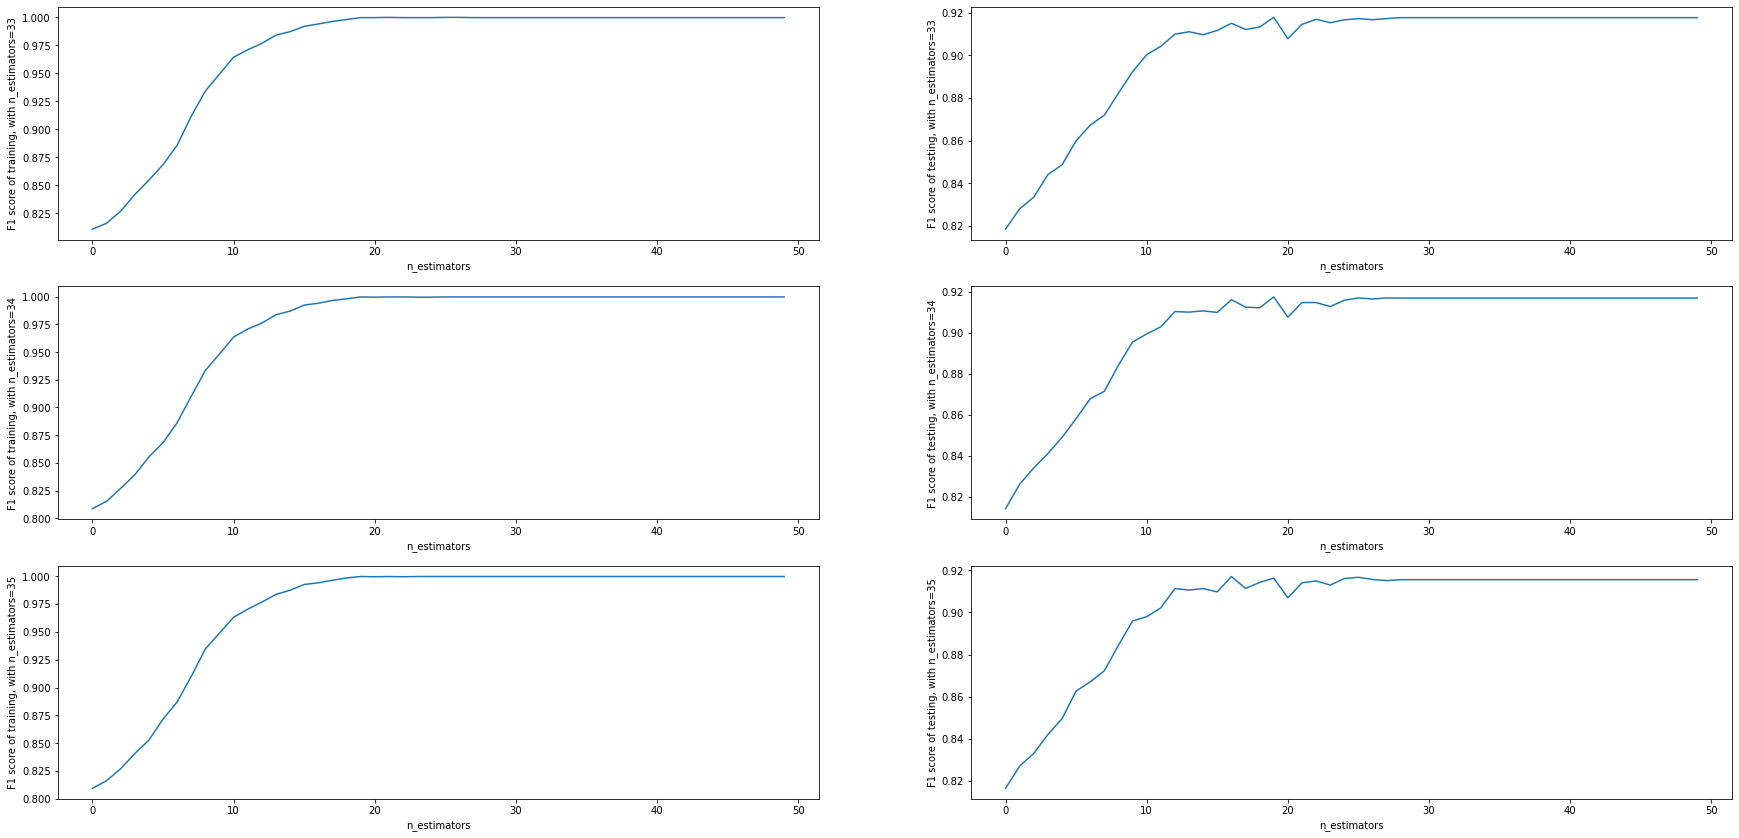

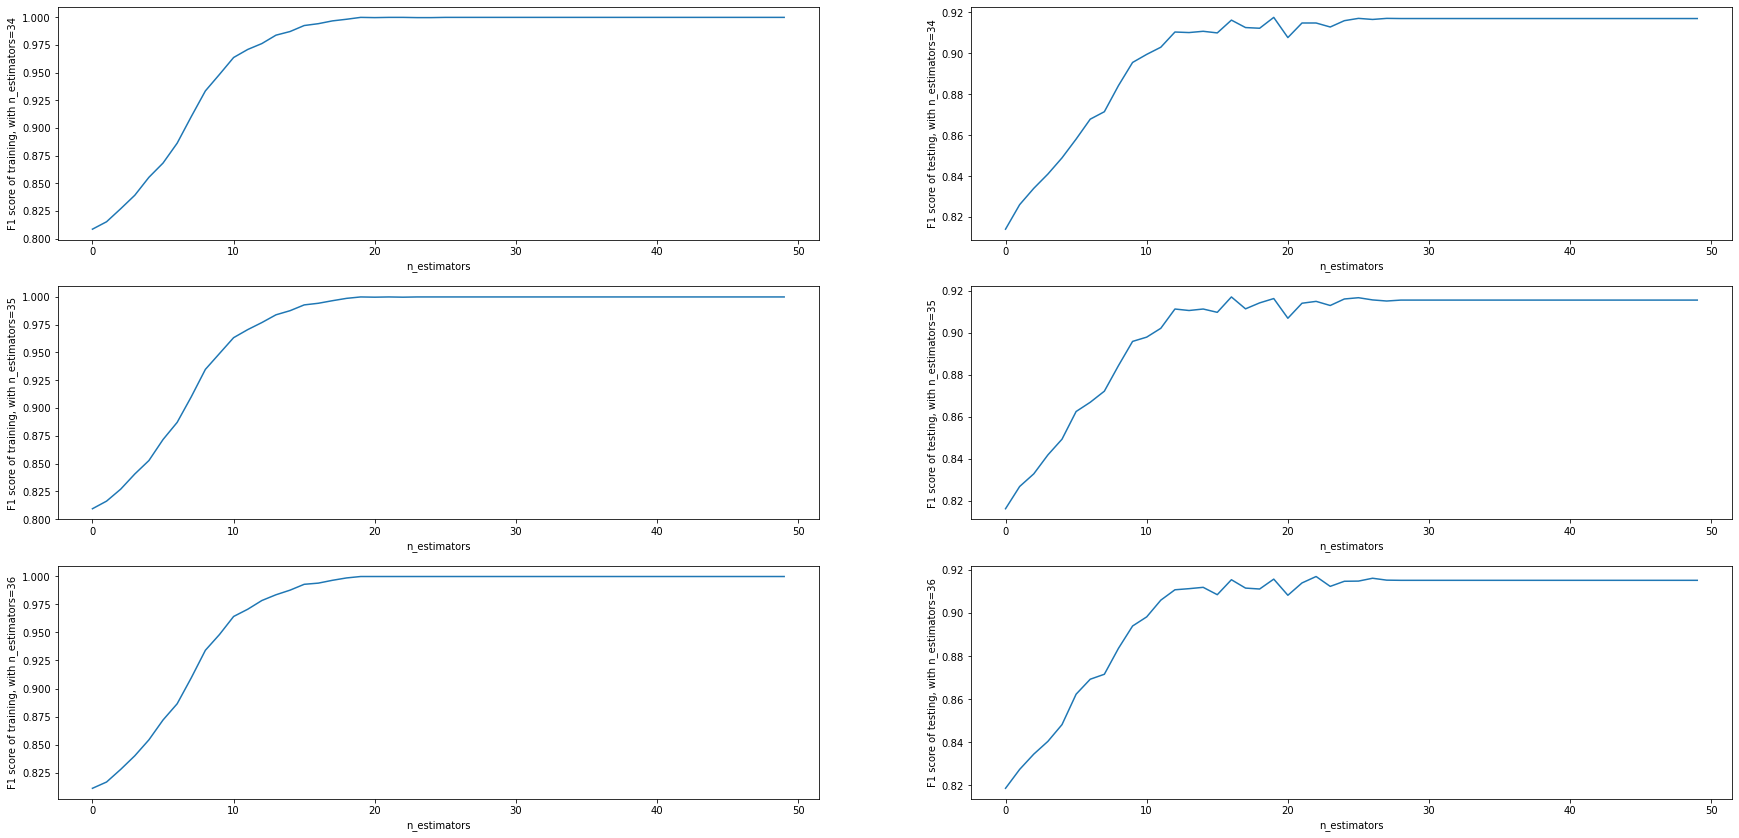

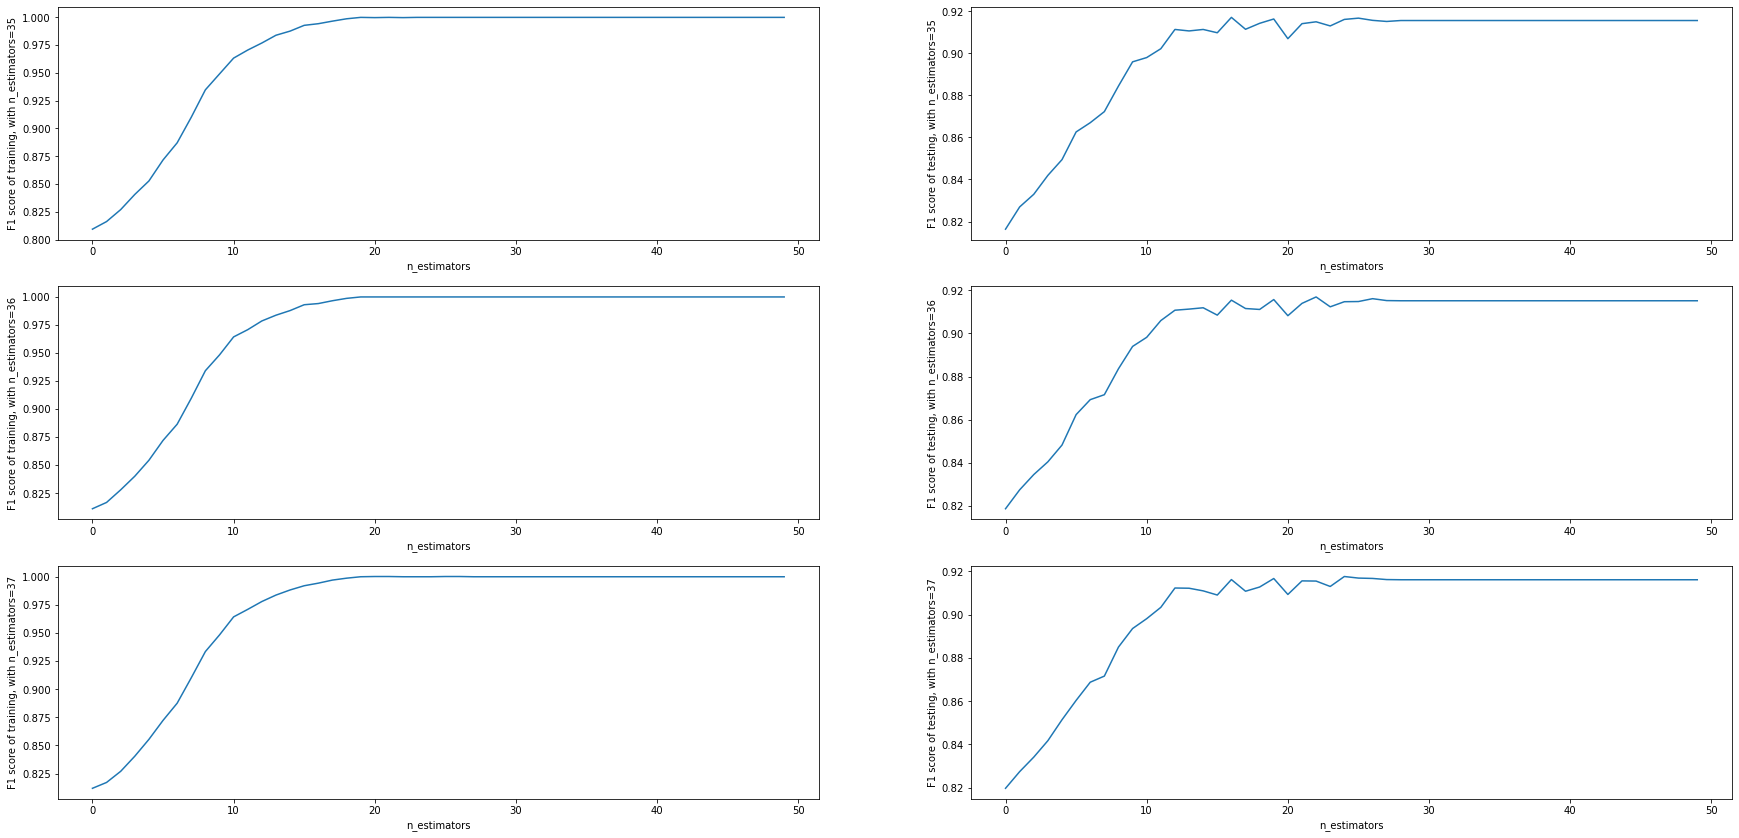

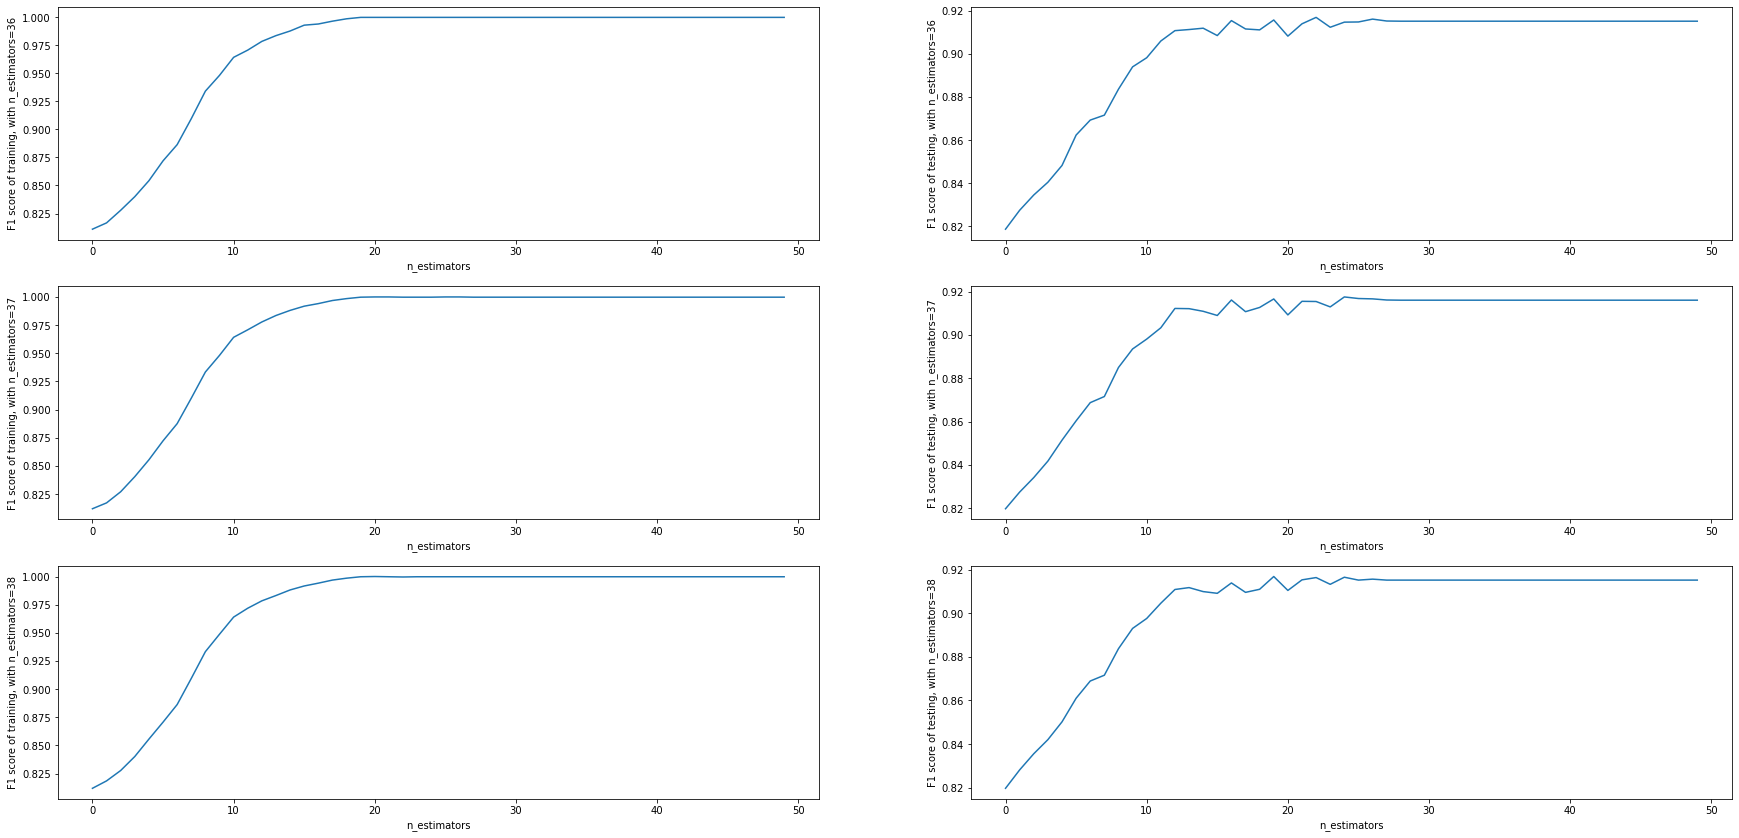

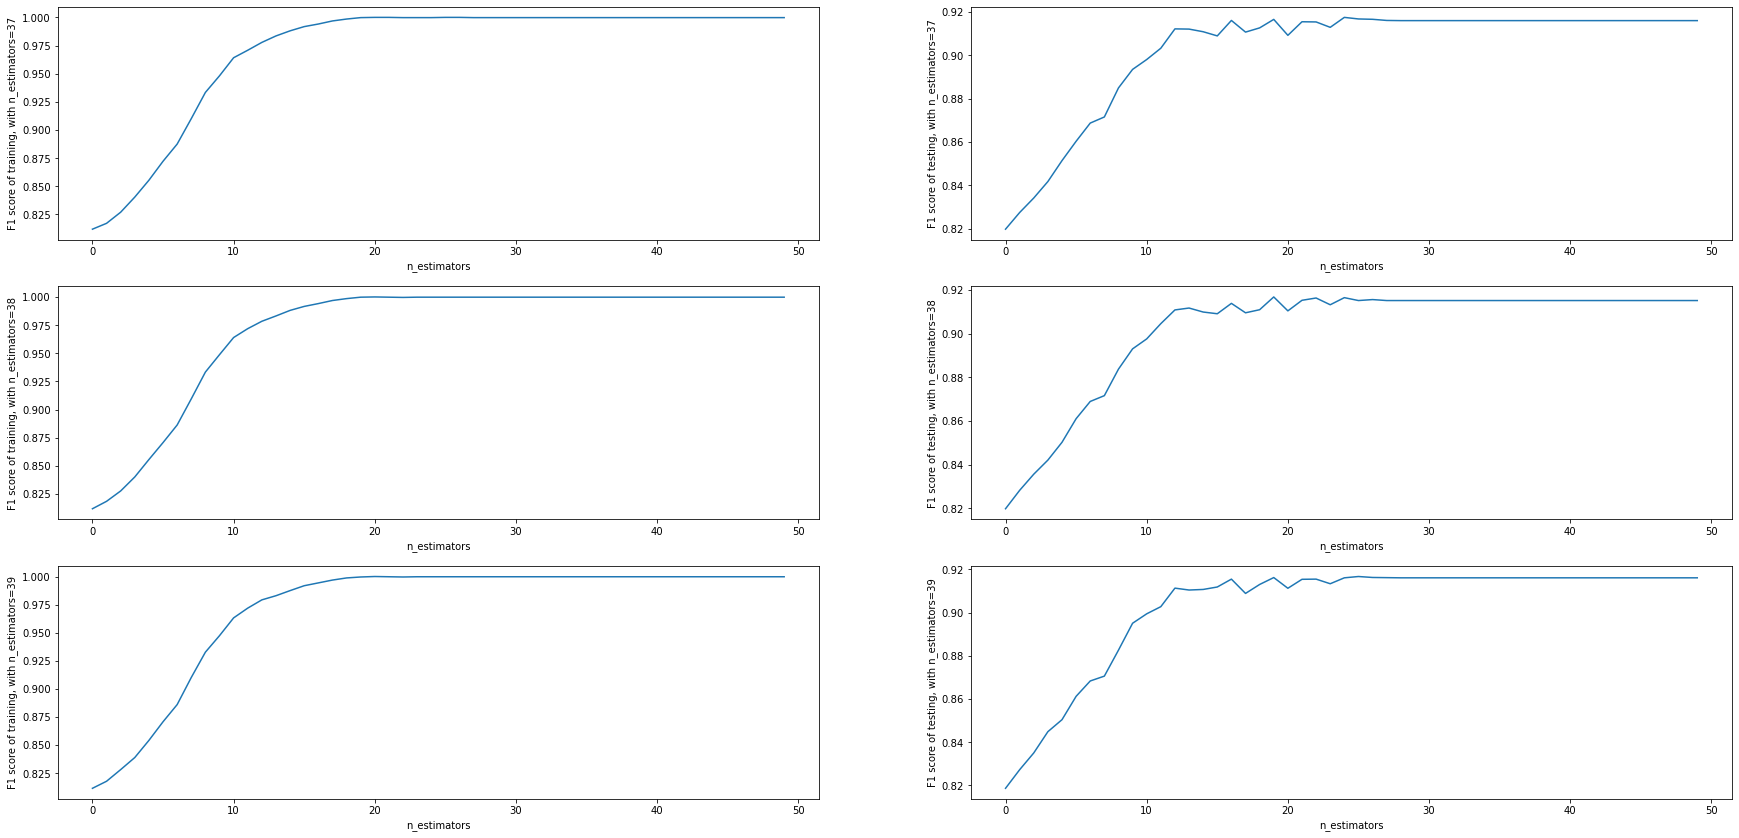

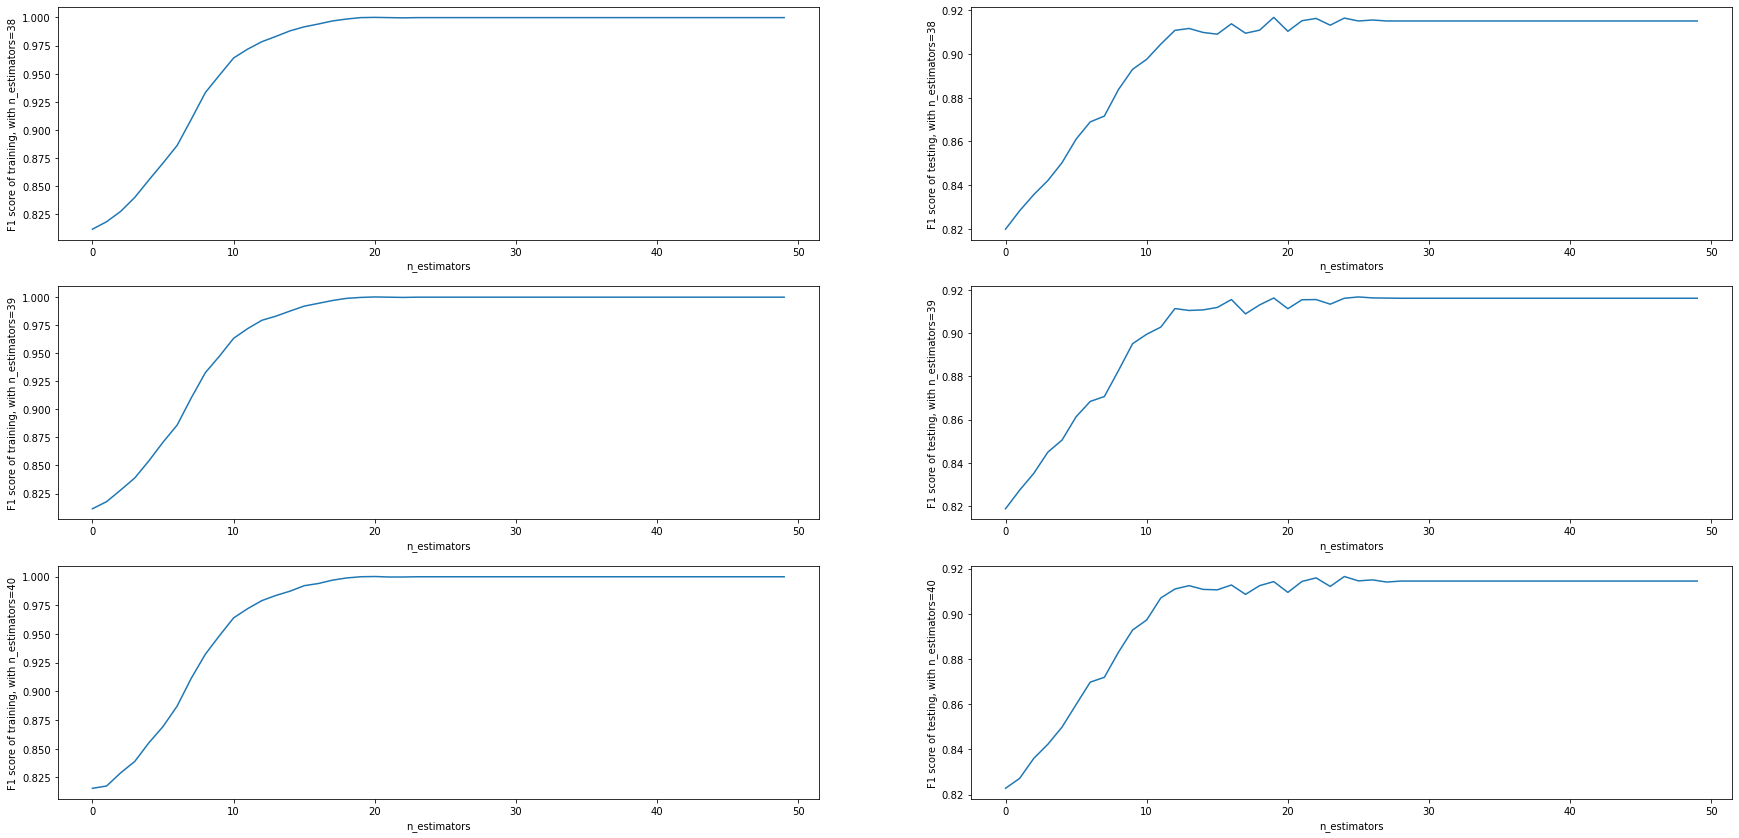

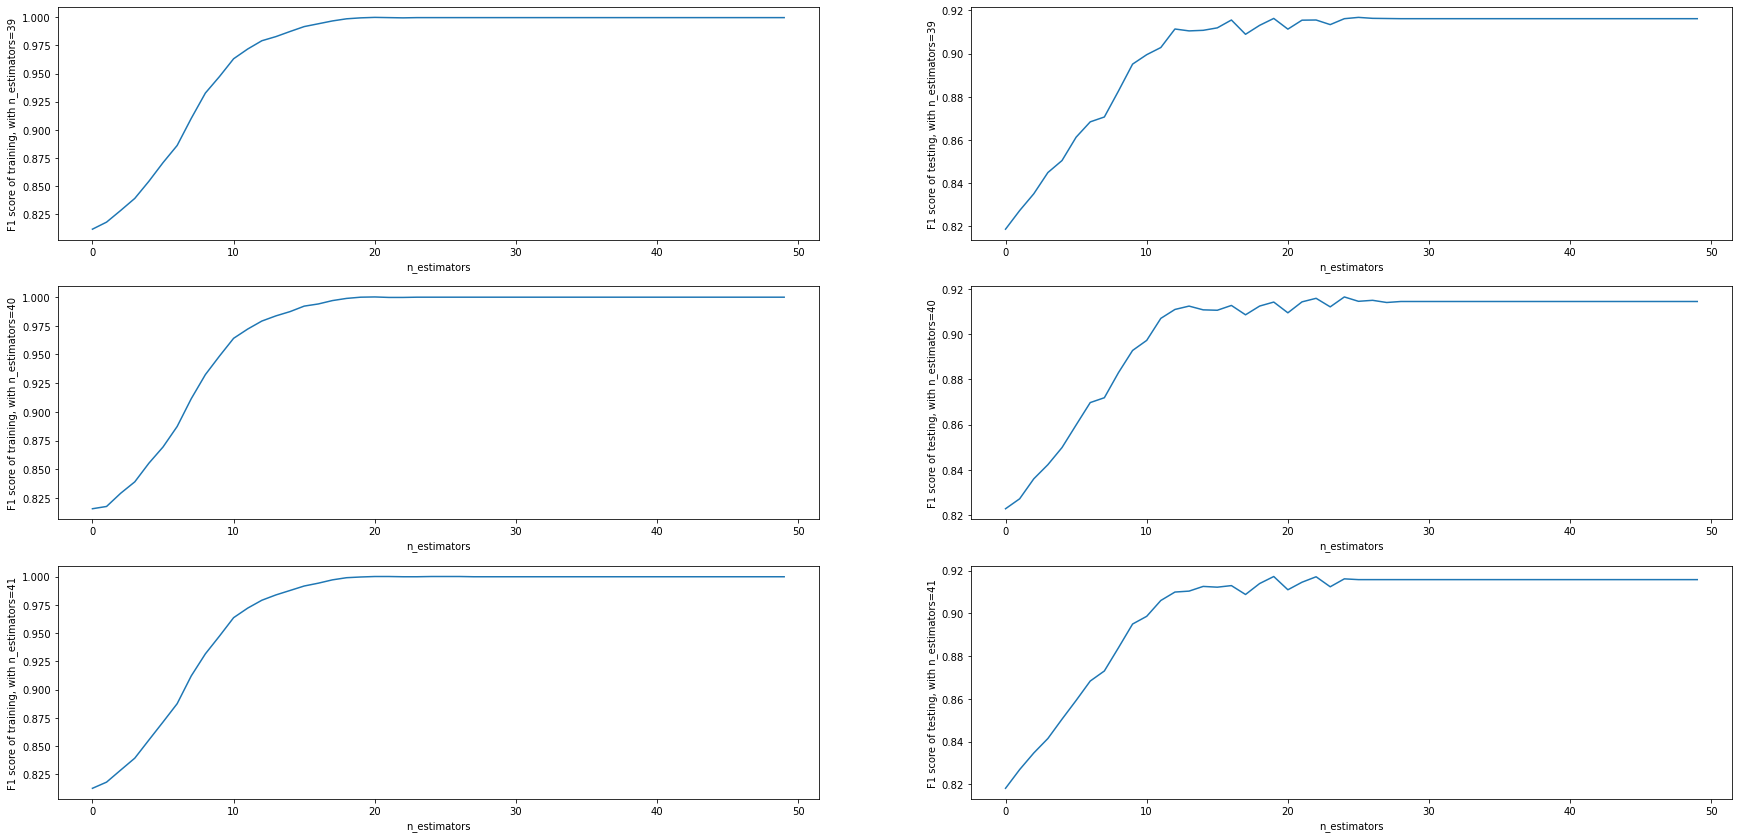

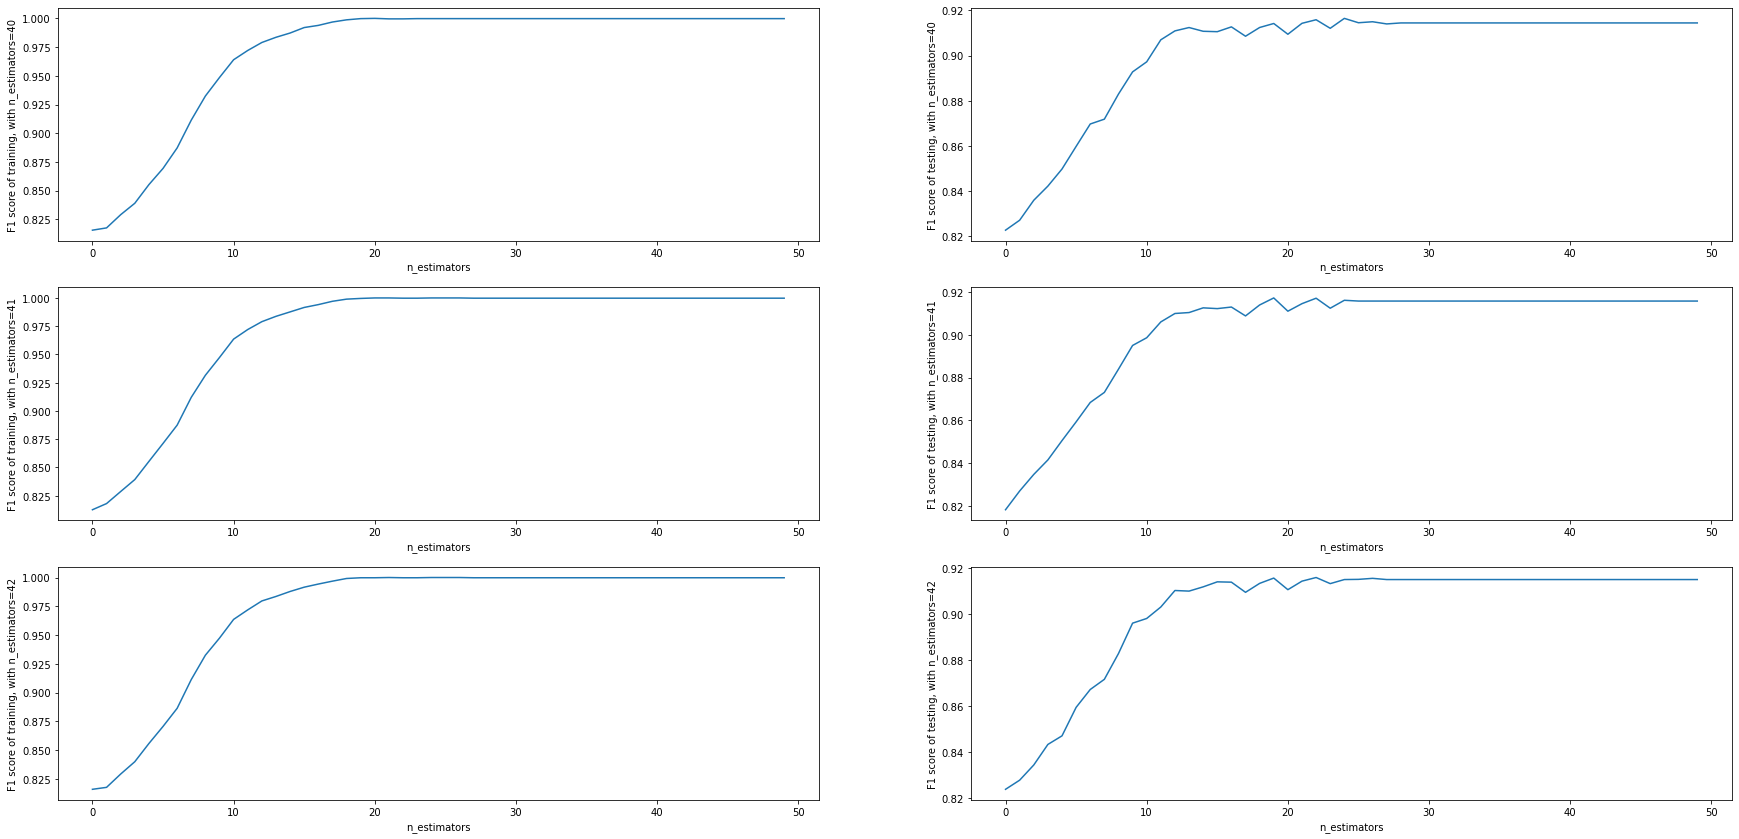

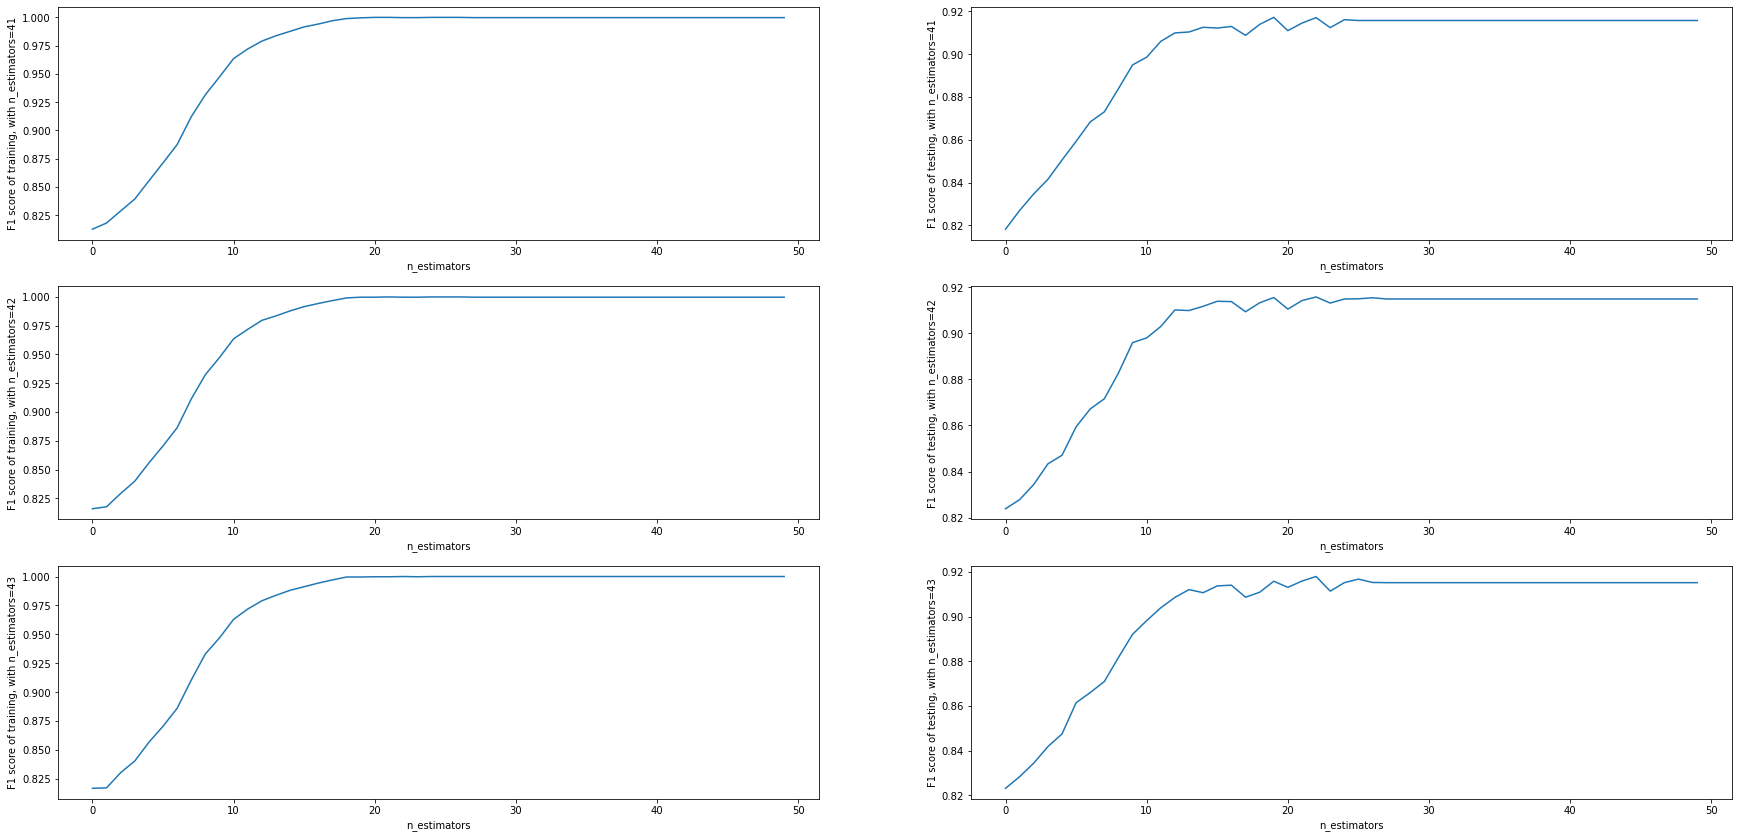

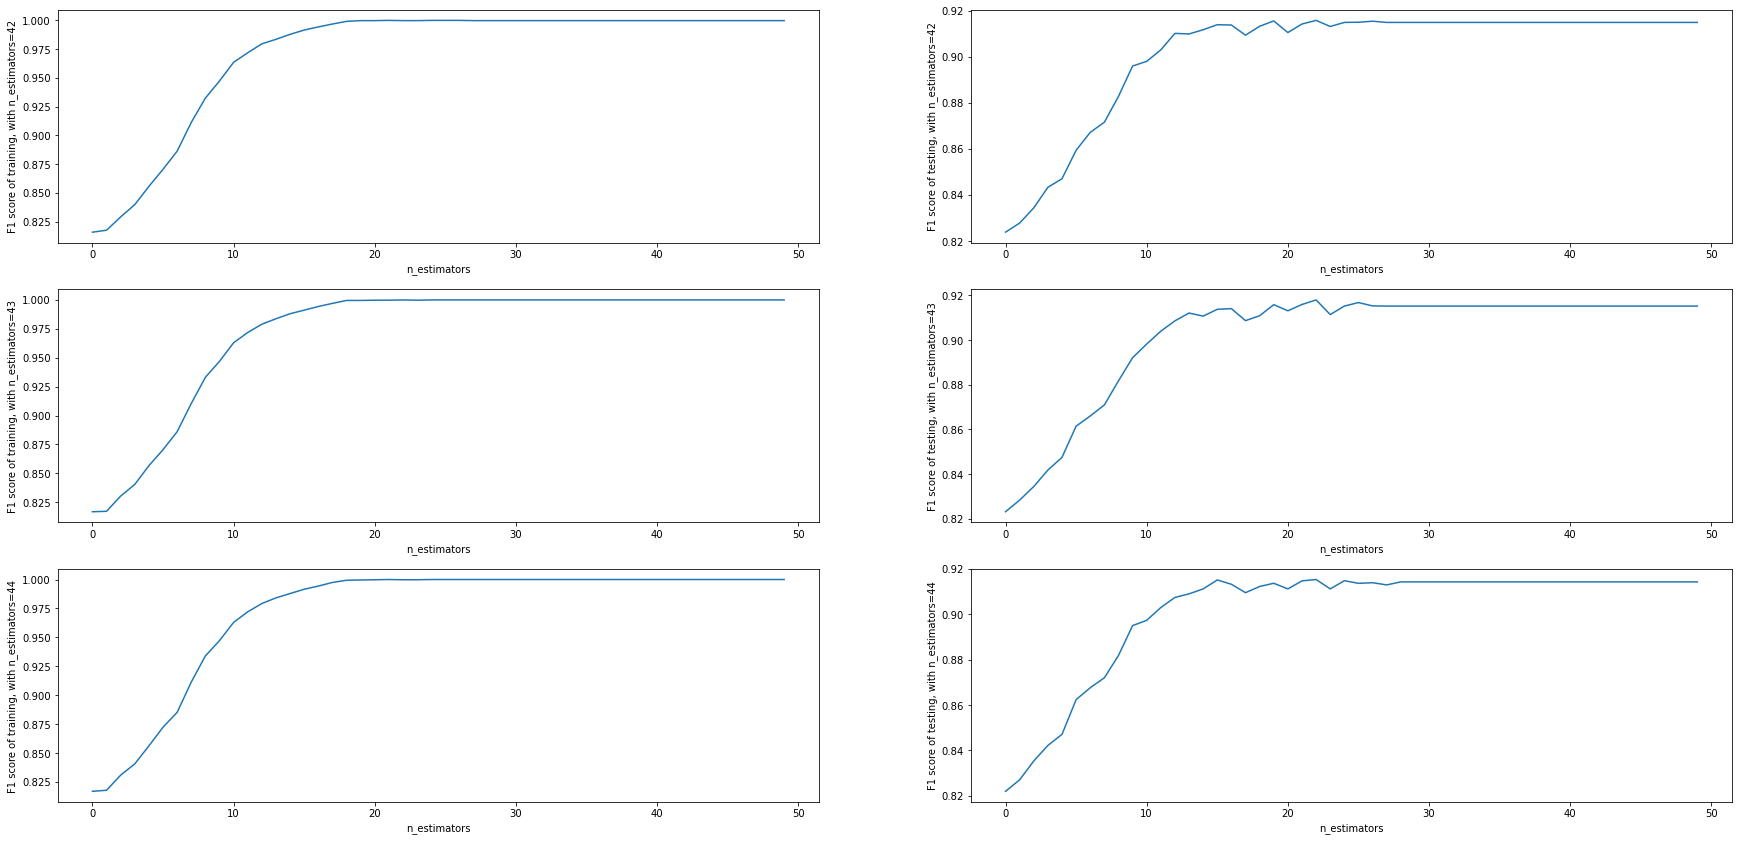

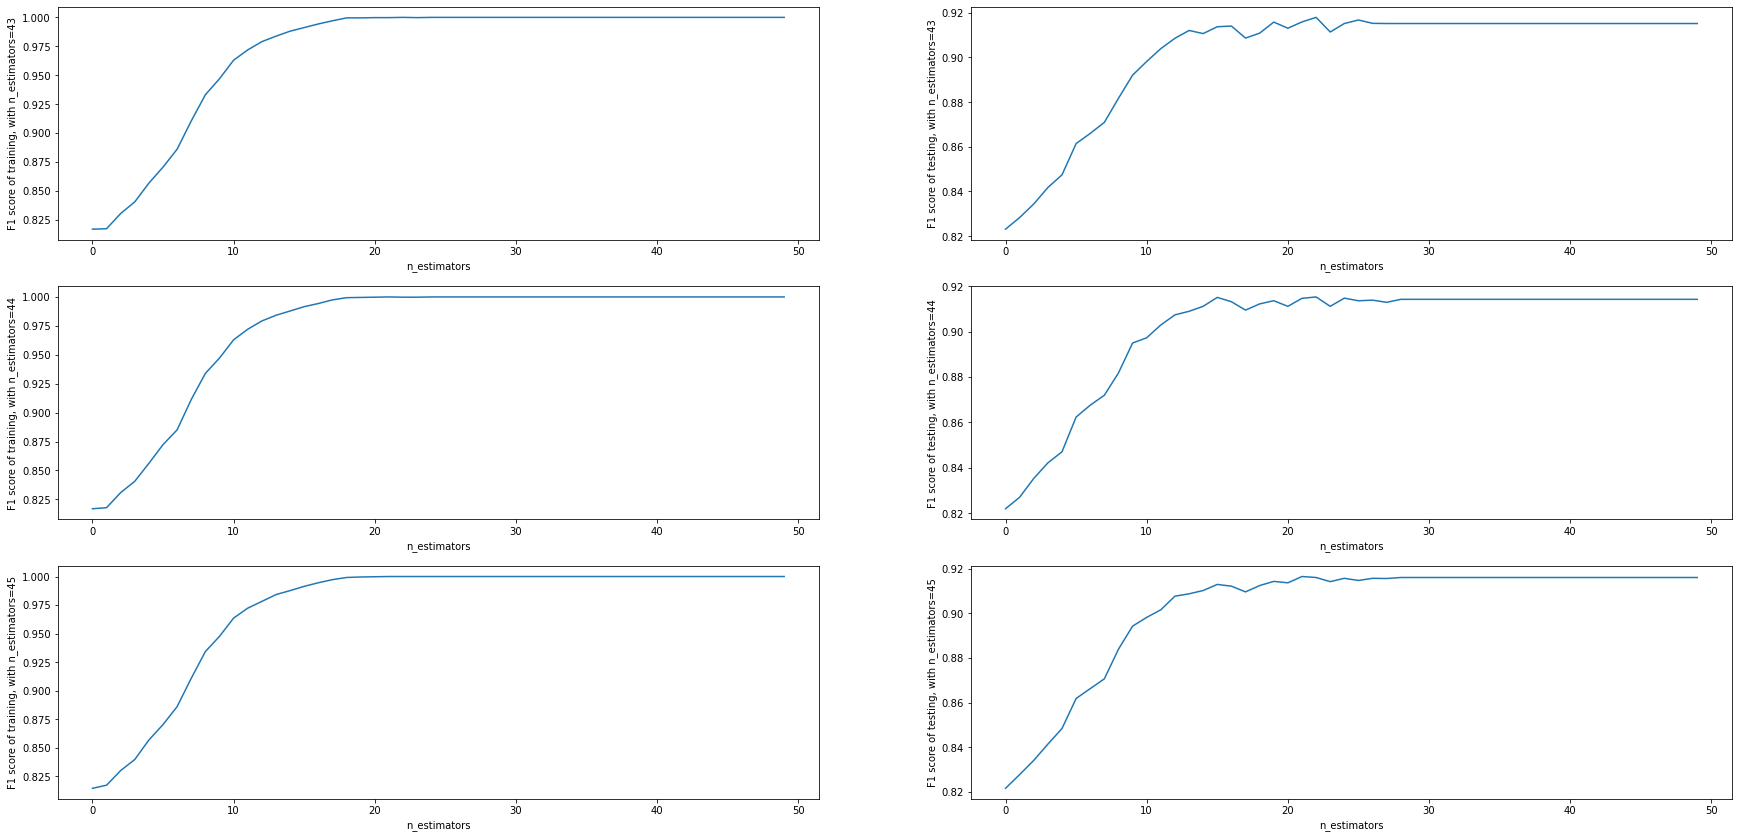

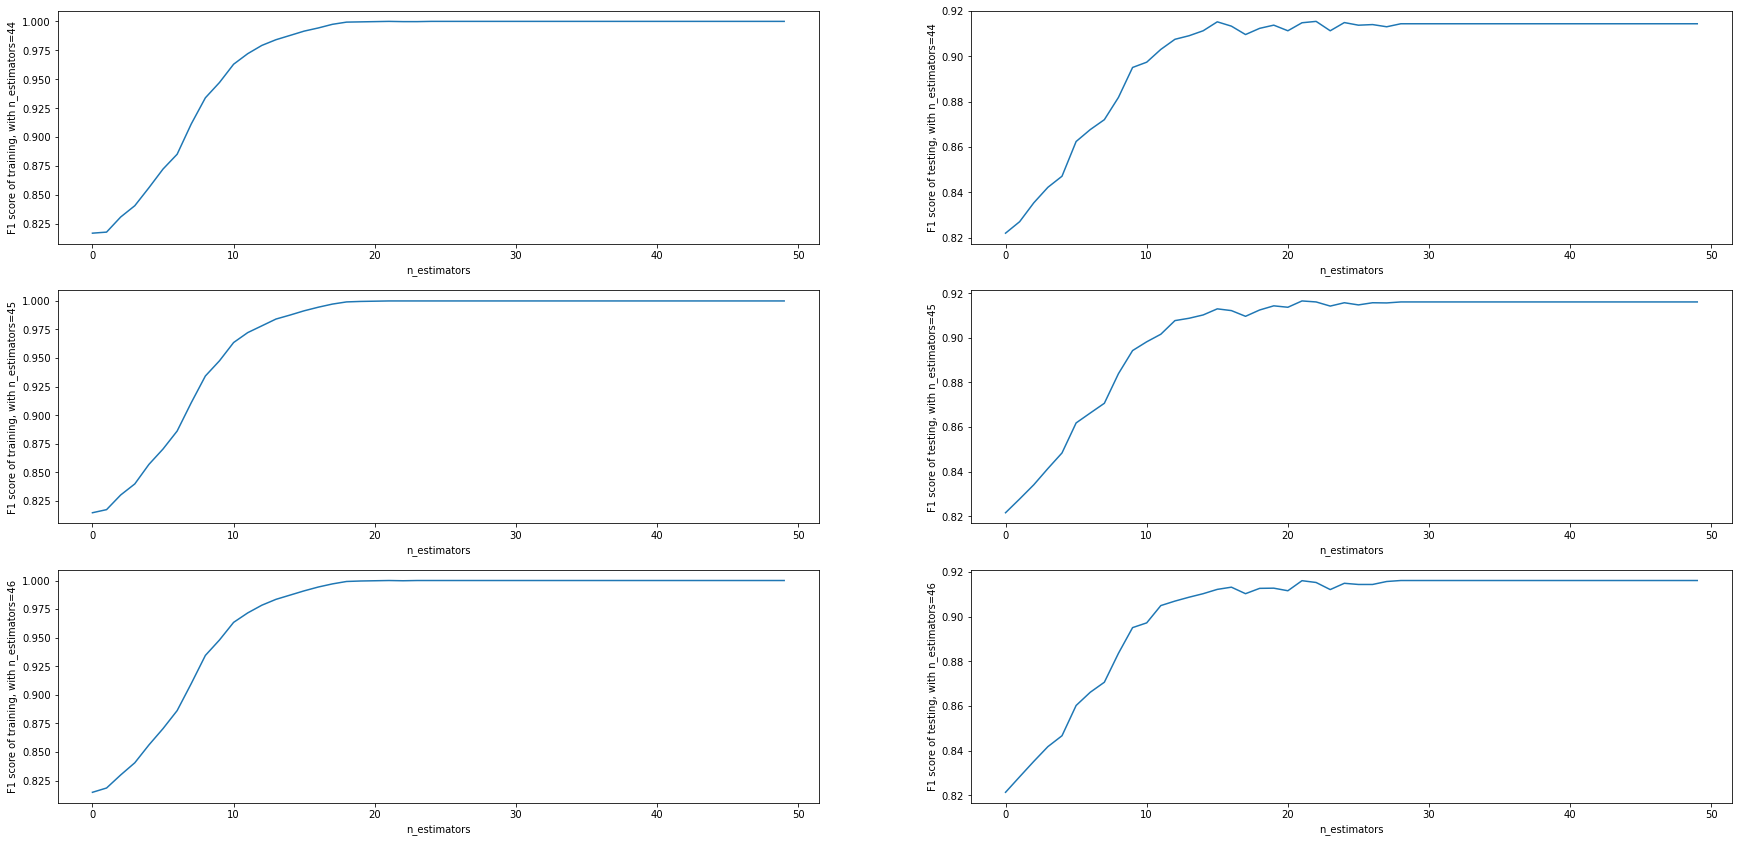

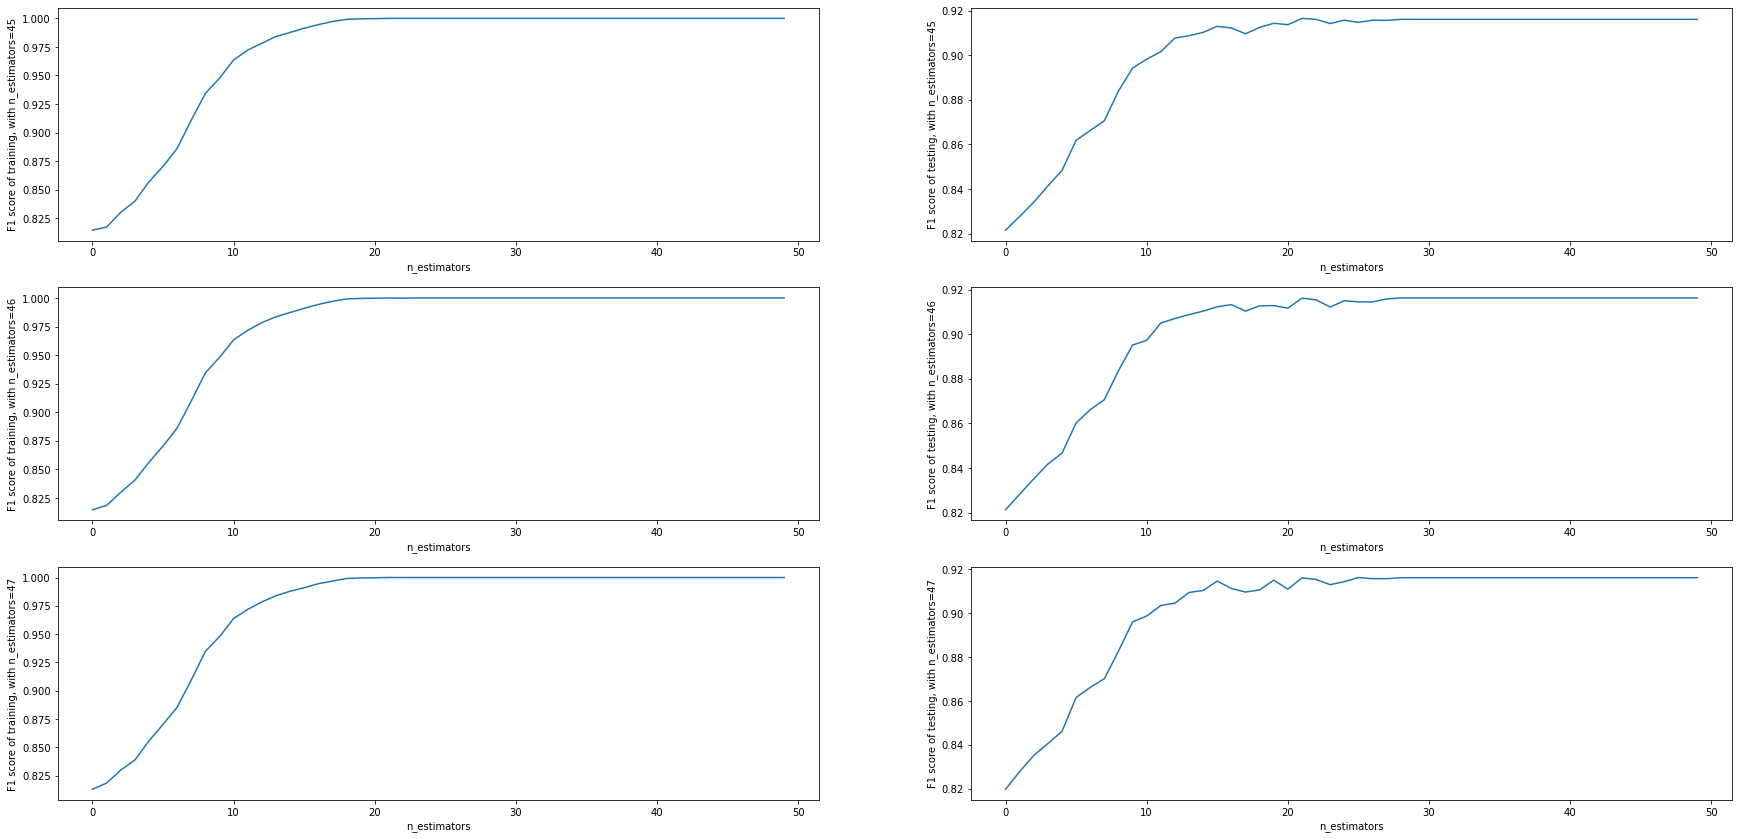

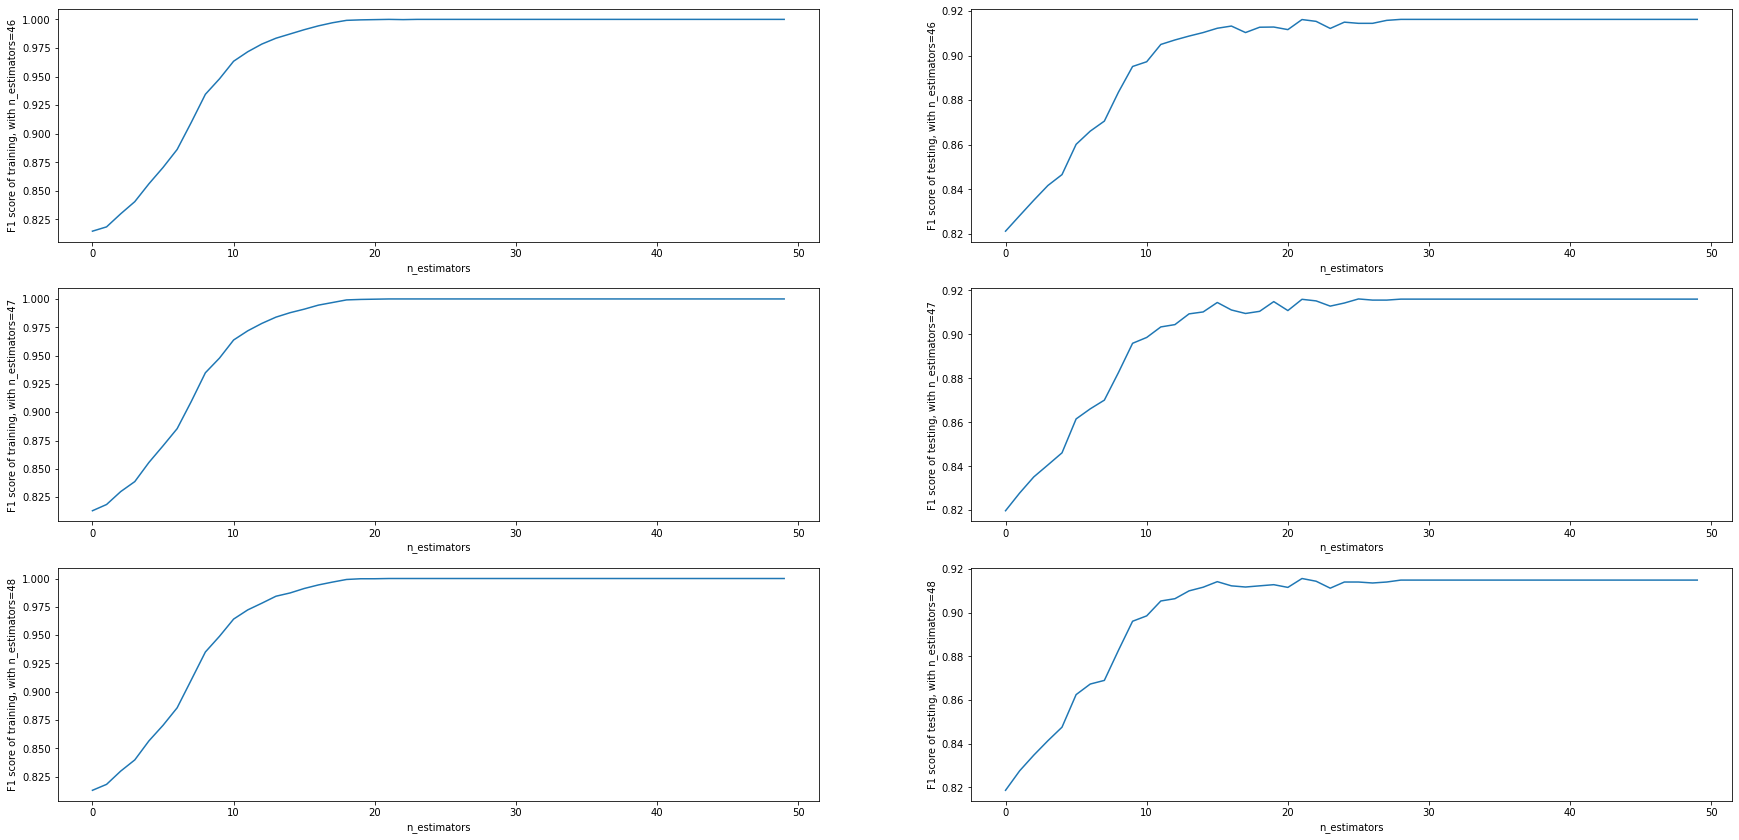

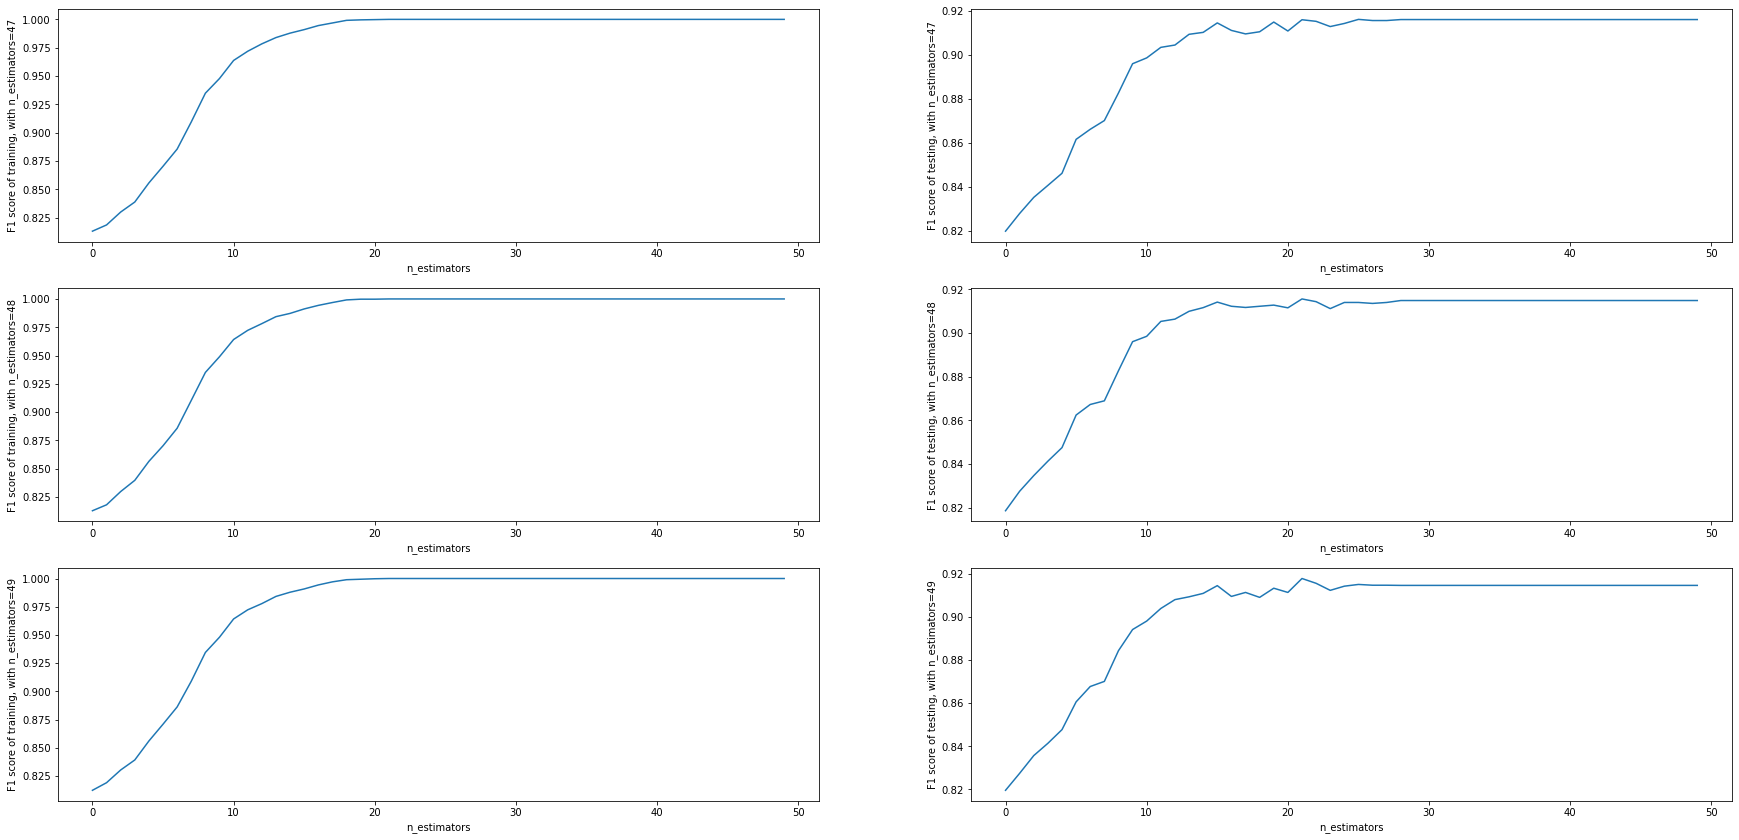

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

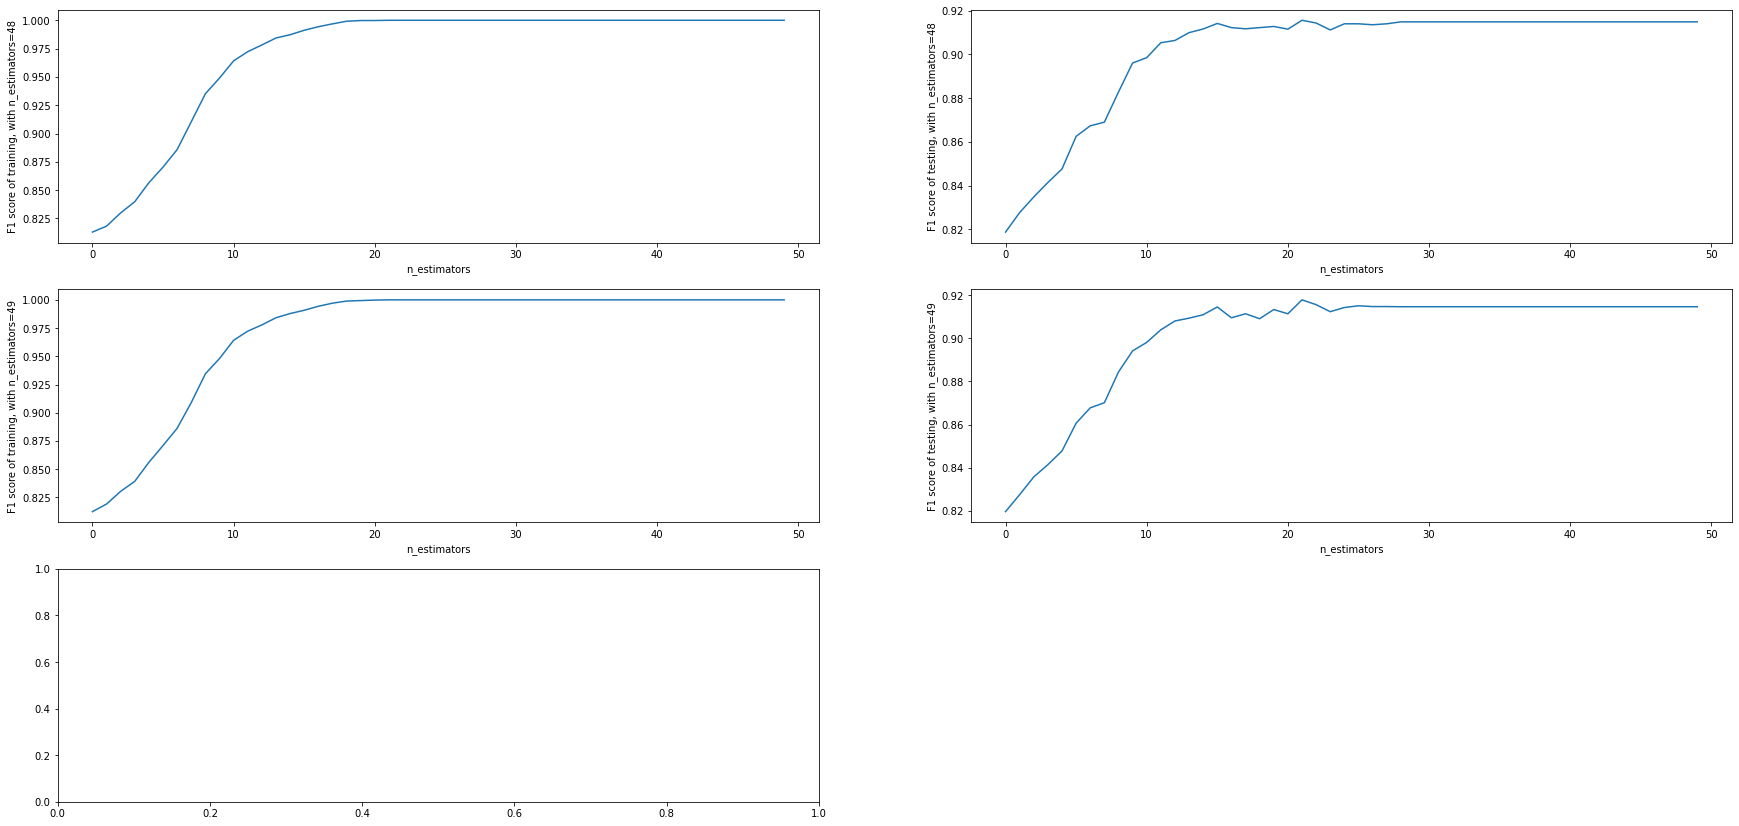

In [39]:
for i in range(50):
    plt.figure(figsize=(30,30))
    plt.subplot(621)
    plt.plot(range(50), fscore_train[i*50:i*50+50])
    plt.xlabel('n_estimators')
    plt.ylabel('F1 score of training, with n_estimators='+ str(i))
    plt.subplot(622)
    plt.plot(range(50), fscore_test[i*50:i*50+50])
    plt.xlabel('n_estimators')
    plt.ylabel('F1 score of testing, with n_estimators='+ str(i))
    plt.subplot(623)
    plt.plot(range(50), fscore_train[(i+1)*50:(i+1)*50+50])
    plt.xlabel('n_estimators')
    plt.ylabel('F1 score of training, with n_estimators='+ str(i+1))
    plt.subplot(624)
    plt.plot(range(50), fscore_test[(i+1)*50:(i+1)*50+50])
    plt.xlabel('n_estimators')
    plt.ylabel('F1 score of testing, with n_estimators='+ str(i+1))
    plt.subplot(625)
    plt.plot(range(50), fscore_train[(i+2)*50:(i+2)*50+50])
    plt.xlabel('n_estimators')
    plt.ylabel('F1 score of training, with n_estimators='+ str(i+2))
    plt.subplot(626)
    plt.plot(range(50), fscore_test[(i+2)*50:(i+2)*50+50])
    plt.xlabel('n_estimators')
    plt.ylabel('F1 score of testing, with n_estimators='+ str(i+2))
    i += 2
    plt.show()

set n_estimators=22，max_depth=22.
Test the classifier performance using test data

confusion matrix of test data:
 [[1310  115]
 [  77 1415]] 
 confusion matrix of training data:
 [[3427    9]
 [   3 3366]] 
 F1 score of the first RF Classifier on Test Data: 0.9364659166115157 
 F1 score of the first RF Classifier on Train Data: 0.998220640569395


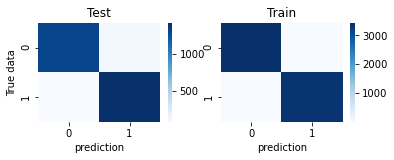

In [40]:
rf = RandomForestClassifier(n_estimators=22,max_depth=22,random_state=42)
rf.fit(X_train_smote,y_train_smote)
rf_prediction = rf.predict(X_test_smote)
rf_train = rf.predict(X_train_smote)
cm_test = confusion_matrix(y_test_smote,rf_prediction)
cm_train = confusion_matrix(y_train_smote,rf_train)
rf_score_test = f1_score(y_test_smote, rf_prediction)
rf_score_train = f1_score(y_train_smote, rf_train)
print("confusion matrix of test data:\n",cm_test,"\n",
      "confusion matrix of training data:\n",cm_train,"\n",
      "F1 score of the first RF Classifier on Test Data:", rf_score_test,"\n",
      "F1 score of the first RF Classifier on Train Data:", rf_score_train)
plt.figure(1)
plt.subplot(221)
sns.heatmap(cm_test, cmap="Blues")
plt.xlabel('prediction')
plt.ylabel('True data')
plt.title('Test')
plt.subplot(222)
sns.heatmap(cm_train, cmap="Blues")
plt.xlabel('prediction')
plt.title('Train')
plt.show()

confusion matrix of test data:
 [[1185   31]
 [   4   58]] 
 F1 score of the first RF Classifier on Test Data: 0.7682119205298015


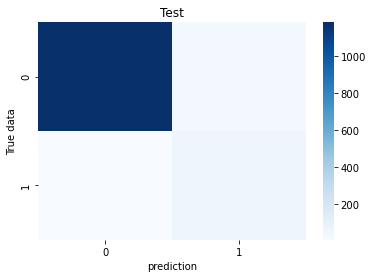

In [41]:
rf_prediction = rf.predict(X_test)
cm_test = confusion_matrix(y_test,rf_prediction)
rf_score_test = f1_score(y_test, rf_prediction)
print("confusion matrix of test data:\n",cm_test,"\n",
      "F1 score of the first RF Classifier on Test Data:", rf_score_test)
plt.figure(1)
sns.heatmap(cm_test, cmap="Blues")
plt.xlabel('prediction')
plt.ylabel('True data')
plt.title('Test')
plt.show()

**Comment:**
- After training the random forest classifier using the balanced dataset, the generalization performance of the classifier on the post-balanced test set was significantly enhanced.
- The same classifier classifies the imbalanced test set (both datasets used for conditioning are from the imbalanced training set, i.e., the imbalanced test dataset is a dataset that the classifier has not seen before) with a significantly better F1 score than the unbalanced version, but still much lower than the result when conditioning. 
- Conjecture: Before balancing, the classifier has a preference to identify samples as healthy, while after balancing, the classifier's preference is mitigated, then the number of FP samples increases when faced with the unbalanced test dataset, where the classifier may identify some of the healthy samples as strokes.
- Retrying the SVM algorithm

confusion matrix of test data:
 [[1334   91]
 [  58 1434]] 
 confusion matrix of training data:
 [[3353   83]
 [  28 3341]] 
 F1 score of the first SVM Classifier on Test Data: 0.9506131919124958 
 F1 score of the first SVM Classifier on Train Data: 0.9836596496393345


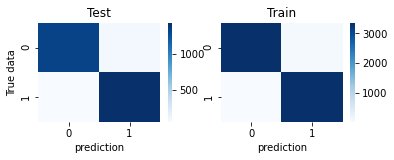

In [42]:
svm = SVC(gamma='auto')
svm.fit(X_train_smote, y_train_smote)
svm_prediction = svm.predict(X_test_smote)
svm_train = svm.predict(X_train_smote)
cm_test = confusion_matrix(y_test_smote,svm_prediction)
cm_train = confusion_matrix(y_train_smote,svm_train)
svm_score_test = f1_score(y_test_smote, svm_prediction)
svm_score_train = f1_score(y_train_smote, svm_train)
print("confusion matrix of test data:\n",cm_test,"\n",
      "confusion matrix of training data:\n",cm_train,"\n",
      "F1 score of the first SVM Classifier on Test Data:", svm_score_test,"\n",
      "F1 score of the first SVM Classifier on Train Data:", svm_score_train)
plt.figure(1)
plt.subplot(221)
sns.heatmap(cm_test, cmap="Blues")
plt.xlabel('prediction')
plt.ylabel('True data')
plt.title('Test')
plt.subplot(222)
sns.heatmap(cm_train, cmap="Blues")
plt.xlabel('prediction')
plt.title('Train')
plt.show()

confusion matrix of test data:
 [[1170   46]
 [   0   62]] 
 F1 score of the first SVM Classifier on Test Data: 0.7294117647058824


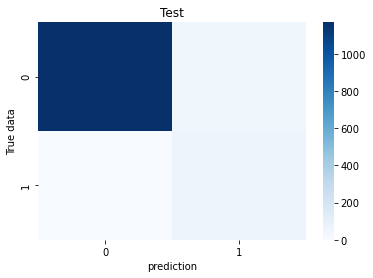

In [43]:
svm_prediction = svm.predict(X_test)
cm_test = confusion_matrix(y_test,svm_prediction)
svm_score_test = f1_score(y_test, svm_prediction)
print("confusion matrix of test data:\n",cm_test,"\n",
      "F1 score of the first SVM Classifier on Test Data:", svm_score_test)
plt.figure(1)
sns.heatmap(cm_test, cmap="Blues")
plt.xlabel('prediction')
plt.ylabel('True data')
plt.title('Test')
plt.show()

**Comments:**
- The same phenomenon exists in SVM classifiers: classifiers trained on balanced datasets do not perform as well as those on imbalanced test datasets, but far better than those trained on imbalanced datasets.
- Comparison shows that the generalization performance of the trained classifier is significantly enhanced after balancing the dataset using the smote algorithm (i.e., synthesizing more stroke samples based on stroke sample data), as evidenced by a substantial increase in F1 score.
- Two parameters of the random forest algorithm, n_estimators and max_depth, were tuned, and both were chosen to have a value of 22 based on the feedback from the test results of the tuning-specific test dataset. when tested on the test-specific balanced dataset, the F1 score was about 0.936.
- The experiments mainly compare the performance of SVM and random forest algorithms. The generalization ability of SVM classifier on the test dataset is slightly better than that of the random forest algorithm after the conditioning on the same training dataset and test dataset.